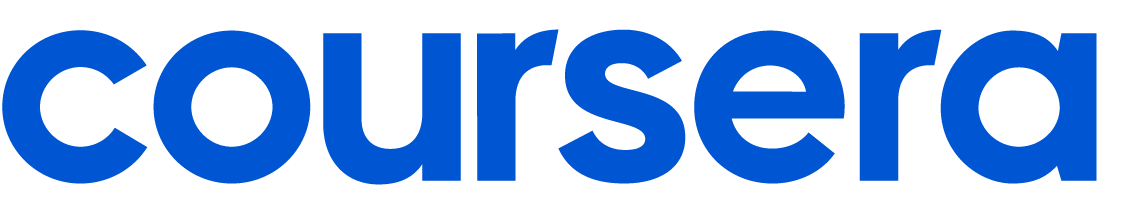

# Welcome to the Data Science Coding Challenge!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1609]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
pd.set_option('future.no_silent_downcasting', True)
data_descriptions

Column_name  \
0                                                                                                                    AccountAge   
1                                                                                                                MonthlyCharges   
2                                                                                                                  TotalCharges   
3                  SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."   
4                                                                                                                 PaymentMethod   
5                                                                                                              PaperlessBilling   
6                           ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."   
7                                                                                                             MultiDeviceAccess   
8                DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."   
9                                                                                                           ViewingHoursPerWeek   
10                                                                                                       AverageViewingDuration   
11                                                                                                     ContentDownloadsPerMonth   
12                                                                                                              GenrePreference   
13                                                                                                                   UserRating   
14                                                                                                       SupportTicketsPerMonth   
15                                                                                                                       Gender   
16                                                                                                                WatchlistSize   
17                                                                                                              ParentalControl   
18                                                                                                             SubtitlesEnabled   
19                                                                                                                   CustomerID   
20  Churn,Target,integer,"The target variable indicating whether a user has churned or not (1 for churned, 0 for not churned)."   

   Column_type Data_type  \
0      Feature   integer   
1      Feature     float   
2      Feature     float   
3          NaN       NaN   
4      Feature    string   
5      Feature    string   
6          NaN       NaN   
7      Feature    string   
8          NaN       NaN   
9      Feature     float   
10     Feature     float   
11     Feature   integer   
12     Feature    string   
13     Feature     float   
14     Feature   integer   
15     Feature    string   
16     Feature     float   
17     Feature    string   
18     Feature    string   
19  Identifier    string   
20         NaN       NaN   

                                                                              Description  
0                                                The age of the user's account in months.  
1                                      The amount charged to the user on a monthly basis.  
2                     The total charges incurred by the user over the account's lifetime.  
3                                                                                     NaN  
4                                                 The method of payment used by the user.  
5                 Indicates whether the user has opted for paper

## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 104,480 rows (plus a header row). The first column should be `CustomerID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [1612]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import auc, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, \
ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve, classification_report

from sklearn.inspection import permutation_importance

import statsmodels.api as sm

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler 
 
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.dummy import DummyClassifier

from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold

from xgboost import plot_importance

from sklearn.feature_selection import RFE, SelectFromModel, VarianceThreshold
from sklearn.utils.class_weight import compute_sample_weight

from sklearn.pipeline import Pipeline

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [1614]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


AccountAge  MonthlyCharges  TotalCharges SubscriptionType  \
0          20       11.055215    221.104302          Premium   
1          57        5.175208    294.986882            Basic   
2          73       12.106657    883.785952            Basic   
3          32        7.263743    232.439774            Basic   
4          57       16.953078    966.325422          Premium   

      PaymentMethod PaperlessBilling ContentType MultiDeviceAccess  \
0      Mailed check               No        Both                No   
1       Credit card              Yes      Movies                No   
2      Mailed check              Yes      Movies                No   
3  Electronic check               No    TV Shows                No   
4  Electronic check              Yes    TV Shows                No   

  DeviceRegistered  ViewingHoursPerWeek  ...  ContentDownloadsPerMonth  \
0           Mobile            36.758104  ...                        10   
1           Tablet            32.450568  ...                        18   
2         Computer             7.395160  ...                        23   
3           Tablet            27.960389  ...                        30   
4               TV            20.083397  ...                        20   

   GenrePreference UserRating  SupportTicketsPerMonth  Gender WatchlistSize  \
0           Sci-Fi   2.176498                       4    Male             3   
1           Action   3.478632                       8    Male            23   
2          Fantasy   4.238824                       6    Male             1   
3            Drama   4.276013                       2    Male            24   
4           Comedy   3.616170                       4  Female             0   

   ParentalControl SubtitlesEnabled  CustomerID Churn  
0               No               No  CB6SXPNVZA     0  
1               No              Yes  S7R2G87O09     0  
2              Yes              Yes  EASDC20BDT     0  
3              Yes              Yes  NPF69NT69N     0  
4               No               No  4LGYPK7VOL     0  

[5 rows x 21 columns]

In [1615]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


AccountAge  MonthlyCharges  TotalCharges SubscriptionType  \
0          38       17.869374    679.036195          Premium   
1          77        9.912854    763.289768            Basic   
2           5       15.019011     75.095057         Standard   
3          88       15.357406   1351.451692         Standard   
4          91       12.406033   1128.949004         Standard   

      PaymentMethod PaperlessBilling ContentType MultiDeviceAccess  \
0      Mailed check               No    TV Shows                No   
1  Electronic check              Yes    TV Shows                No   
2     Bank transfer               No    TV Shows               Yes   
3  Electronic check               No        Both               Yes   
4       Credit card              Yes    TV Shows               Yes   

  DeviceRegistered  ViewingHoursPerWeek  AverageViewingDuration  \
0               TV            29.126308              122.274031   
1               TV            36.873729               57.093319   
2         Computer             7.601729              140.414001   
3           Tablet            35.586430              177.002419   
4           Tablet            23.503651               70.308376   

   ContentDownloadsPerMonth GenrePreference  UserRating  \
0                        42          Comedy    3.522724   
1                        43          Action    2.021545   
2                        14          Sci-Fi    4.806126   
3                        14          Comedy    4.943900   
4                         6           Drama    2.846880   

   SupportTicketsPerMonth  Gender  WatchlistSize ParentalControl  \
0                       2    Male             23              No   
1                       2  Female             22             Yes   
2                       2  Female             22              No   
3                       0  Female             23             Yes   
4                       6  Female              0              No   

  SubtitlesEnabled  CustomerID  
0               No  O1W6BHP6RM  
1               No  LFR4X92X8H  
2              Yes  QM5GBIYODA  
3              Yes  D9RXTK2K9F  
4               No  ENTCCHR1LR

## Explore, Clean, Validate, and Visualize the Data

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [1617]:
print(train_df.info())
print()
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [1618]:
train_df.describe()

AccountAge  MonthlyCharges   TotalCharges  ViewingHoursPerWeek  \
count  243787.000000   243787.000000  243787.000000        243787.000000   
mean       60.083758       12.490695     750.741017            20.502179   
std        34.285143        4.327615     523.073273            11.243753   
min         1.000000        4.990062       4.991154             1.000065   
25%        30.000000        8.738543     329.147027            10.763953   
50%        60.000000       12.495555     649.878487            20.523116   
75%        90.000000       16.238160    1089.317362            30.219396   
max       119.000000       19.989957    2378.723844            39.999723   

       AverageViewingDuration  ContentDownloadsPerMonth     UserRating  \
count           243787.000000             243787.000000  243787.000000   
mean                92.264061                 24.503513       3.002713   
std                 50.505243                 14.421174       1.155259   
min                  5.000547                  0.000000       1.000007   
25%                 48.382395                 12.000000       2.000853   
50%                 92.249992                 24.000000       3.002261   
75%                135.908048                 37.000000       4.002157   
max                179.999275                 49.000000       4.999989   

       SupportTicketsPerMonth  WatchlistSize          Churn  
count           243787.000000  243787.000000  243787.000000  
mean                 4.504186      12.018508       0.181232  
std                  2.872548       7.193034       0.385211  
min                  0.000000       0.000000       0.000000  
25%                  2.000000       6.000000       0.000000  
50%                  4.000000      12.000000       0.000000  
75%                  7.000000      18.000000       0.000000  
max                  9.000000      24.000000       1.000000

**Checking missing values**

In [1620]:
print("Number of missing values in 'train_df':")
print(train_df.isna().sum())
print()
print("Number of missing values in 'test_df':")
print(test_df.isna().sum())

Number of missing values in 'train_df':
AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

Number of missing values in 'test_df':
AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
Viewing

There are no missing values in the both datasets.

# **Cleaning data** #

Two variables have values which include space characters ' '. In order to avoid future problems, I would be best to replace the space characters with underscores before I continue with modeling. 
The identified variables with blank characters among its possible values are: 'PaymentMethod' and 'ContentType'.
 

In [1624]:
# Check the possible values of 'PaymentMethod' variable
print(train_df['PaymentMethod'].value_counts())
print(test_df['PaymentMethod'].value_counts())

PaymentMethod
Electronic check    61313
Credit card         60924
Bank transfer       60797
Mailed check        60753
Name: count, dtype: int64
PaymentMethod
Mailed check        26166
Credit card         26134
Electronic check    26127
Bank transfer       26053
Name: count, dtype: int64


This variable can have 4 different values, all with space characters.
Let's replace them with underscores, and check the outcome.

In [1626]:
replacements = {'Electronic check':'ElectronicCheck', 'Credit card':'CreditCard',
                'Bank transfer':'BankTransfer', 'Mailed check':'MailedCheck'}

train_df.replace(replacements, inplace=True)
test_df.replace(replacements, inplace=True)

print(train_df['PaymentMethod'].value_counts())
print(test_df['PaymentMethod'].value_counts())

PaymentMethod
ElectronicCheck    61313
CreditCard         60924
BankTransfer       60797
MailedCheck        60753
Name: count, dtype: int64
PaymentMethod
MailedCheck        26166
CreditCard         26134
ElectronicCheck    26127
BankTransfer       26053
Name: count, dtype: int64


In [1627]:
# Check the possible values of 'ContentType' variable
print(train_df['ContentType'].value_counts())
print(test_df['ContentType'].value_counts())

ContentType
Both        81737
TV Shows    81145
Movies      80905
Name: count, dtype: int64
ContentType
Both        35087
Movies      34848
TV Shows    34545
Name: count, dtype: int64


In [1628]:
# Change the 'TV Shows' value to 'TV_Shows' and check the outcome
replacement = {'TV Shows':'TVShows'}

train_df.replace(replacement, inplace=True)
test_df.replace(replacement, inplace=True)

print(train_df['ContentType'].value_counts())
print(test_df['ContentType'].value_counts())

ContentType
Both       81737
TVShows    81145
Movies     80905
Name: count, dtype: int64
ContentType
Both       35087
Movies     34848
TVShows    34545
Name: count, dtype: int64


**Outliers in continuos variables**
No matter that tree-based models are resistant to outliers, I will replace them with values in order not to skew the process of learning.

In [1630]:
train_df['AccountAge'].describe()

count    243787.000000
mean         60.083758
std          34.285143
min           1.000000
25%          30.000000
50%          60.000000
75%          90.000000
max         119.000000
Name: AccountAge, dtype: float64

60.0


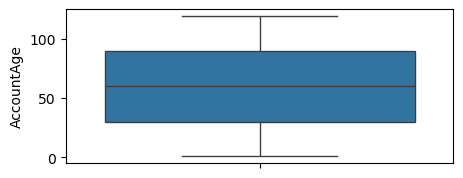

In [1631]:
print(train_df['AccountAge'].quantile(0.75) - train_df['AccountAge'].quantile(0.25))
plt.figure(figsize=(5,2))
sns.boxplot(train_df['AccountAge']);

No outliers in 'AccountAge'.

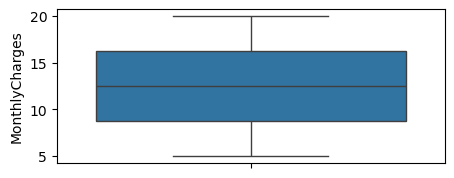

In [1633]:
plt.figure(figsize=(5,2))
sns.boxplot(train_df['MonthlyCharges']);

No outliers in 'MonthlyCharges'.

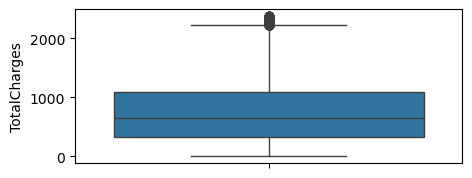

In [1635]:
plt.figure(figsize=(5,2))
sns.boxplot(train_df['TotalCharges']);

In [1653]:
IQR_train = train_df['TotalCharges'].quantile(0.75) - train_df['TotalCharges'].quantile(0.25)
print('IQR train:', IQR)
lower_train = train_df['TotalCharges'].quantile(0.25) - 1.5*IQR
print('lower:', lower_train)
upper_train = train_df['TotalCharges'].quantile(0.75) + 1.5*IQR
print('upper:', upper_train)
print()
IQR_test = test_df['TotalCharges'].quantile(0.75) - test_df['TotalCharges'].quantile(0.25)
print('IQR test:', IQR)
lower_test = test_df['TotalCharges'].quantile(0.25) - 1.5*IQR
print('lower:', lower_test)
upper_test = test_df['TotalCharges'].quantile(0.75) + 1.5*IQR
print('upper:', upper_test)
print()
train_df_filtered = train_df[train_df['TotalCharges']<0]  #check for negative values
print(train_df_filtered.count())
print()
train_df_filtered = train_df[(train_df['TotalCharges']<lower_train) | (train_df['TotalCharges']>upper_train)]
print(train_df_filtered.count())
test_df_filtered = test_df[(test_df['TotalCharges']<lower_test) | (test_df['TotalCharges']>upper_test)]
print(test_df_filtered.count())

#print()
#train_df_sorted = train_df_filtered.sort_values(['TotalCharges'], ascending=False)
#train_df_filtered = train_df[train_df['TotalCharges']>upper]
#print(train_df_filtered.count())

IQR train: 760.1703351242627
lower: -811.1084761822483
upper: 2229.5728643148022

IQR test: 760.1703351242627
lower: -811.2939596518196
upper: 2221.5224939265163

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

AccountAge                  741
MonthlyCharges              741
TotalCharges                741
SubscriptionType            741
PaymentMethod               741
PaperlessBilling            741
C

There is small number of outliers in 'TotalCharges', so I will leave them.

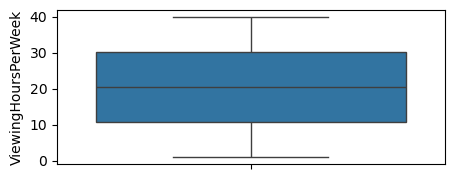

In [511]:
plt.figure(figsize=(5,2))
sns.boxplot(train_df['ViewingHoursPerWeek']);

No outliers in 'ViewingHoursPerWeek'.

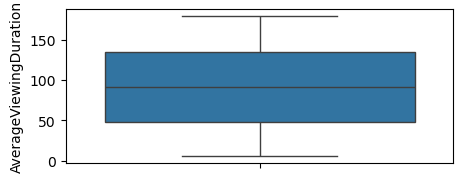

In [513]:
plt.figure(figsize=(5,2))
sns.boxplot(train_df['AverageViewingDuration']);

No outliers in 'AverageViewingDuration'.

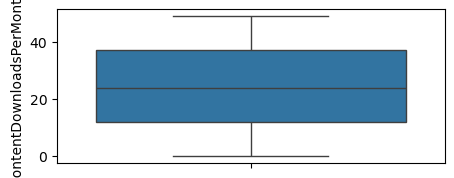

In [515]:
plt.figure(figsize=(5,2))
sns.boxplot(train_df['ContentDownloadsPerMonth']);	

No outliers in 'ContentDownloadsPerMonth'.

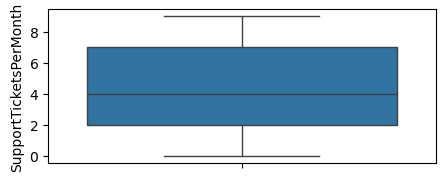

In [517]:
plt.figure(figsize=(5,2))
sns.boxplot(train_df['SupportTicketsPerMonth']);

No outliers in 'SupportTicketsPerMonth'.

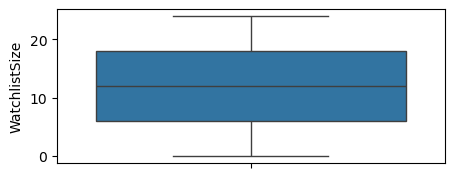

In [519]:
plt.figure(figsize=(5,2))
sns.boxplot(train_df['WatchlistSize']);

No outliers in 'WatchlistSize'.

# **Feature engineering** #
Let's combine some features to try to get more predictive power.

**ChurnLabel**

In [523]:
# Create new variable 'ChurnLabel' from the 'Churn' variable with encoded values 0 - Not Churned, and 1 - Churned
train_df['ChurnLabel'] = train_df['Churn'].map({0: 'Not Churned', 1: 'Churned'})

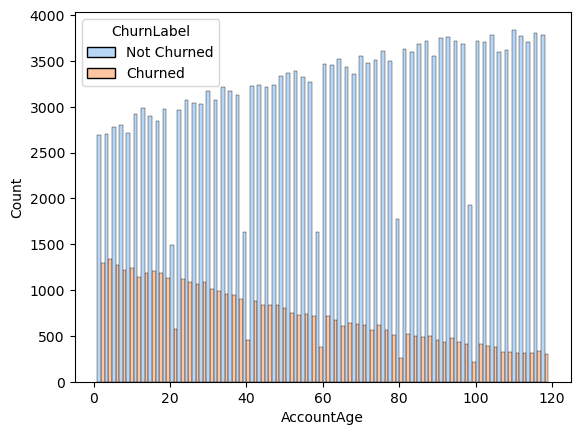

In [524]:
#Plot histplot to examine the account age of churned and not-churned users.
sns.histplot(data=train_df, x='AccountAge', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**ChurnRiskAccountAge**

In [526]:
num_bins = 6

# Create quantiles in descending order
labels = range(num_bins - 1, -1, -1)

# Use pd.qcut to create quantile-based bins
train_df['ChurnRiskAccountAge'] = pd.qcut(train_df['AccountAge'], q=num_bins, labels=labels)
train_df['ChurnRiskAccountAge'] = train_df['ChurnRiskAccountAge'].astype('int32')

test_df['ChurnRiskAccountAge'] = pd.qcut(test_df['AccountAge'], q=num_bins, labels=labels)
test_df['ChurnRiskAccountAge'] = test_df['ChurnRiskAccountAge'].astype('int32')

# Display the distribution of the bins
print(train_df['ChurnRiskAccountAge'].value_counts().sort_index())

# Check the churn rate among bins
print(train_df.groupby('ChurnRiskAccountAge', observed=False)['Churn'].value_counts(normalize=True))

ChurnRiskAccountAge
0    38676
1    41521
2    40948
3    40891
4    39141
5    42610
Name: count, dtype: int64
ChurnRiskAccountAge  Churn
0                    0        0.917003
                     1        0.082997
1                    0        0.888659
                     1        0.111341
2                    0        0.851910
                     1        0.148090
3                    0        0.807904
                     1        0.192096
4                    0        0.754247
                     1        0.245753
5                    0        0.699343
                     1        0.300657
Name: proportion, dtype: float64


**ChurnRisk*AccountAge**

In [528]:
train_df['ChurnRiskAccountAge'] = train_df['ChurnRiskAccountAge'] * train_df['AccountAge']
test_df['ChurnRiskAccountAge'] = test_df['ChurnRiskAccountAge'] * test_df['AccountAge']

**ViewingHoursPerWeek**

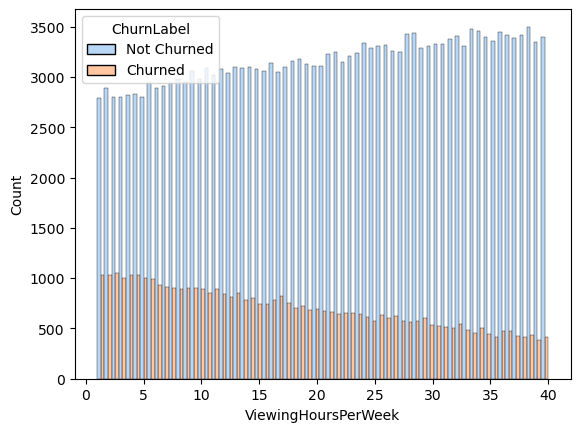

In [530]:
#Plot histplot to examine the account age of churned and not-churned users.
sns.histplot(data=train_df, x='ViewingHoursPerWeek', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**ChurnRiskViewingHoursPerWeek**

In [532]:
num_bins = 4

# Create quantiles in descending order
labels = range(num_bins - 1, -1, -1)

# Use pd.qcut to create quantile-based bins
train_df['ChurnRiskViewingHoursPerWeek'] = pd.qcut(train_df['ViewingHoursPerWeek'], q=num_bins, labels=labels)
train_df['ChurnRiskViewingHoursPerWeek'] = train_df['ChurnRiskViewingHoursPerWeek'].astype('int32')

test_df['ChurnRiskViewingHoursPerWeek'] = pd.qcut(test_df['ViewingHoursPerWeek'], q=num_bins, labels=labels)
test_df['ChurnRiskViewingHoursPerWeek'] = test_df['ChurnRiskViewingHoursPerWeek'].astype('int32')

# Display the distribution of the bins
print(train_df['ChurnRiskViewingHoursPerWeek'].value_counts().sort_index())

# Check the churn rate among bins
print(train_df.groupby('ChurnRiskViewingHoursPerWeek', observed=False)['Churn'].value_counts(normalize=True))

ChurnRiskViewingHoursPerWeek
0    60947
1    60946
2    60947
3    60947
Name: count, dtype: int64
ChurnRiskViewingHoursPerWeek  Churn
0                             0        0.880224
                              1        0.119776
1                             0        0.843370
                              1        0.156630
2                             0        0.800056
                              1        0.199944
3                             0        0.751423
                              1        0.248577
Name: proportion, dtype: float64


**ChurnRisk*ViewingHoursPerWeek**

In [534]:
train_df['ChurnRiskViewingHoursPerWeek'] = train_df['ChurnRiskViewingHoursPerWeek'] * train_df['ViewingHoursPerWeek']
test_df['ChurnRiskViewingHoursPerWeek'] = test_df['ChurnRiskViewingHoursPerWeek'] * test_df['ViewingHoursPerWeek']

**ChurnRiskContentDownloadsPerMonth**

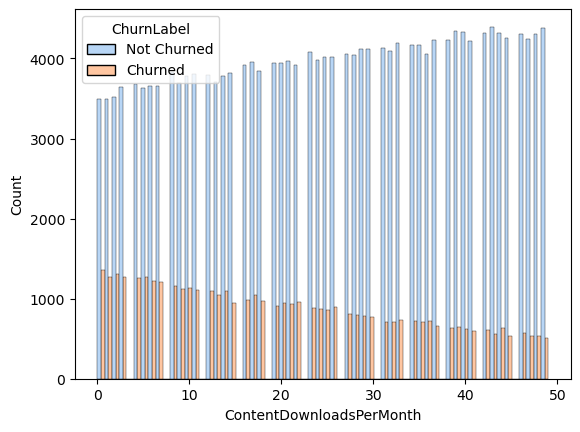

In [536]:
#Plot histplot to examine the account age of churned and not-churned users.
sns.histplot(data=train_df, x='ContentDownloadsPerMonth', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

In [537]:
num_bins = 5

# Create quantiles in descending order
labels = range(num_bins - 1, -1, -1)

# Use pd.qcut to create quantile-based bins
train_df['ChurnRiskContentDownloadsPerMonth'] = pd.qcut(train_df['ContentDownloadsPerMonth'], q=num_bins, labels=labels)
train_df['ChurnRiskContentDownloadsPerMonth'] = train_df['ChurnRiskContentDownloadsPerMonth'].astype('int32')

test_df['ChurnRiskContentDownloadsPerMonth'] = pd.qcut(test_df['ContentDownloadsPerMonth'], q=num_bins, labels=labels)
test_df['ChurnRiskContentDownloadsPerMonth'] = test_df['ChurnRiskContentDownloadsPerMonth'].astype('int32')

# Display the distribution of the bins
print(train_df['ChurnRiskContentDownloadsPerMonth'].value_counts().sort_index())

# Check the churn rate among bins
print(train_df.groupby('ChurnRiskContentDownloadsPerMonth', observed=False)['Churn'].value_counts(normalize=True))

ChurnRiskContentDownloadsPerMonth
0    48742
1    48753
2    43992
3    48652
4    53648
Name: count, dtype: int64
ChurnRiskContentDownloadsPerMonth  Churn
0                                  0        0.883427
                                   1        0.116573
1                                  0        0.856317
                                   1        0.143683
2                                  0        0.823263
                                   1        0.176737
3                                  0        0.791417
                                   1        0.208583
4                                  0        0.747018
                                   1        0.252982
Name: proportion, dtype: float64


**ChurnRisk*ContentDownloadsPerMonth**

In [539]:
train_df['ChurnRiskContentDownloadsPerMonth'] = train_df['ChurnRiskContentDownloadsPerMonth'] * train_df['ContentDownloadsPerMonth']
test_df['ChurnRiskContentDownloadsPerMonth'] = test_df['ChurnRiskContentDownloadsPerMonth'] * test_df['ContentDownloadsPerMonth']

**MonthlyCharges**

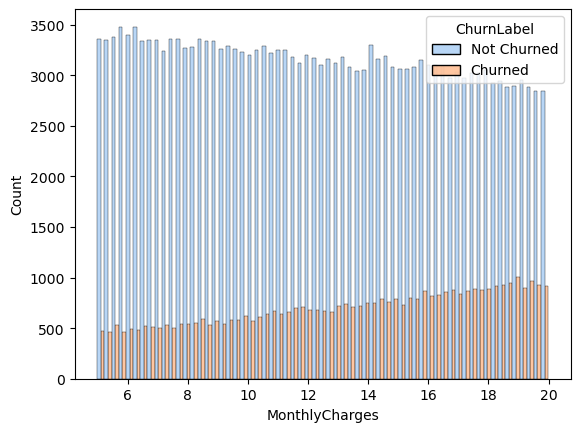

In [541]:
#Plot histplot to examine the total charges of churned and not-churned users.
sns.histplot(data=train_df, x='MonthlyCharges', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

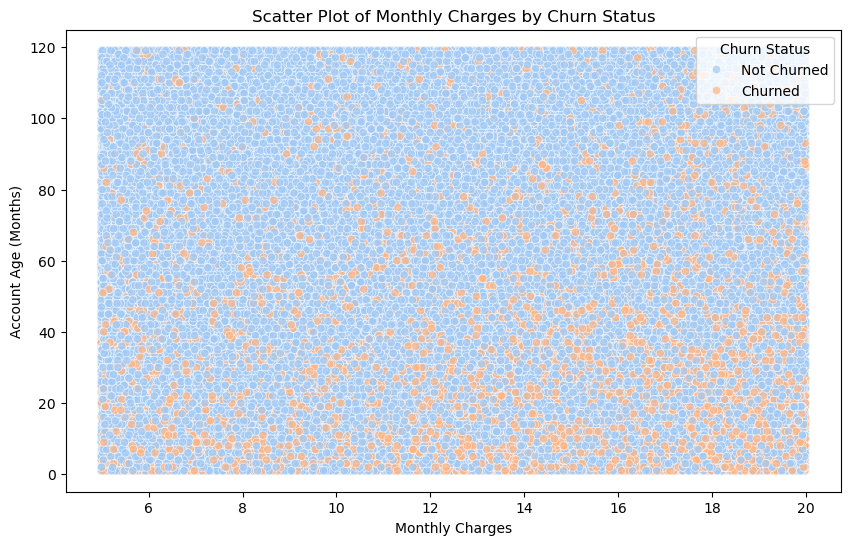

In [542]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=train_df, 
                x='MonthlyCharges', 
                y='AccountAge',  # You can choose another feature for the y-axis if desired
                hue='ChurnLabel', 
                hue_order=['Not Churned', 'Churned'], 
                palette='pastel', 
                alpha=0.7)  # Adjust alpha for better visibility

plt.legend(loc="upper right")

plt.title('Scatter Plot of Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Account Age (Months)')
plt.legend(title='Churn Status', loc='upper right')
plt.show()

**MonthlyChargesPerAge**

In [544]:
train_df['MonthlyCharges_per_Age'] = train_df['MonthlyCharges'] / (train_df['AccountAge'] + 1)
test_df['MonthlyCharges_per_Age'] = test_df['MonthlyCharges'] / (test_df['AccountAge'] + 1)

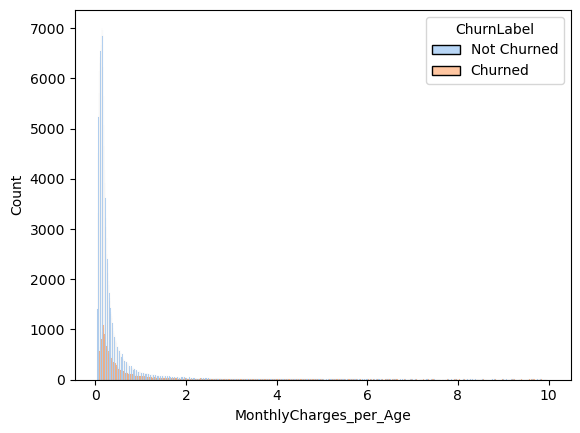

In [545]:
#Plot histplot to examine the monthly charges per account age of churned and not-churned users.
sns.histplot(data=train_df, x='MonthlyCharges_per_Age', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

Minimum value of MonthlyCharges_per_Age: 0.04167587346411646


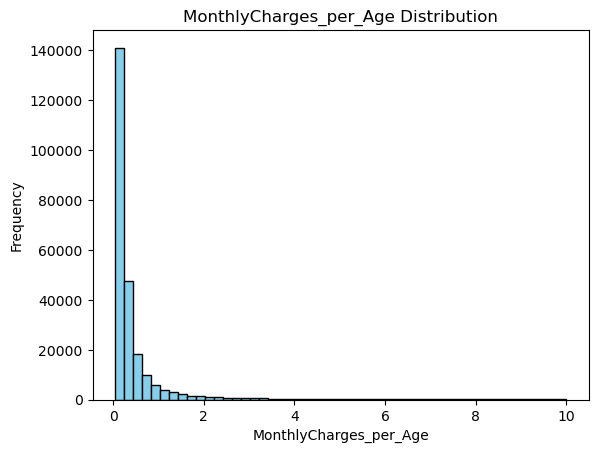

In [546]:
# Check for negative or zero values
print(f"Minimum value of MonthlyCharges_per_Age: {train_df['MonthlyCharges_per_Age'].min()}")

# Plot the histogram
plt.hist(train_df['MonthlyCharges_per_Age'], bins=50, color='skyblue', edgecolor='black')
plt.title("MonthlyCharges_per_Age Distribution")
plt.xlabel("MonthlyCharges_per_Age")
plt.ylabel("Frequency")
plt.show()

In [547]:
# Check how this new feature is correlated with churn
correlation = np.corrcoef(train_df['MonthlyCharges_per_Age'], train_df['Churn'])[0, 1]
print(f"Correlation with Churn: {correlation}")

Correlation with Churn: 0.1376422938973295


In [548]:
train_df['MonthlyCharges_per_Age_log'] = np.log(train_df['MonthlyCharges_per_Age'])
test_df['MonthlyCharges_per_Age_log'] = np.log(test_df['MonthlyCharges_per_Age'])

In [549]:
# Check how this new feature is correlated with churn
correlation = np.corrcoef(train_df['MonthlyCharges_per_Age_log'], train_df['Churn'])[0, 1]
print(f"Correlation with Churn: {correlation}")

Correlation with Churn: 0.21169926914603573


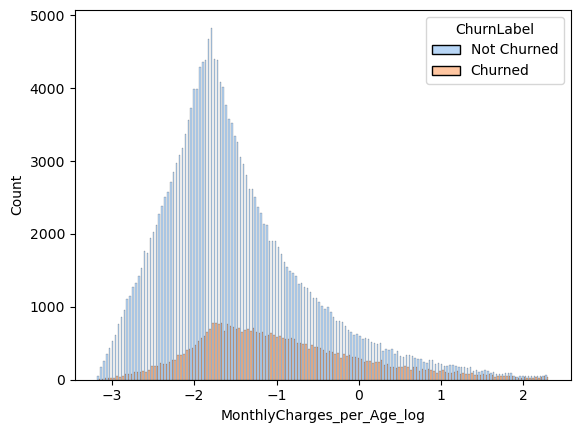

In [550]:
#Plot histplot to examine the monthly charges per account age of churned and not-churned users.
sns.histplot(data=train_df, x='MonthlyCharges_per_Age_log', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

In [551]:
from scipy.stats import ks_2samp

churned_feature_values = train_df[train_df['Churn'] == 1]['MonthlyCharges_per_Age_log'].values
non_churned_feature_values = train_df[train_df['Churn'] == 0]['MonthlyCharges_per_Age_log'].values

print("Churned Feature Values:", churned_feature_values[:10])  # Display first 10 for reference
print("Non-Churned Feature Values:", non_churned_feature_values[:10])  # Display first 10 for reference

ks_stat, p_value = ks_2samp(
    churned_feature_values,
    non_churned_feature_values
)
print("KS Statistic:", ks_stat, "P-value:", p_value)

Churned Feature Values: [-0.30999167 -1.82170243 -1.57191871 -1.63607919 -1.29201018 -1.08014392
 -1.97894805 -1.5648974   0.7377602  -0.52974077]
Non-Churned Feature Values: [-0.64162017 -2.41656339 -1.81030964 -1.51361231 -1.22999362 -2.74890727
 -1.15066095 -1.27743304  0.2280878  -1.83674066]
KS Statistic: 0.245158377170676 P-value: 0.0


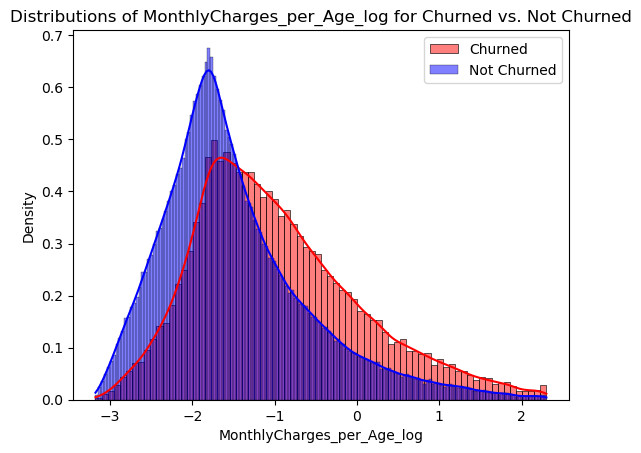

In [552]:
sns.histplot(churned_feature_values, kde=True, color='red', label='Churned', stat="density")
sns.histplot(non_churned_feature_values, kde=True, color='blue', label='Not Churned', stat="density")
plt.legend()
plt.xlabel('MonthlyCharges_per_Age_log')
plt.ylabel('Density')
plt.title('Distributions of MonthlyCharges_per_Age_log for Churned vs. Not Churned')
plt.show()

**ChurnRiskMonthlyCharges**

In [554]:
num_bins = 4

# Create quantiles in descending order
#labels = range(num_bins - 1, -1, -1)

# Use pd.qcut to create quantile-based bins
train_df['ChurnRiskMonthlyCharges'] = pd.qcut(train_df['MonthlyCharges'], q=num_bins, labels=False)
train_df['ChurnRiskMonthlyCharges'] = train_df['ChurnRiskMonthlyCharges'].astype('int32')

test_df['ChurnRiskMonthlyCharges'] = pd.qcut(test_df['MonthlyCharges'], q=num_bins, labels=False)
test_df['ChurnRiskMonthlyCharges'] = test_df['ChurnRiskMonthlyCharges'].astype('int32')

# Display the distribution of the bins
print(train_df['ChurnRiskMonthlyCharges'].value_counts().sort_index())

# Check the churn rate among bins
print(train_df.groupby('ChurnRiskMonthlyCharges', observed=False)['Churn'].value_counts(normalize=True))

ChurnRiskMonthlyCharges
0    60947
1    60947
2    60946
3    60947
Name: count, dtype: int64
ChurnRiskMonthlyCharges  Churn
0                        0        0.866966
                         1        0.133034
1                        0        0.836891
                         1        0.163109
2                        0        0.805041
                         1        0.194959
3                        0        0.766174
                         1        0.233826
Name: proportion, dtype: float64


In [555]:
train_df['ChurnRiskMonthlyCharges'] = train_df['ChurnRiskMonthlyCharges'] * train_df['MonthlyCharges']
test_df['ChurnRiskMonthlyCharges'] = test_df['ChurnRiskMonthlyCharges'] * test_df['MonthlyCharges']

**TotalCharges**

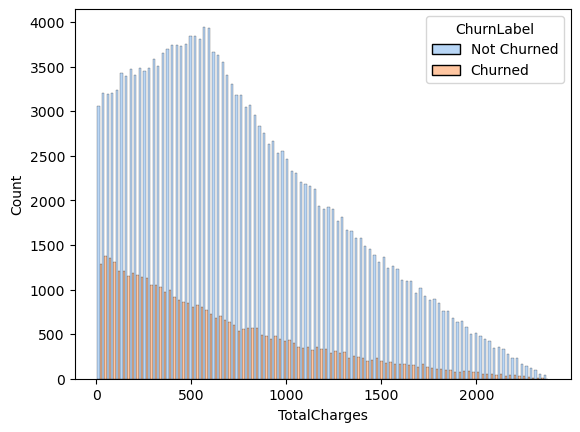

In [557]:
#Plot histplot to examine the total charges of churned and not-churned users.
sns.histplot(data=train_df, x='TotalCharges', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

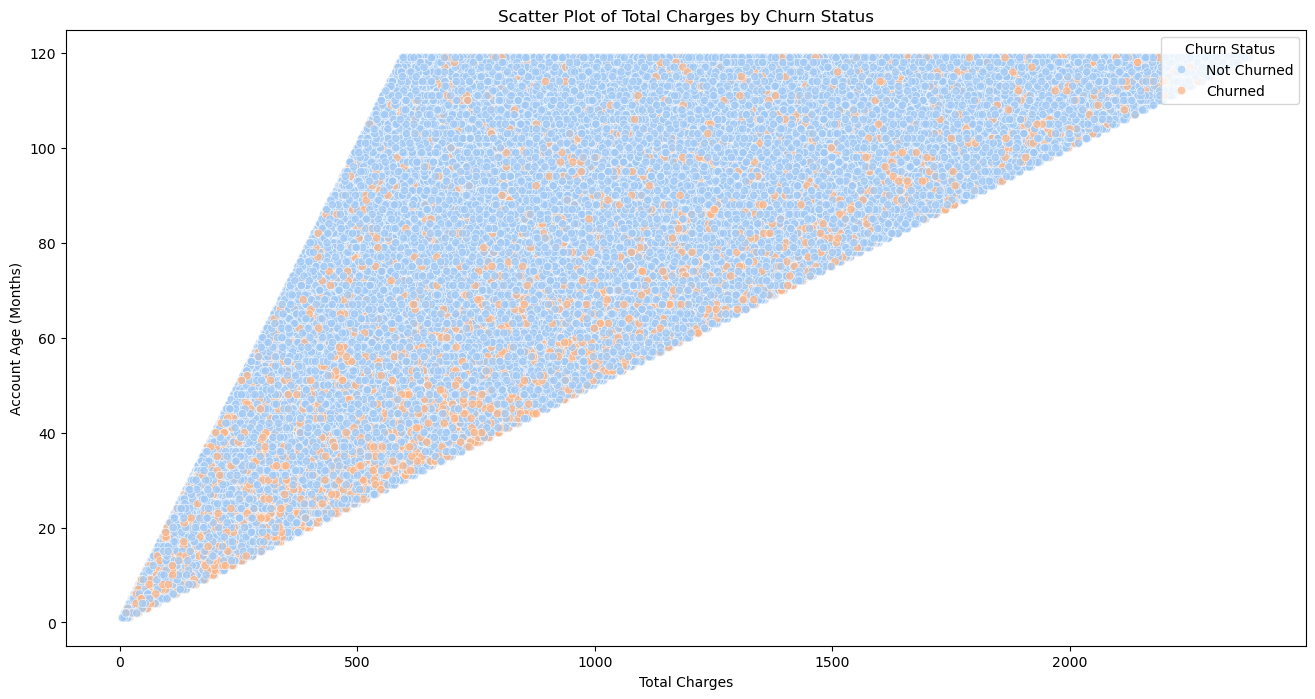

In [558]:
plt.figure(figsize=(16, 8))

sns.scatterplot(data=train_df, 
                x='TotalCharges', 
                y='AccountAge',  # You can choose another feature for the y-axis if desired
                hue='ChurnLabel', 
                hue_order=['Not Churned', 'Churned'], 
                palette='pastel', 
                alpha=0.7)  # Adjust alpha for better visibility

plt.legend(loc="upper right")

plt.title('Scatter Plot of Total Charges by Churn Status')
plt.xlabel('Total Charges')
plt.ylabel('Account Age (Months)')
plt.legend(title='Churn Status', loc='upper right')
plt.show()

**ChurnRiskTotalCharges**

In [560]:
num_bins = 10

# Create quantiles in descending order
labels = range(num_bins - 1, -1, -1)

# Use pd.qcut to create quantile-based bins
train_df['ChurnRiskTotalCharges'] = pd.qcut(train_df['TotalCharges'], q=num_bins, labels=labels)
train_df['ChurnRiskTotalCharges'] = train_df['ChurnRiskTotalCharges'].astype('int32')

test_df['ChurnRiskTotalCharges'] = pd.qcut(test_df['TotalCharges'], q=num_bins, labels=labels)
test_df['ChurnRiskTotalCharges'] = test_df['ChurnRiskTotalCharges'].astype('int32')

# Display the distribution of the bins
print(train_df['ChurnRiskTotalCharges'].value_counts().sort_index())

# Check the churn rate among bins
print(train_df.groupby('ChurnRiskTotalCharges', observed=False)['Churn'].value_counts(normalize=True))

ChurnRiskTotalCharges
0    24379
1    24379
2    24378
3    24379
4    24378
5    24379
6    24379
7    24378
8    24379
9    24379
Name: count, dtype: int64
ChurnRiskTotalCharges  Churn
0                      0        0.880635
                       1        0.119365
1                      0        0.867755
                       1        0.132245
2                      0        0.858069
                       1        0.141931
3                      0        0.849256
                       1        0.150744
4                      0        0.845024
                       1        0.154976
5                      0        0.836211
                       1        0.163789
6                      0        0.814759
                       1        0.185241
7                      0        0.777176
                       1        0.222824
8                      0        0.747406
                       1        0.252594
9                      0        0.711391
                       1        0.

In [561]:
train_df['ChurnRiskTotalCharges'] = train_df['ChurnRiskTotalCharges'] * train_df['TotalCharges']
test_df['ChurnRiskTotalCharges'] = test_df['ChurnRiskTotalCharges'] * test_df['TotalCharges']

In [562]:
#from sklearn.cluster import KMeans

# Set the number of clusters based on your exploration, e.g., 6 clusters
#n_clusters = 6

# Select 'AccountAge' for clustering
#account_age_values = train_df[['AccountAge']].values.reshape(-1, 1)

# Apply KMeans clustering to the AccountAge values
#kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#tenure_clusters = kmeans.fit_predict(account_age_values)

# Save the clusters back into your dataframe as a new feature
#train_df[f'AccountTenure_cluster_{n_clusters}'] = tenure_clusters

# Optional: create a dictionary to keep track of the clustered feature
#clustered_features = {}
#clustered_features[n_clusters] = tenure_clusters

# Check the new feature in the dataframe
#print(train_df.head())

**AverageViewingDuration**

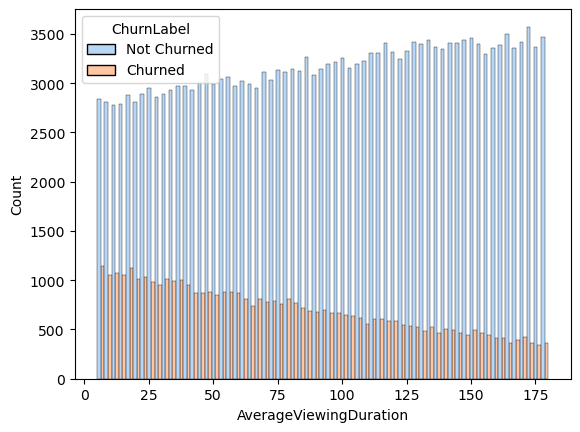

In [564]:
#Plot histplot to examine the average viewing duration of churned and not-churned users.
sns.histplot(data=train_df, x='AverageViewingDuration', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**MonthlyCharges_Per_AverageViewingDuration**

In [566]:
train_df['MonthlyCharges_Per_AverageViewingDuration'] = train_df['MonthlyCharges'] / (train_df['AverageViewingDuration'] + 1)
test_df['MonthlyCharges_Per_AverageViewingDuration'] = test_df['MonthlyCharges'] / (test_df['AverageViewingDuration'] + 1)

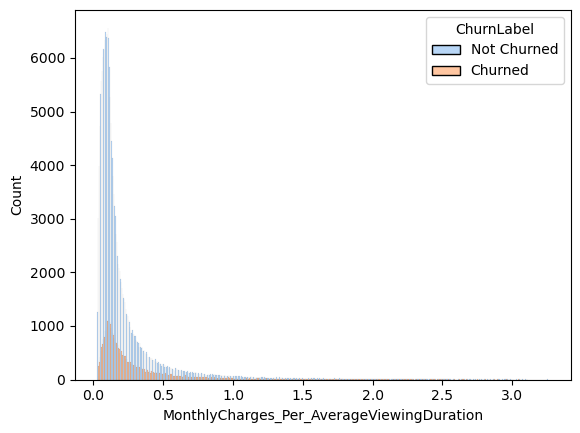

In [567]:
#Plot histplot to examine the monthly charges per average viewing duration of churned and not-churned users.
sns.histplot(data=train_df, x='MonthlyCharges_Per_AverageViewingDuration', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

In [568]:
# Check how this new feature is correlated with churn
correlation = np.corrcoef(train_df['MonthlyCharges_Per_AverageViewingDuration'], train_df['Churn'])[0, 1]
print(f"Correlation with Churn: {correlation}")

Correlation with Churn: 0.12882283612731932


In [569]:
train_df['MonthlyCharges_Per_AverageViewingDuration_log'] = np.log(train_df['MonthlyCharges_Per_AverageViewingDuration'])
test_df['MonthlyCharges_Per_AverageViewingDuration_log'] = np.log(test_df['MonthlyCharges_Per_AverageViewingDuration'])

In [570]:
# Check how this new feature is correlated with churn
correlation = np.corrcoef(train_df['MonthlyCharges_Per_AverageViewingDuration_log'], train_df['Churn'])[0, 1]
print(f"Correlation with Churn: {correlation}")

Correlation with Churn: 0.16907128225841705


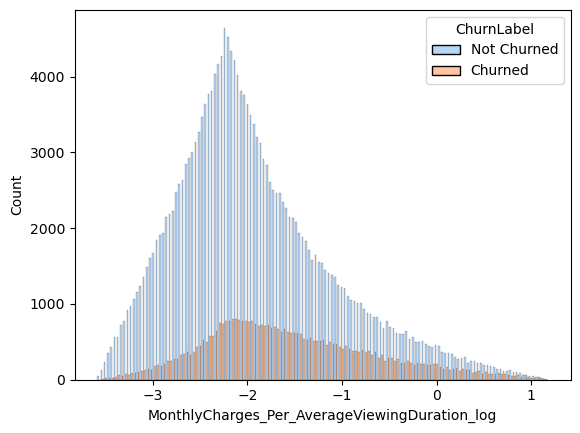

In [571]:
#Plot histplot to examine the monthly charges per account age of churned and not-churned users.
sns.histplot(data=train_df, x='MonthlyCharges_Per_AverageViewingDuration_log', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

In [572]:
from scipy.stats import ks_2samp

churned_feature_values = train_df[train_df['Churn'] == 1]['MonthlyCharges_per_Age_log'].values
non_churned_feature_values = train_df[train_df['Churn'] == 0]['MonthlyCharges_per_Age_log'].values

print("Churned Feature Values:", churned_feature_values[:10])  # Display first 10 for reference
print("Non-Churned Feature Values:", non_churned_feature_values[:10])  # Display first 10 for reference

ks_stat, p_value = ks_2samp(
    churned_feature_values,
    non_churned_feature_values
)
print("KS Statistic:", ks_stat, "P-value:", p_value)

Churned Feature Values: [-0.30999167 -1.82170243 -1.57191871 -1.63607919 -1.29201018 -1.08014392
 -1.97894805 -1.5648974   0.7377602  -0.52974077]
Non-Churned Feature Values: [-0.64162017 -2.41656339 -1.81030964 -1.51361231 -1.22999362 -2.74890727
 -1.15066095 -1.27743304  0.2280878  -1.83674066]
KS Statistic: 0.245158377170676 P-value: 0.0


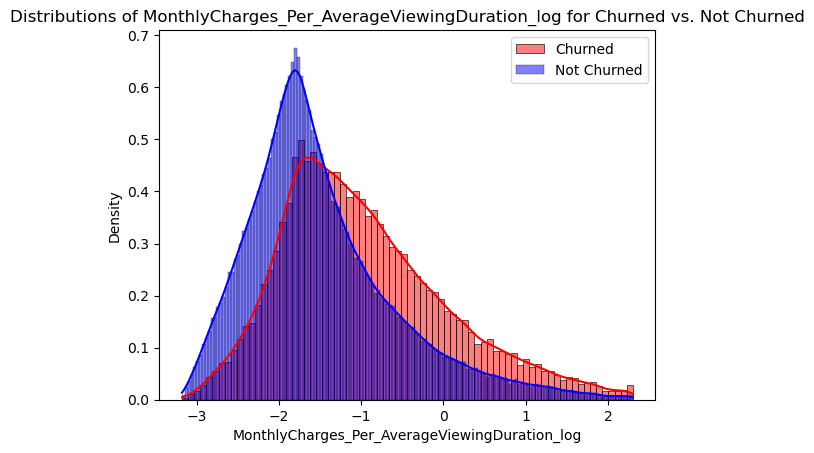

In [573]:
sns.histplot(churned_feature_values, kde=True, color='red', label='Churned', stat="density")
sns.histplot(non_churned_feature_values, kde=True, color='blue', label='Not Churned', stat="density")
plt.legend()
plt.xlabel('MonthlyCharges_Per_AverageViewingDuration_log')
plt.ylabel('Density')
plt.title('Distributions of MonthlyCharges_Per_AverageViewingDuration_log for Churned vs. Not Churned')
plt.show()

In [574]:
train_df['MonthlyCharges_Per_AverageViewingDuration_log'] = np.log(train_df['MonthlyCharges_Per_AverageViewingDuration'])
test_df['MonthlyCharges_Per_AverageViewingDuration_log'] = np.log(test_df['MonthlyCharges_Per_AverageViewingDuration'])

In [575]:
# Check how this new feature is correlated with churn
correlation = np.corrcoef(train_df['MonthlyCharges_Per_AverageViewingDuration_log'], train_df['Churn'])[0, 1]
print(f"Correlation with Churn: {correlation}")

Correlation with Churn: 0.16907128225841705


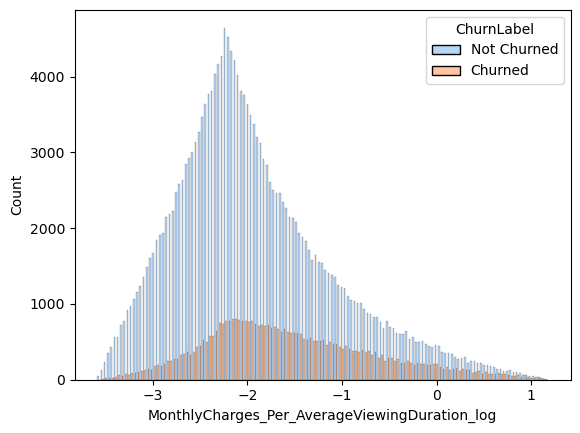

In [576]:
#Plot histplot to examine the monthly charges per account age of churned and not-churned users.
sns.histplot(data=train_df, x='MonthlyCharges_Per_AverageViewingDuration_log', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

In [577]:
from scipy.stats import ks_2samp

churned_feature_values = train_df[train_df['Churn'] == 1]['MonthlyCharges_per_Age_log'].values
non_churned_feature_values = train_df[train_df['Churn'] == 0]['MonthlyCharges_per_Age_log'].values

print("Churned Feature Values:", churned_feature_values[:10])  # Display first 10 for reference
print("Non-Churned Feature Values:", non_churned_feature_values[:10])  # Display first 10 for reference

ks_stat, p_value = ks_2samp(
    churned_feature_values,
    non_churned_feature_values
)
print("KS Statistic:", ks_stat, "P-value:", p_value)

Churned Feature Values: [-0.30999167 -1.82170243 -1.57191871 -1.63607919 -1.29201018 -1.08014392
 -1.97894805 -1.5648974   0.7377602  -0.52974077]
Non-Churned Feature Values: [-0.64162017 -2.41656339 -1.81030964 -1.51361231 -1.22999362 -2.74890727
 -1.15066095 -1.27743304  0.2280878  -1.83674066]
KS Statistic: 0.245158377170676 P-value: 0.0


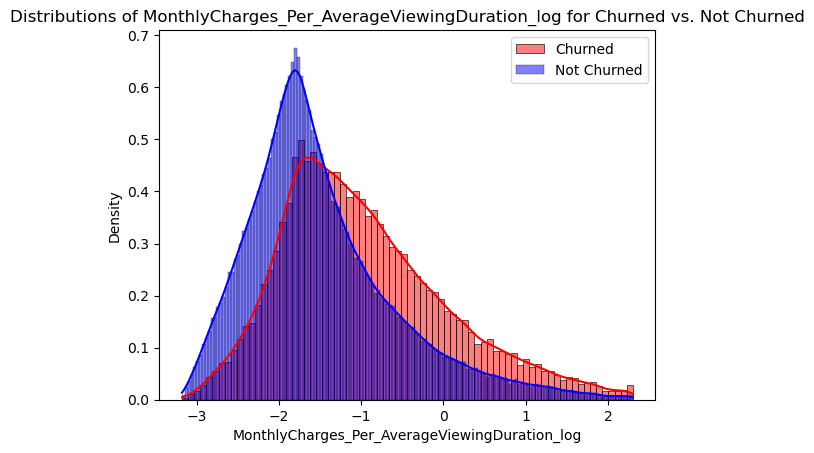

In [578]:
sns.histplot(churned_feature_values, kde=True, color='red', label='Churned', stat="density")
sns.histplot(non_churned_feature_values, kde=True, color='blue', label='Not Churned', stat="density")
plt.legend()
plt.xlabel('MonthlyCharges_Per_AverageViewingDuration_log')
plt.ylabel('Density')
plt.title('Distributions of MonthlyCharges_Per_AverageViewingDuration_log for Churned vs. Not Churned')
plt.show()

In [579]:
train_df['MonthlyCharges_Per_AverageViewingDuration_log'] = np.log(train_df['MonthlyCharges_Per_AverageViewingDuration'])
test_df['MonthlyCharges_Per_AverageViewingDuration_log'] = np.log(test_df['MonthlyCharges_Per_AverageViewingDuration'])

In [580]:
# Check how this new feature is correlated with churn
correlation = np.corrcoef(train_df['MonthlyCharges_Per_AverageViewingDuration_log'], train_df['Churn'])[0, 1]
print(f"Correlation with Churn: {correlation}")

Correlation with Churn: 0.16907128225841705


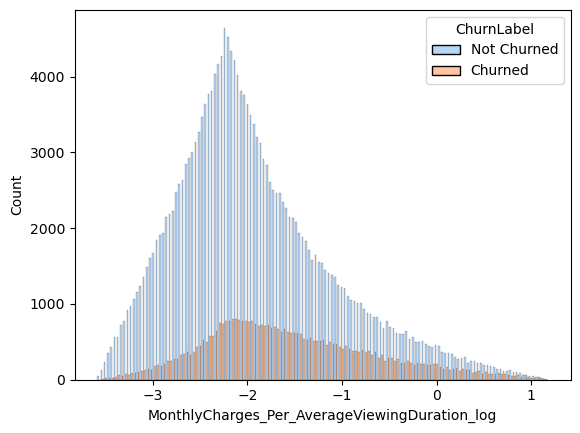

In [581]:
#Plot histplot to examine the monthly charges per account age of churned and not-churned users.
sns.histplot(data=train_df, x='MonthlyCharges_Per_AverageViewingDuration_log', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

In [582]:
from scipy.stats import ks_2samp

churned_feature_values = train_df[train_df['Churn'] == 1]['MonthlyCharges_per_Age_log'].values
non_churned_feature_values = train_df[train_df['Churn'] == 0]['MonthlyCharges_per_Age_log'].values

print("Churned Feature Values:", churned_feature_values[:10])  # Display first 10 for reference
print("Non-Churned Feature Values:", non_churned_feature_values[:10])  # Display first 10 for reference

ks_stat, p_value = ks_2samp(
    churned_feature_values,
    non_churned_feature_values
)
print("KS Statistic:", ks_stat, "P-value:", p_value)

Churned Feature Values: [-0.30999167 -1.82170243 -1.57191871 -1.63607919 -1.29201018 -1.08014392
 -1.97894805 -1.5648974   0.7377602  -0.52974077]
Non-Churned Feature Values: [-0.64162017 -2.41656339 -1.81030964 -1.51361231 -1.22999362 -2.74890727
 -1.15066095 -1.27743304  0.2280878  -1.83674066]
KS Statistic: 0.245158377170676 P-value: 0.0


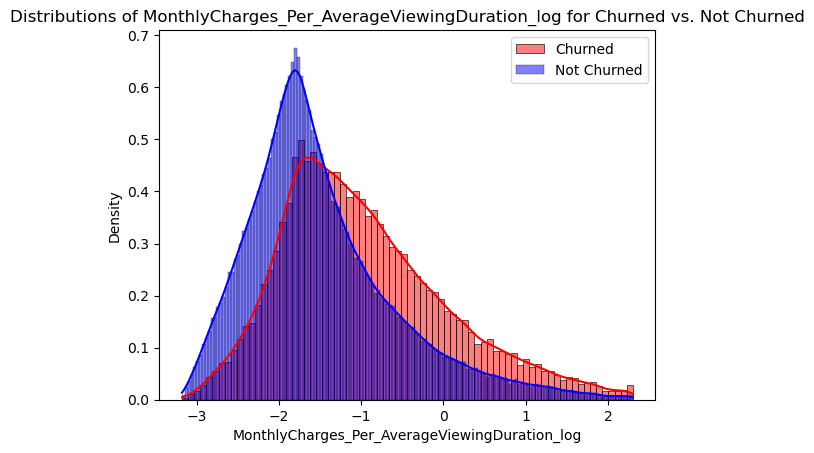

In [583]:
sns.histplot(churned_feature_values, kde=True, color='red', label='Churned', stat="density")
sns.histplot(non_churned_feature_values, kde=True, color='blue', label='Not Churned', stat="density")
plt.legend()
plt.xlabel('MonthlyCharges_Per_AverageViewingDuration_log')
plt.ylabel('Density')
plt.title('Distributions of MonthlyCharges_Per_AverageViewingDuration_log for Churned vs. Not Churned')
plt.show()

**SupportTicketsPerMonth**

In [ ]:
#Plot histplot to examine the support tickets per month per account age of churned and not-churned users.
sns.histplot(data=train_df, x='SupportTicketsPerMonth', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**SupportTicketsPerMonth_Per_Age**

In [585]:
train_df['SupportTicketsPerMonth_Per_Age'] = train_df['SupportTicketsPerMonth'] / (train_df['AccountAge'] + 1)
test_df['SupportTicketsPerMonth_Per_Age'] = test_df['SupportTicketsPerMonth'] / (test_df['AccountAge'] + 1)

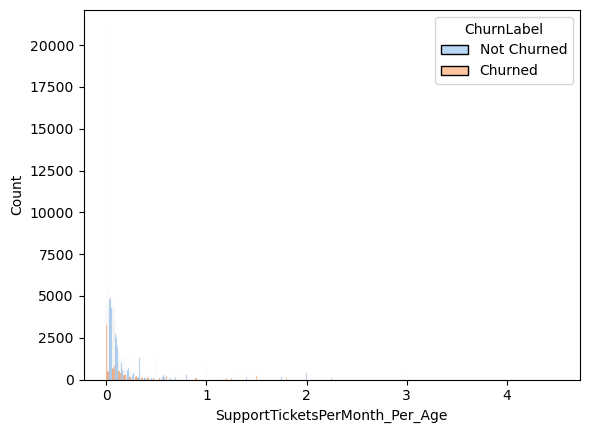

In [586]:
#Plot histplot to examine the support tickets per month per account age of churned and not-churned users.
sns.histplot(data=train_df, x='SupportTicketsPerMonth_Per_Age', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

In [587]:
# Check how this new feature is correlated with churn
correlation = np.corrcoef(train_df['SupportTicketsPerMonth_Per_Age'], train_df['Churn'])[0, 1]
print(f"Correlation with Churn: {correlation}")

Correlation with Churn: 0.13186077318384223


In [588]:
from scipy.stats import ks_2samp

churned_feature_values = train_df[train_df['Churn'] == 1]['SupportTicketsPerMonth_Per_Age'].values
non_churned_feature_values = train_df[train_df['Churn'] == 0]['SupportTicketsPerMonth_Per_Age'].values

print("Churned Feature Values:", churned_feature_values[:10])  # Display first 10 for reference
print("Non-Churned Feature Values:", non_churned_feature_values[:10])  # Display first 10 for reference

ks_stat, p_value = ks_2samp(
    churned_feature_values,
    non_churned_feature_values
)
print("KS Statistic:", ks_stat, "P-value:", p_value)

Churned Feature Values: [0.         0.         0.05747126 0.06410256 0.03278689 0.18
 0.13636364 0.04819277 0.44444444 0.26666667]
Non-Churned Feature Values: [0.19047619 0.13793103 0.08108108 0.06060606 0.06896552 0.07017544
 0.23076923 0.07692308 0.         0.00869565]
KS Statistic: 0.21839297634783345 P-value: 0.0


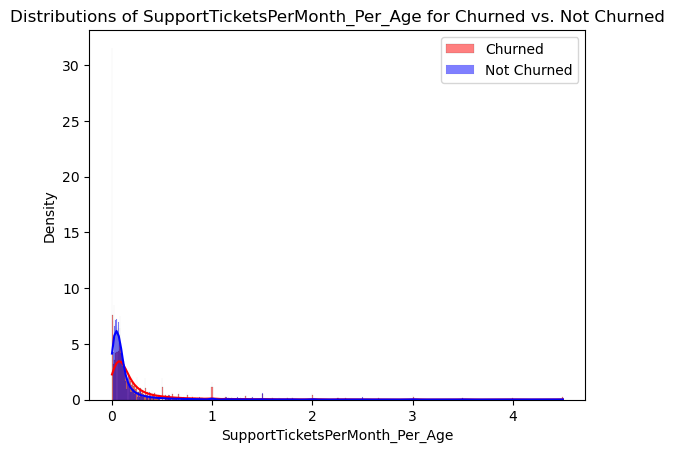

In [589]:
sns.histplot(churned_feature_values, kde=True, color='red', label='Churned', stat="density")
sns.histplot(non_churned_feature_values, kde=True, color='blue', label='Not Churned', stat="density")
plt.legend()
plt.xlabel('SupportTicketsPerMonth_Per_Age')
plt.ylabel('Density')
plt.title('Distributions of SupportTicketsPerMonth_Per_Age for Churned vs. Not Churned')
plt.show()

In [590]:
min_value_train = train_df['SupportTicketsPerMonth_Per_Age'].min()
min_value_test = test_df['SupportTicketsPerMonth_Per_Age'].min()
if min_value_train <= 0:
    shift = abs(min_value_train) + 1
    train_df['SupportTicketsPerMonth_Per_Age_log'] = np.log(train_df['SupportTicketsPerMonth_Per_Age'] + shift)
else:
    train_df['SupportTicketsPerMonth_Per_Age_log'] = np.log(train_df['SupportTicketsPerMonth_Per_Age'])

if min_value_test <= 0:
    shift = abs(min_value_test) + 1
    test_df['SupportTicketsPerMonth_Per_Age_log'] = np.log(test_df['SupportTicketsPerMonth_Per_Age'] + shift)
else:
    test_df['SupportTicketsPerMonth_Per_Age_log'] = np.log(test_df['SupportTicketsPerMonth_Per_Age'])

In [591]:
# Check how this new feature is correlated with churn
correlation = np.corrcoef(train_df['SupportTicketsPerMonth_Per_Age_log'], train_df['Churn'])[0, 1]
print(f"Correlation with Churn: {correlation}")

Correlation with Churn: 0.1597043086845544


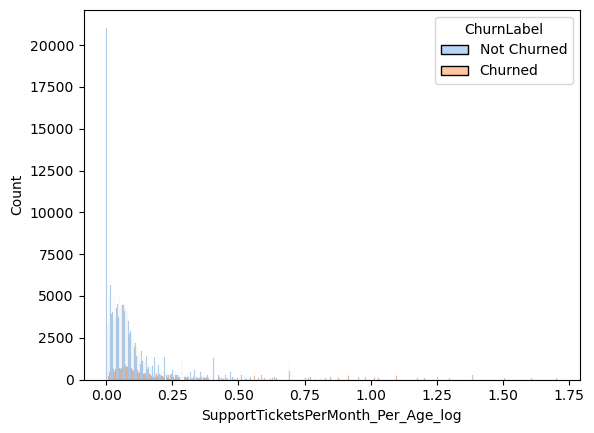

In [592]:
#Plot histplot to examine the monthly charges per account age of churned and not-churned users.
sns.histplot(data=train_df, x='SupportTicketsPerMonth_Per_Age_log', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**SupportTicketsPerMonth_Per_AverageViewingDuration**

In [594]:
train_df['SupportTicketsPerMonth_Per_AverageViewingDuration'] = train_df['SupportTicketsPerMonth'] / (train_df['AverageViewingDuration'] + 1)
test_df['SupportTicketsPerMonth_Per_AverageViewingDuration'] = test_df['SupportTicketsPerMonth'] / (test_df['AverageViewingDuration'] + 1)

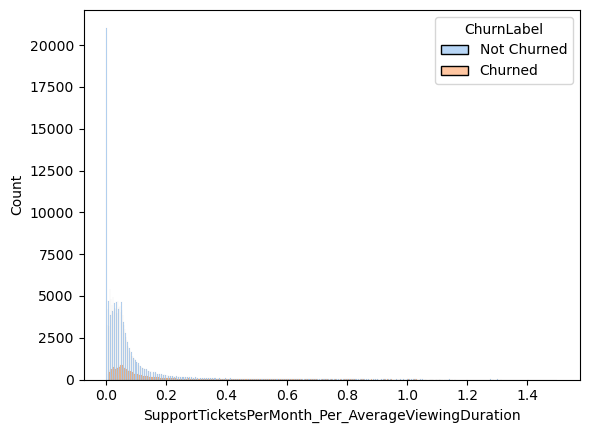

In [595]:
#Plot histplot to examine the support tickets per month per average viewing duration of churned and not-churned users.
sns.histplot(data=train_df, x='SupportTicketsPerMonth_Per_AverageViewingDuration', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

In [596]:
# Check how this new feature is correlated with churn
correlation = np.corrcoef(train_df['SupportTicketsPerMonth_Per_AverageViewingDuration'], train_df['Churn'])[0, 1]
print(f"Correlation with Churn: {correlation}")

Correlation with Churn: 0.12296211291166995


In [597]:
from scipy.stats import ks_2samp

churned_feature_values = train_df[train_df['Churn'] == 1]['SupportTicketsPerMonth_Per_AverageViewingDuration'].values
non_churned_feature_values = train_df[train_df['Churn'] == 0]['SupportTicketsPerMonth_Per_AverageViewingDuration'].values

print("Churned Feature Values:", churned_feature_values[:10])  # Display first 10 for reference
print("Non-Churned Feature Values:", non_churned_feature_values[:10])  # Display first 10 for reference

ks_stat, p_value = ks_2samp(
    churned_feature_values,
    non_churned_feature_values
)
print("KS Statistic:", ks_stat, "P-value:", p_value)

Churned Feature Values: [0.         0.         0.12186855 0.06538727 0.0491096  0.07906672
 0.32634191 0.04616325 0.03750105 0.09636286]
Non-Churned Feature Values: [0.06198535 0.29933852 0.10280299 0.01509007 0.08628751 0.08155298
 0.10871798 0.01285994 0.         0.00716186]
KS Statistic: 0.17306418792388162 P-value: 0.0


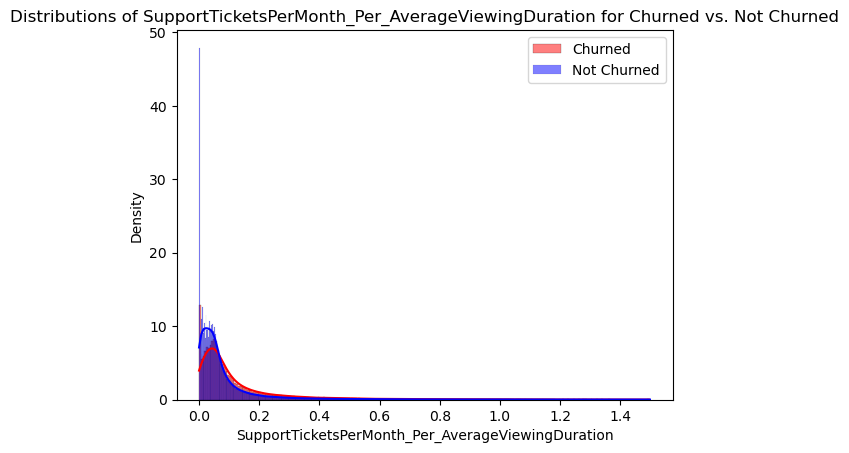

In [598]:
sns.histplot(churned_feature_values, kde=True, color='red', label='Churned', stat="density")
sns.histplot(non_churned_feature_values, kde=True, color='blue', label='Not Churned', stat="density")
plt.legend()
plt.xlabel('SupportTicketsPerMonth_Per_AverageViewingDuration')
plt.ylabel('Density')
plt.title('Distributions of SupportTicketsPerMonth_Per_AverageViewingDuration for Churned vs. Not Churned')
plt.show()

In [599]:
min_value_train = train_df['SupportTicketsPerMonth_Per_AverageViewingDuration'].min()
min_value_test = test_df['SupportTicketsPerMonth_Per_AverageViewingDuration'].min()
if min_value_train <= 0:
    shift = abs(min_value_train) + 1
    train_df['SupportTicketsPerMonth_Per_AverageViewingDuration_log'] = np.log(train_df['SupportTicketsPerMonth_Per_AverageViewingDuration'] + shift)
else:
    train_df['SupportTicketsPerMonth_Per_AverageViewingDuration_log'] = np.log(train_df['SupportTicketsPerMonth_Per_AverageViewingDuration'])

if min_value_test <= 0:
    shift = abs(min_value_test) + 1
    test_df['SupportTicketsPerMonth_Per_AverageViewingDuration_log'] = np.log(test_df['SupportTicketsPerMonth_Per_AverageViewingDuration'] + shift)
else:
    test_df['SupportTicketsPerMonth_Per_AverageViewingDuration_log'] = np.log(test_df['SupportTicketsPerMonth_Per_AverageViewingDuration'])

In [600]:
# Check how this new feature is correlated with churn
correlation = np.corrcoef(train_df['SupportTicketsPerMonth_Per_AverageViewingDuration_log'], train_df['Churn'])[0, 1]
print(f"Correlation with Churn: {correlation}")

Correlation with Churn: 0.132219259044884


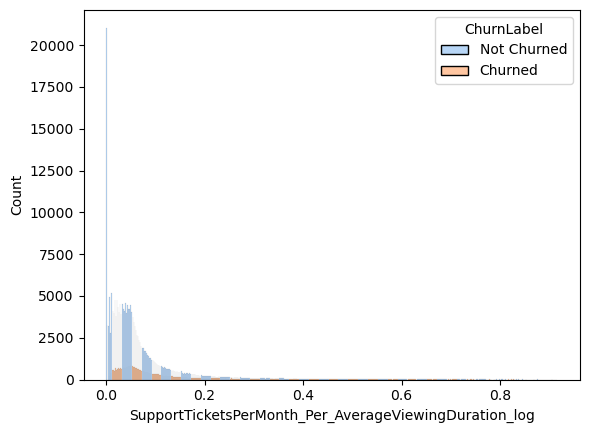

In [601]:
#Plot histplot to examine the monthly charges per account age of churned and not-churned users.
sns.histplot(data=train_df, x='SupportTicketsPerMonth_Per_AverageViewingDuration_log', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**Ordinal encode 'SubscriptionType'**

In [603]:
ordinal_encoder = OrdinalEncoder(categories=[['Basic', 'Standard', 'Premium']])

train_df['SubscriptionTypeEncoded'] = ordinal_encoder.fit_transform(train_df[['SubscriptionType']])
train_df['SubscriptionTypeEncoded'] = train_df['SubscriptionTypeEncoded'].astype('int32')
train_df = train_df.drop(columns=['SubscriptionType'])

test_df['SubscriptionTypeEncoded'] = ordinal_encoder.fit_transform(test_df[['SubscriptionType']])
test_df['SubscriptionTypeEncoded'] = test_df['SubscriptionTypeEncoded'].astype('int32')
test_df = test_df.drop(columns=['SubscriptionType'])

In [604]:
train_df['SubscriptionTypeEncoded'].value_counts().sort_index()


SubscriptionTypeEncoded
0    81050
1    81920
2    80817
Name: count, dtype: int64

**ChurnRiskSupport**

In [606]:
print(train_df.groupby(by='SupportTicketsPerMonth')['Churn'].value_counts(normalize=True))

def categorize_churn_risk(support_tickets):
    if support_tickets <= 2:
        return 0  # Low risk
    elif support_tickets <= 5:
        return 1  # Medium risk
    else:
        return 2  # High risk

# Apply the function to create the 'ChurnRisk' feature
train_df['ChurnRiskSupport'] = train_df['SupportTicketsPerMonth'].apply(categorize_churn_risk)
test_df['ChurnRiskSupport'] = test_df['SupportTicketsPerMonth'].apply(categorize_churn_risk)
print(train_df['ChurnRiskSupport'].value_counts().sort_index())


SupportTicketsPerMonth  Churn
0                       0        0.866417
                        1        0.133583
1                       0        0.854919
                        1        0.145081
2                       0        0.847980
                        1        0.152020
3                       0        0.838711
                        1        0.161289
4                       0        0.825453
                        1        0.174547
5                       0        0.817250
                        1        0.182750
6                       0        0.803959
                        1        0.196041
7                       0        0.793836
                        1        0.206164
8                       0        0.775615
                        1        0.224385
9                       0        0.764027
                        1        0.235973
Name: proportion, dtype: float64
ChurnRiskSupport
0    73052
1    72978
2    97757
Name: count, dtype: int64


In [607]:
train_df['ChurnRiskSupport'] = train_df['ChurnRiskSupport'] * train_df['SupportTicketsPerMonth']
test_df['ChurnRiskSupport'] = test_df['ChurnRiskSupport'] * test_df['SupportTicketsPerMonth']

**AccountAgeAvgViewingDuration** (dropped)

In [609]:
# Without interaction
X_simple = train_df[['AccountAge', 'AverageViewingDuration']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = train_df['AccountAge'] * train_df['AverageViewingDuration']
X_interaction = train_df[['AccountAge', 'AverageViewingDuration', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.441832
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.441817
         Iterations 6
ROC AUC without interaction: 0.6834393729072525
ROC AUC with interaction: 0.6834008507393292
Difference: -3.852216792332719e-05


ROC AUC scores with and without interaction between 'AccountAge' and 'AverageViewingDuration' are almost the same, so combining them as product won't bring any predictive power.

**AccountAgePerAvgViewingDuration** (dropped)

In [612]:
# Without interaction
X_simple = train_df[['AccountAge', 'AverageViewingDuration']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = train_df['AccountAge'] / train_df['AverageViewingDuration']
X_interaction = train_df[['AccountAge', 'AverageViewingDuration', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.441832
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.441832
         Iterations 6
ROC AUC without interaction: 0.6834393729072525
ROC AUC with interaction: 0.6834416778306682
Difference: 2.304923415685778e-06


ROC AUC scores with and without interaction between 'AccountAge' and 'AverageViewingDuration' are almost the same, so combining them as ratio won't bring any predictive power.

**AccountAgeViewingHoursPerMonth** (dropped)

In [615]:
# Without interaction
X_simple = train_df[['AccountAge', 'ViewingHoursPerWeek']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = train_df['AccountAge'] * 4 * train_df['ViewingHoursPerWeek']
X_interaction = train_df[['AccountAge', 'ViewingHoursPerWeek', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.444505
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.444494
         Iterations 6
ROC AUC without interaction: 0.6755669779079808
ROC AUC with interaction: 0.6755412717809948
Difference: -2.5706126986047018e-05


ROC AUC scores with and without interaction between 'AccountAge' and 'ViewingHoursPerWeek' are almost the same, so combining them as ratio won't bring any predictive power.

**AccountAgePerViewingHoursPerMonth** (dropped)

In [618]:
# Without interaction
X_simple = train_df[['AccountAge', 'ViewingHoursPerWeek']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = train_df['AccountAge'] / (4 * train_df['ViewingHoursPerWeek'])
X_interaction = train_df[['AccountAge', 'ViewingHoursPerWeek', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.444505
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.444505
         Iterations 6
ROC AUC without interaction: 0.6755669779079808
ROC AUC with interaction: 0.675567229638683
Difference: 2.517307021721038e-07


ROC AUC scores with and without interaction between 'AccountAge' and 'ViewingHoursPerWeek' are almost the same, so combining them as ratio won't bring any predictive power.

**AccountAgeContentDownloadsPerMonth** (dropped)

In [621]:
# Without interaction
X_simple = train_df[['AccountAge', 'ContentDownloadsPerMonth']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = train_df['AccountAge'] * train_df['ContentDownloadsPerMonth']
X_interaction = train_df[['AccountAge', 'ContentDownloadsPerMonth', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.444406
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.444388
         Iterations 6
ROC AUC without interaction: 0.6759109233493381
ROC AUC with interaction: 0.6758884898348723
Difference: -2.2433514465847182e-05


ROC AUC score is very slightly better (0.0001) without interaction, so I will drop this product feature

**AccountAgePerContentDownloadsPerMonth** (dropped)

In [624]:
# Without interaction
X_simple = train_df[['AccountAge', 'ContentDownloadsPerMonth']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = np.where(train_df['ContentDownloadsPerMonth']==0, 0, train_df['AccountAge'] / train_df['ContentDownloadsPerMonth'])
X_interaction = train_df[['AccountAge', 'ContentDownloadsPerMonth', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.444406
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.444404
         Iterations 6
ROC AUC without interaction: 0.6759109233493381
ROC AUC with interaction: 0.6759166042989677
Difference: 5.680949629605081e-06


ROC AUC scores with and without interaction between 'AccountAge' and 'ContentDownloadsPerMonth' are almost the same, so combining them as ratio won't bring any predictive power.

**AccountAgeMonthlyCharges** (dropped)

In [627]:
# Without interaction
X_simple = train_df[['AccountAge', 'MonthlyCharges']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = train_df['AccountAge'] * train_df['MonthlyCharges']
X_interaction = train_df[['AccountAge', 'MonthlyCharges', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.447934
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.447926
         Iterations 6
ROC AUC without interaction: 0.6657171113573997
ROC AUC with interaction: 0.6656964718210594
Difference: -2.0639536340349984e-05


ROC AUC scores with and without interaction between 'AccountAge' and 'MonthlyCharges' are almost the same (difference 0.0001), so combining them as product won't bring any predictive power.

**AccountAgePerMonthlyCharges** (dropped)

In [630]:
# Without interaction
X_simple = train_df[['AccountAge', 'MonthlyCharges']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = np.where(train_df['MonthlyCharges']==0, 0, train_df['AccountAge'] / train_df['MonthlyCharges'])
X_interaction = train_df[['AccountAge', 'MonthlyCharges', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.447934
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.447928
         Iterations 6
ROC AUC without interaction: 0.6657171113573997
ROC AUC with interaction: 0.6657040512964306
Difference: -1.3060060969127818e-05


ROC AUC scores with and without interaction between 'AccountAge' and 'MonthlyCharges' are almost the same (difference 0.0001), so combining them as ratio won't bring any predictive power.

**AccountAgeSupportTicketsPerMonth** (dropped)

In [633]:
# Without interaction
X_simple = train_df[['AccountAge', 'SupportTicketsPerMonth']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
#train_df['Interaction'] = np.where(train_df['MonthlyCharges']==0, 0, train_df['AccountAge'] / train_df['MonthlyCharges'])
train_df['Interaction'] = train_df['AccountAge'] * train_df['SupportTicketsPerMonth']
X_interaction = train_df[['AccountAge', 'SupportTicketsPerMonth', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.449599
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.449596
         Iterations 6
ROC AUC without interaction: 0.6602845829648498
ROC AUC with interaction: 0.6602698390295892
Difference: -1.4743935260574936e-05


ROC AUC scores with and without interaction between 'AccountAge' and 'SupportTicketsPerMonth' are almost the same (difference 0.00001), so combining them as product won't bring any predictive power.

**AccountAgePerSupportTicketsPerMonth** (dropped)

In [636]:
# Without interaction
X_simple = train_df[['AccountAge', 'SupportTicketsPerMonth']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = np.where(train_df['SupportTicketsPerMonth']==0, 0, train_df['AccountAge'] / train_df['SupportTicketsPerMonth'])
X_interaction = train_df[['AccountAge', 'SupportTicketsPerMonth', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.449599
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.449598
         Iterations 6
ROC AUC without interaction: 0.6602845829648498
ROC AUC with interaction: 0.6602942772049035
Difference: 9.694240053703673e-06


ROC AUC scores with and without interaction between 'AccountAge' and 'SupportTicketsPerMonth' are almost the same (difference 0.00001), so combining them as ratio won't bring any predictive power.

**AccountAgeTotalCharges**

In [639]:
# Without interaction
X_simple = train_df[['AccountAge', 'TotalCharges']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = train_df['AccountAge'] * train_df['TotalCharges']
test_df['Interaction'] = test_df['AccountAge'] * test_df['TotalCharges']

X_interaction = train_df[['AccountAge', 'TotalCharges', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.449391
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.449075
         Iterations 6
ROC AUC without interaction: 0.6615908621101978
ROC AUC with interaction: 0.6638195935592142
Difference: 0.0022287314490163634


ROC AUC scores with and without interaction between 'AccountAge' and 'TotalCharges' are slightly different (difference 0.002), so I'll combine them as a product to check for some predictive power.

In [641]:
train_df['AccountAgeTotalCharges'] = train_df['Interaction'].copy()
test_df['AccountAgeTotalCharges'] = test_df['Interaction'].copy()

**AccountAgePerTotalCharges**

In [643]:
# Without interaction
X_simple = train_df[['AccountAge', 'TotalCharges']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = np.where(train_df['TotalCharges']==0, 0, train_df['AccountAge'] / train_df['TotalCharges'])
test_df['Interaction'] = np.where(test_df['TotalCharges']==0, 0, test_df['AccountAge'] / test_df['TotalCharges'])

X_interaction = train_df[['AccountAge', 'TotalCharges', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.449391
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.448322
         Iterations 6
ROC AUC without interaction: 0.6615908621101978
ROC AUC with interaction: 0.6647240271606496
Difference: 0.0031331650504518027


ROC AUC scores with and without interaction between 'AccountAge' and 'TotalCharges' are slightly different (difference 0.003), so combining them as ratio maybe will bring some predictive power.

In [645]:
train_df['AccountAgePerTotalCharges'] = train_df['Interaction'].copy()
test_df['AccountAgePerTotalCharges'] = test_df['Interaction'].copy()

ROC_AUC score with interaction is better for 0.04 than ROC_AUC score without interaction, so I'll include 'AvgMonthlyCharges' in the model. 

**LoyalUser**

In [648]:
# Let's create new feature 'LoyalUser' for users with 'AccountAge' of 80+ months.
train_df['LoyalUser'] = np.where((train_df['AccountAge'] >= 80), 1, 0)
test_df['LoyalUser'] = np.where((test_df['AccountAge'] >= 80), 1, 0)

# Let's check the distribution of 'LoyalUser' among not-churned and churned users.
train_df.groupby(by=['LoyalUser'])['Churn'].value_counts(normalize=True)*100

LoyalUser  Churn
0          0        77.659897
           1        22.340103
1          0        90.161741
           1         9.838259
Name: proportion, dtype: float64

Churn rate among non-loyal users is far bigger than churn rate among loyal users. So, the loyalty of a user could bring a predictive power.

**AvgViewingDurationViewingHoursPerMonth** (dropped)

In [651]:
# Without interaction
X_simple = train_df[['AverageViewingDuration', 'ViewingHoursPerWeek']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = train_df['AverageViewingDuration'] * train_df['ViewingHoursPerWeek'] * 4
X_interaction = train_df[['AverageViewingDuration', 'ViewingHoursPerWeek', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.453809
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.453780
         Iterations 6
ROC AUC without interaction: 0.6447676415685362
ROC AUC with interaction: 0.6446933126358989
Difference: -7.43289326372576e-05


ROC AUC scores with and without interaction between 'AverageViewingDuration' and 'ViewingHoursPerWeek' are slightly different (difference 0.0001), so combining them as product won't bring any predictive power.

**AvgViewingDurationPerViewingHoursPerMonth** (dropped)

In [654]:
# Without interaction
X_simple = train_df[['AverageViewingDuration', 'ViewingHoursPerWeek']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = train_df['AverageViewingDuration'] / (train_df['ViewingHoursPerWeek'] * 4)
X_interaction = train_df[['AverageViewingDuration', 'ViewingHoursPerWeek', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.453809
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.453807
         Iterations 6
ROC AUC without interaction: 0.6447676415685362
ROC AUC with interaction: 0.6447635936934887
Difference: -4.047875047485938e-06


ROC AUC scores with and without interaction between 'AverageViewingDuration' and 'ViewingHoursPerWeek' are almost the same, so combining them as ratio won't bring any predictive power.

**AvgViewingDurationContentDownloadsPerMonth** (dropped)

In [657]:
# Without interaction
X_simple = train_df[['AverageViewingDuration', 'ContentDownloadsPerMonth']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = train_df['AverageViewingDuration'] * train_df['ContentDownloadsPerMonth']
X_interaction = train_df[['AverageViewingDuration', 'ContentDownloadsPerMonth', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.453585
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.453560
         Iterations 6
ROC AUC without interaction: 0.6459935664594811
ROC AUC with interaction: 0.6459479141895076
Difference: -4.565226997355065e-05


ROC AUC scores with and without interaction between 'AverageViewingDuration' and 'ContentDownloadsPerMonth' are almost the same, so combining them as product won't bring any predictive power.

**AvgViewingDurationPerContentDownloadsPerMonth** (dropped)

In [660]:
# Without interaction
X_simple = train_df[['AverageViewingDuration', 'ContentDownloadsPerMonth']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = np.where(train_df['ContentDownloadsPerMonth']==0, 0, train_df['AverageViewingDuration'] / train_df['ContentDownloadsPerMonth'])
X_interaction = train_df[['AverageViewingDuration', 'ContentDownloadsPerMonth', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.453585
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.453585
         Iterations 6
ROC AUC without interaction: 0.6459935664594811
ROC AUC with interaction: 0.6459935682737564
Difference: 1.8142752855609956e-09


ROC AUC scores with and without interaction between 'AverageViewingDuration' and 'ContentDownloadsPerMonth' are almost the same, so combining them as ratio won't bring any predictive power.

**AvgViewingDurationMonthlyCharges** (dropped)

In [663]:
# Without interaction
X_simple = train_df[['AverageViewingDuration', 'MonthlyCharges']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = train_df['AverageViewingDuration'] * train_df['MonthlyCharges']
#train_df['Interaction'] = np.where(train_df['ContentDownloadsPerMonth']==0, 0, train_df['AverageViewingDuration'] / train_df['ContentDownloadsPerMonth'])
X_interaction = train_df[['AverageViewingDuration', 'MonthlyCharges', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.457146
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.457144
         Iterations 6
ROC AUC without interaction: 0.6323503063450954
ROC AUC with interaction: 0.6323224387358369
Difference: -2.7867609258436232e-05


ROC AUC scores with and without interaction between 'AverageViewingDuration' and 'MonthlyCharges' are almost the same, so combining them as product won't bring any predictive power.

**AvgViewingDurationPerMonthlyCharges** (dropped)

In [666]:
# Without interaction
X_simple = train_df[['AverageViewingDuration', 'MonthlyCharges']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = np.where(train_df['MonthlyCharges']==0, 0, train_df['AverageViewingDuration'] / train_df['MonthlyCharges'])
X_interaction = train_df[['AverageViewingDuration', 'MonthlyCharges', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.457146
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.457143
         Iterations 6
ROC AUC without interaction: 0.6323503063450954
ROC AUC with interaction: 0.6323272394217545
Difference: -2.3066923340864243e-05


ROC AUC scores with and without interaction between 'AverageViewingDuration' and 'MonthlyCharges' are almost the same, so combining them as ratio won't bring any predictive power.

**AvgViewingDurationSupportTicketsPerMonth** (dropped)

In [669]:
# Without interaction
X_simple = train_df[['AverageViewingDuration', 'SupportTicketsPerMonth']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
#train_df['Interaction'] = np.where(train_df['MonthlyCharges']==0, 0, train_df['AverageViewingDuration'] / train_df['MonthlyCharges'])
train_df['Interaction'] = train_df['AverageViewingDuration'] * train_df['SupportTicketsPerMonth']
X_interaction = train_df[['AverageViewingDuration', 'SupportTicketsPerMonth', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.458695
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.458691
         Iterations 6
ROC AUC without interaction: 0.6260260793166181
ROC AUC with interaction: 0.6260036201755133
Difference: -2.245914110488023e-05


ROC AUC scores with and without interaction between 'AverageViewingDuration' and 'SupportTicketsPerMonth' are almost the same, so combining them as product won't bring any predictive power.

**AvgViewingDurationPerSupportTicketsPerMonth** (dropped)

In [672]:
# Without interaction
X_simple = train_df[['AverageViewingDuration', 'SupportTicketsPerMonth']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = np.where(train_df['SupportTicketsPerMonth']==0, 0, train_df['AverageViewingDuration'] / train_df['SupportTicketsPerMonth'])
#train_df['Interaction'] = train_df['AverageViewingDuration'] * train_df['SupportTicketsPerMonth']
X_interaction = train_df[['AverageViewingDuration', 'SupportTicketsPerMonth', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.458695
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.458695
         Iterations 6
ROC AUC without interaction: 0.6260260793166181
ROC AUC with interaction: 0.6260228111263941
Difference: -3.2681902240039307e-06


ROC AUC scores with and without interaction between 'AverageViewingDuration' and 'SupportTicketsPerMonth' are almost the same, so combining them as ratio won't bring any predictive power.

**AvgViewingDurationTotalCharges** (dropped)

In [675]:
# Without interaction
X_simple = train_df[['AverageViewingDuration', 'TotalCharges']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
#train_df['Interaction'] = np.where(train_df['SupportTicketsPerMonth']==0, 0, train_df['AverageViewingDuration'] / train_df['SupportTicketsPerMonth'])
train_df['Interaction'] = train_df['AverageViewingDuration'] * train_df['TotalCharges']
X_interaction = train_df[['AverageViewingDuration', 'TotalCharges', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.454456
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.454429
         Iterations 6
ROC AUC without interaction: 0.642613051501445
ROC AUC with interaction: 0.6430986976291438
Difference: 0.00048564612769885773


ROC AUC scores with and without interaction between 'AverageViewingDuration' and 'TotalCharges' are almost the same, so combining them as product won't bring any predictive power.

**AvgViewingDurationPerTotalCharges** (dropped)

In [678]:
# Without interaction
X_simple = train_df[['AverageViewingDuration', 'TotalCharges']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = np.where(train_df['TotalCharges']==0, 0, train_df['AverageViewingDuration'] / train_df['TotalCharges'])
#train_df['Interaction'] = train_df['AverageViewingDuration'] * train_df['TotalCharges']
X_interaction = train_df[['AverageViewingDuration', 'TotalCharges', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.454456
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.454298
         Iterations 6
ROC AUC without interaction: 0.642613051501445
ROC AUC with interaction: 0.6432148273520116
Difference: 0.0006017758505666437


ROC AUC scores with and without interaction between 'AverageViewingDuration' and 'TotalCharges' are almost the same, so combining them as ratio won't bring any predictive power.

**ViewingHoursContentDownloadsPerMonth**

In [681]:
# Without interaction
X_simple = train_df[['ViewingHoursPerWeek', 'ContentDownloadsPerMonth']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
#train_df['Interaction'] = np.where(train_df['TotalCharges']==0, 0, train_df['AverageViewingDuration'] / train_df['TotalCharges'])
train_df['Interaction'] = train_df['ViewingHoursPerWeek'] * 4 * train_df['ContentDownloadsPerMonth']
test_df['Interaction'] = test_df['ViewingHoursPerWeek'] * 4 * test_df['ContentDownloadsPerMonth']

X_interaction = train_df[['AverageViewingDuration', 'ContentDownloadsPerMonth', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.456295
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.447336
         Iterations 6
ROC AUC without interaction: 0.6354504156391958
ROC AUC with interaction: 0.6665326502300964
Difference: 0.031082234590900648


ROC AUC score with interaction between 'ViewingHoursPerWeek' and 'ContentDownloadsPerMonth' is 0.031 bigger than without interaction, so combining them as product could bring a predictive power.

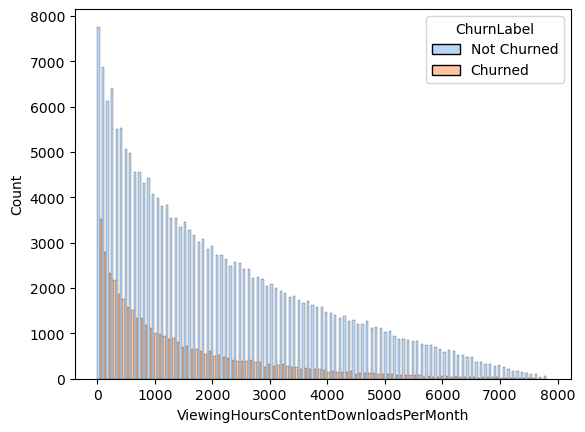

In [683]:
train_df['ViewingHoursContentDownloadsPerMonth'] = train_df['ViewingHoursPerWeek'] * 4 * train_df['ContentDownloadsPerMonth'] 
test_df['ViewingHoursContentDownloadsPerMonth'] = test_df['ViewingHoursPerWeek'] * 4 * test_df['ContentDownloadsPerMonth']

sns.histplot(data=train_df, x='ViewingHoursContentDownloadsPerMonth', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

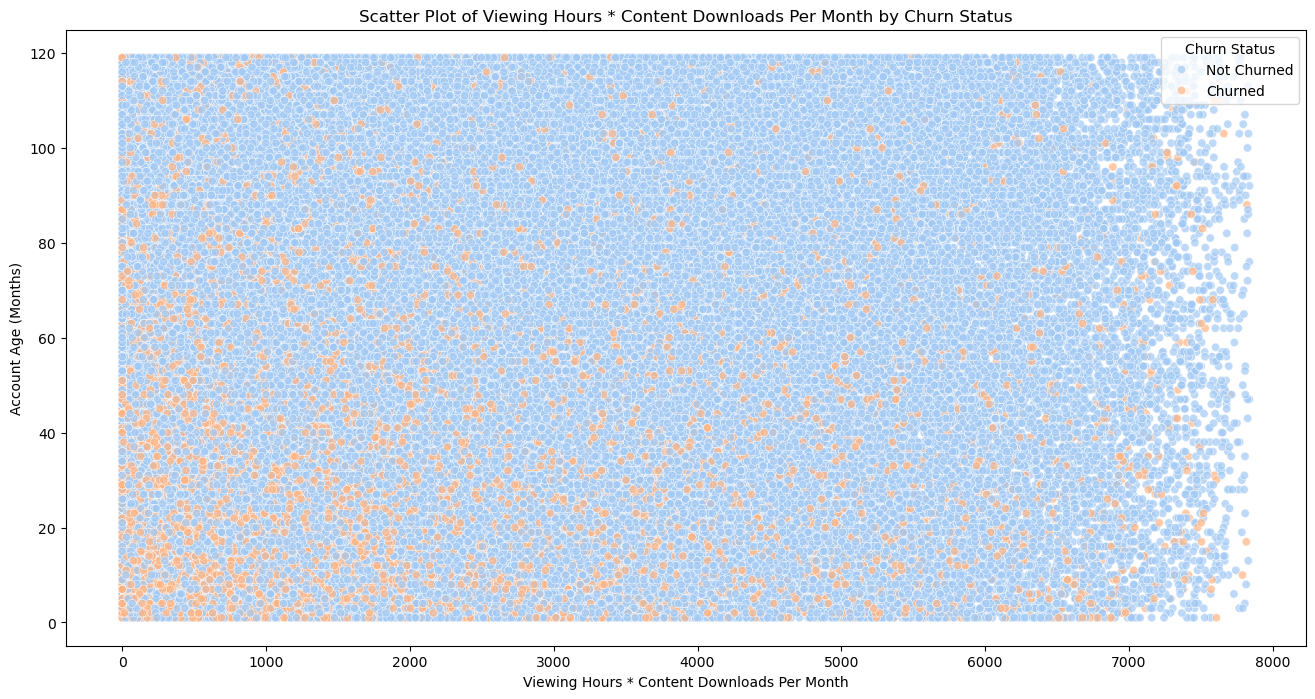

In [684]:
plt.figure(figsize=(16, 8))

sns.scatterplot(data=train_df, 
                x='ViewingHoursContentDownloadsPerMonth', 
                y='AccountAge',  # You can choose another feature for the y-axis if desired
                hue='ChurnLabel', 
                hue_order=['Not Churned', 'Churned'], 
                palette='pastel', 
                alpha=0.7)  # Adjust alpha for better visibility

plt.legend(loc="upper right")

plt.title('Scatter Plot of Viewing Hours * Content Downloads Per Month by Churn Status')
plt.xlabel('Viewing Hours * Content Downloads Per Month')
plt.ylabel('Account Age (Months)')
plt.legend(title='Churn Status', loc='upper right')
plt.show()

In [685]:
# Define bins and labels based on the observed distribution
bins = [0, 220, 500, 850, 1270, 1800, 2450, 3300, 4500, 8000]
labels = ['0-220', '220-500', '500-850', '850-1270', '1270-1800', '1800-2450', '2450-3300', '3300-4500', '4500-8000']

# Create the new binned feature
train_df['ViewingHoursContentDownloadsPerMonth_bin'] = pd.cut(
    train_df['ViewingHoursContentDownloadsPerMonth'], 
    bins=bins, 
    labels=labels, 
    right=False  # Makes the intervals left-inclusive, so 0-500 includes 0 but not 500
)

test_df['ViewingHoursContentDownloadsPerMonth_bin'] = pd.cut(
    test_df['ViewingHoursContentDownloadsPerMonth'], 
    bins=bins, 
    labels=labels, 
    right=False  # Makes the intervals left-inclusive, so 0-500 includes 0 but not 500
)

# Create an ordinal encoding dictionary for the bins
bin_mapping = {
    '0-220': 1,
    '220-500': 2,
    '500-850': 3,
    '850-1270': 4,
    '1270-1800': 5,
    '1800-2450': 6,
    '2450-3300': 7,
    '3300-4500': 8,
    '4500-8000': 9
}

# Apply the mapping to create an encoded column
train_df['ViewingHoursContentDownloadsPerMonth_bin_encoded'] = train_df['ViewingHoursContentDownloadsPerMonth_bin'].map(bin_mapping)
test_df['ViewingHoursContentDownloadsPerMonth_bin_encoded'] = test_df['ViewingHoursContentDownloadsPerMonth_bin'].map(bin_mapping)

train_df['ViewingHoursContentDownloadsPerMonth_bin_encoded'] = train_df['ViewingHoursContentDownloadsPerMonth_bin_encoded'].astype('int32')
test_df['ViewingHoursContentDownloadsPerMonth_bin_encoded'] = test_df['ViewingHoursContentDownloadsPerMonth_bin_encoded'].astype('int32')

print(train_df['ViewingHoursContentDownloadsPerMonth_bin_encoded'].value_counts().sort_index())
print(test_df['ViewingHoursContentDownloadsPerMonth_bin_encoded'].value_counts().sort_index())

# Check the churn rate among bins
train_df.groupby('ViewingHoursContentDownloadsPerMonth_bin', observed=False)['Churn'].value_counts(normalize=True)

ViewingHoursContentDownloadsPerMonth_bin_encoded
1    27563
2    27334
3    26811
4    26725
5    27274
6    26838
7    27196
8    26410
9    27636
Name: count, dtype: int64
ViewingHoursContentDownloadsPerMonth_bin_encoded
1    12101
2    11580
3    11677
4    11334
5    11598
6    11413
7    11595
8    11554
9    11628
Name: count, dtype: int64


ViewingHoursContentDownloadsPerMonth_bin  Churn
0-220                                     0        0.704241
                                          1        0.295759
220-500                                   0        0.749213
                                          1        0.250787
500-850                                   0        0.772220
                                          1        0.227780
850-1270                                  0        0.801646
                                          1        0.198354
1270-1800                                 0        0.821552
                                          1        0.178448
1800-2450                                 0        0.846896
                                          1        0.153104
2450-3300                                 0        0.866267
                                          1        0.133733
3300-4500                                 0        0.889209
                                          1        0

In [686]:
train_df = train_df.drop(columns=['ViewingHoursContentDownloadsPerMonth', 'ViewingHoursContentDownloadsPerMonth_bin'])
test_df = test_df.drop(columns=['ViewingHoursContentDownloadsPerMonth', 'ViewingHoursContentDownloadsPerMonth_bin'])

**ViewingHoursPerContentDownloadsPerMonth** (dropped)

In [688]:
# Without interaction
X_simple = train_df[['ViewingHoursPerWeek', 'ContentDownloadsPerMonth']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = np.where(train_df['ContentDownloadsPerMonth']==0, 0, (train_df['ViewingHoursPerWeek'] * 4) / train_df['ContentDownloadsPerMonth'])
#train_df['Interaction'] = train_df['ViewingHoursPerWeek'] * 4 * train_df['ContentDownloadsPerMonth']
X_interaction = train_df[['ViewingHoursPerWeek', 'ContentDownloadsPerMonth', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.456295
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.456295
         Iterations 6
ROC AUC without interaction: 0.6354504156391958
ROC AUC with interaction: 0.6354515195123424
Difference: 1.1038731465573548e-06


ROC AUC scores with and without interaction between 'ViewingHoursPerWeek' and 'ContentDownloadsPerMonth' are almost the same, so combining them as ratio won't bring any predictive power.

**ViewingHoursMonthlyCharges** (dropped)

In [691]:
# Without interaction
X_simple = train_df[['ViewingHoursPerWeek', 'MonthlyCharges']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
#train_df['Interaction'] = np.where(train_df['ContentDownloadsPerMonth']==0, 0, (train_df['ViewingHoursPerWeek'] * 4) / train_df['ContentDownloadsPerMonth'])
train_df['Interaction'] = train_df['ViewingHoursPerWeek'] * 4 * train_df['MonthlyCharges']
X_interaction = train_df[['ViewingHoursPerWeek', 'MonthlyCharges', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.459776
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.459776
         Iterations 6
ROC AUC without interaction: 0.6210319512810922
ROC AUC with interaction: 0.6210291692032646
Difference: -2.782077827667706e-06


ROC AUC scores with and without interaction between 'ViewingHoursPerWeek' and 'MonthlyCharges' are almost the same, so combining them as product won't bring any predictive power.

In [693]:
#train_df['ViewingHoursMonthlyCharges'] = train_df['ViewingHoursPerWeek'] * 4 * train_df['MonthlyCharges'] 
#test_df['ViewingHoursMonthlyCharges'] = test_df['ViewingHoursPerWeek'] * 4 * test_df['MonthlyCharges']

#sns.histplot(data=train_df, x='ViewingHoursMonthlyCharges', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
#plt.show()

**ViewingHours_Per_MonthlyCharges**

In [695]:
train_df['ViewingHours_Per_MonthlyCharges'] = train_df['ViewingHoursPerWeek'] * 4 / (train_df['MonthlyCharges'] + 1)
test_df['ViewingHours_Per_MonthlyCharges'] = test_df['ViewingHoursPerWeek'] * 4 / (test_df['MonthlyCharges'] + 1)

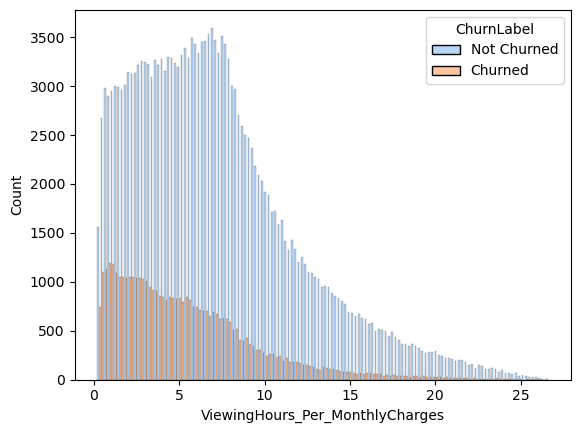

In [696]:
#Plot histplot to examine the monthly charges per account age of churned and not-churned users.
sns.histplot(data=train_df, x='ViewingHours_Per_MonthlyCharges', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

Minimum value of ViewingHours_Per_MonthlyCharges: 0.19251010721043973


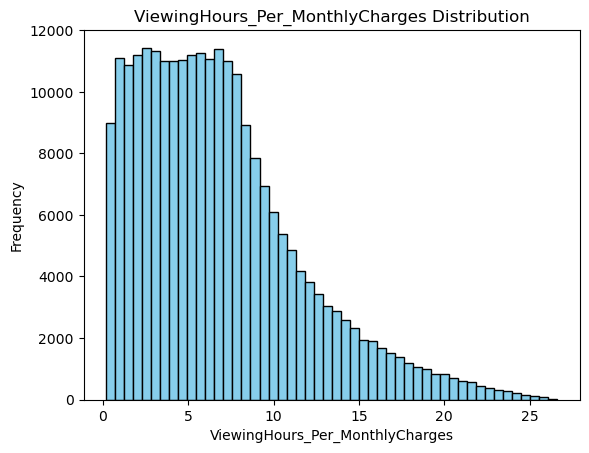

In [697]:
# Check for negative or zero values
print(f"Minimum value of ViewingHours_Per_MonthlyCharges: {train_df['ViewingHours_Per_MonthlyCharges'].min()}")

# Plot the histogram
plt.hist(train_df['ViewingHours_Per_MonthlyCharges'], bins=50, color='skyblue', edgecolor='black')
plt.title("ViewingHours_Per_MonthlyCharges Distribution")
plt.xlabel("ViewingHours_Per_MonthlyCharges")
plt.ylabel("Frequency")
plt.show()

In [698]:
# Check how this new feature is correlated with churn
correlation = np.corrcoef(train_df['ViewingHours_Per_MonthlyCharges'], train_df['Churn'])[0, 1]
print(f"Correlation with Churn: {correlation}")

Correlation with Churn: -0.14575281602167434


In [699]:
train_df['ViewingHours_Per_MonthlyCharges_log'] = np.log(train_df['ViewingHours_Per_MonthlyCharges'])
test_df['ViewingHours_Per_MonthlyCharges_log'] = np.log(test_df['ViewingHours_Per_MonthlyCharges'])

In [700]:
# Check how this new feature is correlated with churn
correlation = np.corrcoef(train_df['ViewingHours_Per_MonthlyCharges_log'], train_df['Churn'])[0, 1]
print(f"Correlation with Churn: {correlation}")

Correlation with Churn: -0.1514116906083561


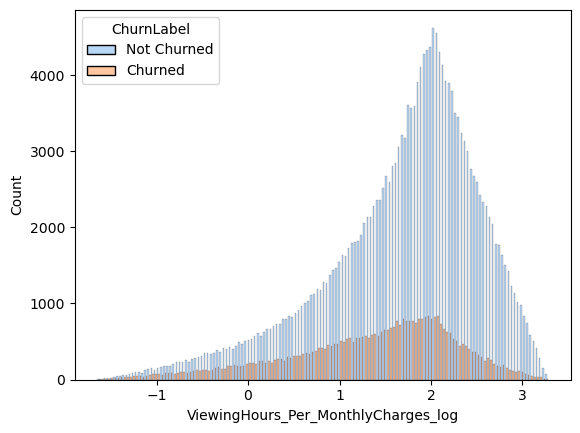

In [701]:
#Plot histplot to examine the monthly charges per account age of churned and not-churned users.
sns.histplot(data=train_df, x='ViewingHours_Per_MonthlyCharges_log', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

In [702]:
from scipy.stats import ks_2samp

churned_feature_values = train_df[train_df['Churn'] == 1]['ViewingHours_Per_MonthlyCharges_log'].values
non_churned_feature_values = train_df[train_df['Churn'] == 0]['ViewingHours_Per_MonthlyCharges_log'].values

print("Churned Feature Values:", churned_feature_values[:10])  # Display first 10 for reference
print("Non-Churned Feature Values:", non_churned_feature_values[:10])  # Display first 10 for reference

ks_stat, p_value = ks_2samp(
    churned_feature_values,
    non_churned_feature_values
)
print("KS Statistic:", ks_stat, "P-value:", p_value)

Churned Feature Values: [ 0.45567726  2.31650163 -1.46590466  1.6587338   1.89853198  0.26484521
  1.40384038 -0.87953283 -0.04922938  1.8513979 ]
Non-Churned Feature Values: [2.50115572 3.04546966 0.81399985 2.60520555 1.49842628 2.34686305
 2.39313856 2.07096173 2.05067985 1.29529092]
KS Statistic: 0.1744269179059723 P-value: 0.0


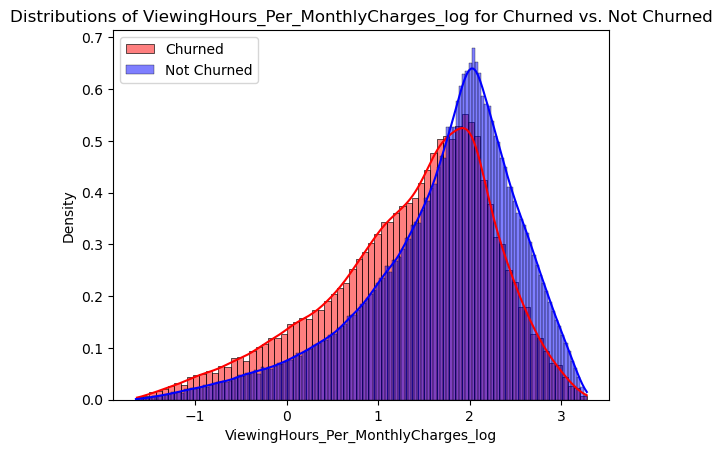

In [703]:
sns.histplot(churned_feature_values, kde=True, color='red', label='Churned', stat="density")
sns.histplot(non_churned_feature_values, kde=True, color='blue', label='Not Churned', stat="density")
plt.legend()
plt.xlabel('ViewingHours_Per_MonthlyCharges_log')
plt.ylabel('Density')
plt.title('Distributions of ViewingHours_Per_MonthlyCharges_log for Churned vs. Not Churned')
plt.show()

**ViewingHours_Per_SupportTicketsPerMonth**

In [705]:
train_df['ViewingHours_Per_SupportTicketsPerMonth'] = train_df['ViewingHoursPerWeek'] * 4 / (train_df['SupportTicketsPerMonth'] + 1)
test_df['ViewingHours_Per_SupportTicketsPerMonth'] = test_df['ViewingHoursPerWeek'] * 4 / (test_df['SupportTicketsPerMonth'] + 1)

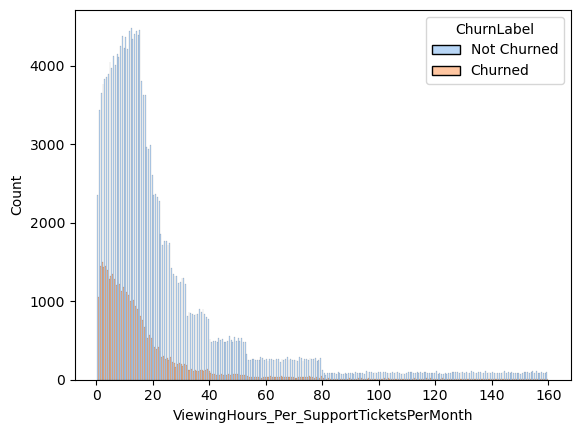

In [706]:
#Plot histplot to examine the monthly charges per account age of churned and not-churned users.
sns.histplot(data=train_df, x='ViewingHours_Per_SupportTicketsPerMonth', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

Minimum value of ViewingHours_Per_SupportTicketsPerMonth: 0.4000533172020086


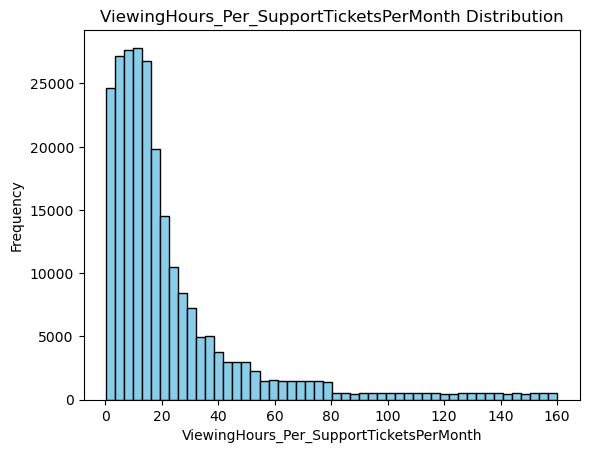

In [707]:
# Check for negative or zero values
print(f"Minimum value of ViewingHours_Per_SupportTicketsPerMonth: {train_df['ViewingHours_Per_SupportTicketsPerMonth'].min()}")

# Plot the histogram
plt.hist(train_df['ViewingHours_Per_SupportTicketsPerMonth'], bins=50, color='skyblue', edgecolor='black')
plt.title("ViewingHours_Per_SupportTicketsPerMonth Distribution")
plt.xlabel("ViewingHours_Per_SupportTicketsPerMonth")
plt.ylabel("Frequency")
plt.show()

In [708]:
# Check how this new feature is correlated with churn
correlation = np.corrcoef(train_df['ViewingHours_Per_SupportTicketsPerMonth'], train_df['Churn'])[0, 1]
print(f"Correlation with Churn: {correlation}")

Correlation with Churn: -0.10673434381936107


In [709]:
train_df['ViewingHours_Per_SupportTicketsPerMonth_log'] = np.log(train_df['ViewingHours_Per_SupportTicketsPerMonth'])
test_df['ViewingHours_Per_SupportTicketsPerMonth_log'] = np.log(test_df['ViewingHours_Per_SupportTicketsPerMonth'])

In [710]:
# Check how this new feature is correlated with churn
correlation = np.corrcoef(train_df['ViewingHours_Per_SupportTicketsPerMonth_log'], train_df['Churn'])[0, 1]
print(f"Correlation with Churn: {correlation}")

Correlation with Churn: -0.14375935593640765


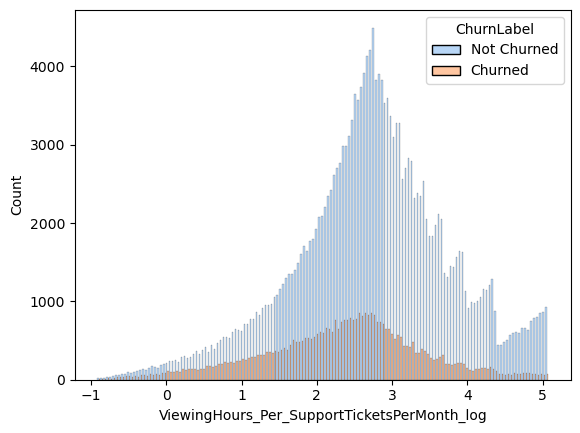

In [711]:
#Plot histplot to examine the monthly charges per account age of churned and not-churned users.
sns.histplot(data=train_df, x='ViewingHours_Per_SupportTicketsPerMonth_log', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

In [712]:
from scipy.stats import ks_2samp

churned_feature_values = train_df[train_df['Churn'] == 1]['ViewingHours_Per_SupportTicketsPerMonth'].values
non_churned_feature_values = train_df[train_df['Churn'] == 0]['ViewingHours_Per_SupportTicketsPerMonth'].values

print("Churned Feature Values:", churned_feature_values[:10])  # Display first 10 for reference
print("Non-Churned Feature Values:", non_churned_feature_values[:10])  # Display first 10 for reference

ks_stat, p_value = ks_2samp(
    churned_feature_values,
    non_churned_feature_values
)
print("KS Statistic:", ks_stat, "P-value:", p_value)

Churned Feature Values: [ 32.81171631 101.98959437   0.73359543  14.17331382  39.51753211
   2.34285857   4.11816454   1.52346969   3.77381196  13.20640129]
Non-Churned Feature Values: [ 29.40648313  14.42247459   4.22580578  37.28051826  16.06671789
   9.63479563  14.60510435  21.8077551  154.24277691  35.28551071]
KS Statistic: 0.16386685407087626 P-value: 0.0


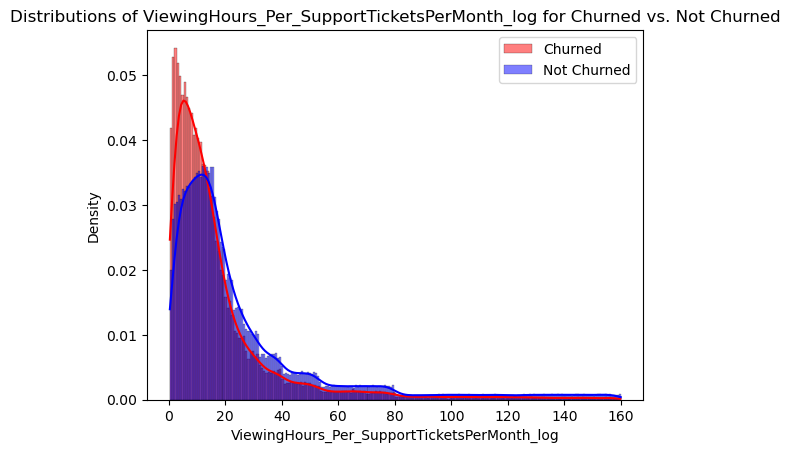

In [713]:
sns.histplot(churned_feature_values, kde=True, color='red', label='Churned', stat="density")
sns.histplot(non_churned_feature_values, kde=True, color='blue', label='Not Churned', stat="density")
plt.legend()
plt.xlabel('ViewingHours_Per_SupportTicketsPerMonth_log')
plt.ylabel('Density')
plt.title('Distributions of ViewingHours_Per_SupportTicketsPerMonth_log for Churned vs. Not Churned')
plt.show()

**ViewingHoursPerSupportTicketsPerMonth** (dropped)

In [715]:
# Without interaction
X_simple = train_df[['ViewingHoursPerWeek', 'SupportTicketsPerMonth']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = np.where(train_df['SupportTicketsPerMonth']==0, 0, (train_df['ViewingHoursPerWeek'] * 4) / train_df['SupportTicketsPerMonth'])
#train_df['Interaction'] = train_df['ViewingHoursPerWeek'] * 4 * train_df['SupportTicketsPerMonth']
X_interaction = train_df[['ViewingHoursPerWeek', 'SupportTicketsPerMonth', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.461281
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.461281
         Iterations 6
ROC AUC without interaction: 0.6142137475395578
ROC AUC with interaction: 0.6142099716924176
Difference: -3.7758471401749816e-06


ROC AUC scores with and without interaction between 'ViewingHoursPerWeek' and 'SupportTicketsPerMonth' are almost the same, so combining them as ratio won't bring any predictive power.

**ViewingHoursPerMonthTotalCharges** (dropped)

In [718]:
# Without interaction
X_simple = train_df[['ViewingHoursPerWeek', 'TotalCharges']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
#train_df['Interaction'] = np.where(train_df['MonthlyCharges']==0, 0, (train_df['ViewingHoursPerWeek'] * 4) / train_df['MonthlyCharges'])
train_df['Interaction'] = train_df['ViewingHoursPerWeek'] * 4 * train_df['TotalCharges']
X_interaction = train_df[['ViewingHoursPerWeek', 'TotalCharges', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.457028
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.457002
         Iterations 6
ROC AUC without interaction: 0.6323514262065434
ROC AUC with interaction: 0.6329376530371716
Difference: 0.0005862268306282559


ROC AUC scores with and without interaction between 'ViewingHoursPerWeek' and 'TotalCharges' are almost the same, so combining them as product won't bring any predictive power.

**ViewingHoursPerMonthPerTotalCharges** (dropped)

In [721]:
# Without interaction
X_simple = train_df[['ViewingHoursPerWeek', 'TotalCharges']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = np.where(train_df['TotalCharges']==0, 0, (train_df['ViewingHoursPerWeek'] * 4) / train_df['TotalCharges'])
#train_df['Interaction'] = train_df['ViewingHoursPerWeek'] * 4 * train_df['TotalCharges']
X_interaction = train_df[['ViewingHoursPerWeek', 'TotalCharges', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.457028
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.456853
         Iterations 6
ROC AUC without interaction: 0.6323514262065434
ROC AUC with interaction: 0.6331969840788643
Difference: 0.000845557872320879


ROC AUC scores with and without interaction between 'ViewingHoursPerWeek' and 'TotalCharges' are almost the same, so combining them as ratio won't bring any predictive power.

**ContentDownloads_Per_MonthlyCharges**

In [724]:
train_df['ContentDownloads_Per_MonthlyCharges'] = train_df['ContentDownloadsPerMonth'] / (train_df['MonthlyCharges'] + 1)
test_df['ContentDownloads_Per_MonthlyCharges'] = test_df['ContentDownloadsPerMonth'] / (test_df['MonthlyCharges'] + 1)

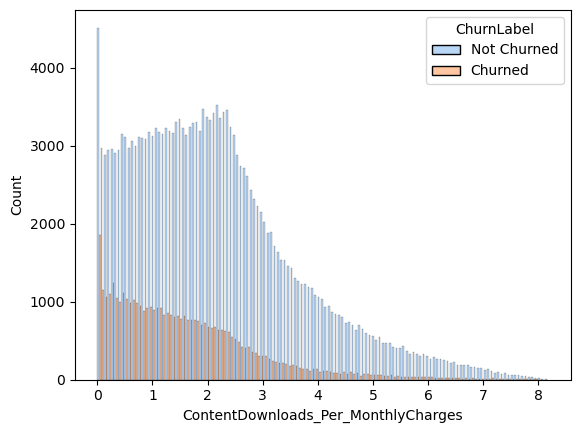

In [725]:
#Plot histplot to examine the monthly charges per account age of churned and not-churned users.
sns.histplot(data=train_df, x='ContentDownloads_Per_MonthlyCharges', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

Minimum value of ContentDownloads_Per_MonthlyCharges: 0.0


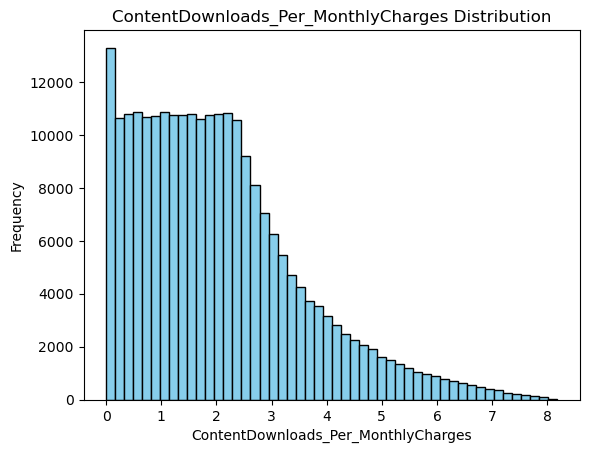

In [726]:
# Check for negative or zero values
print(f"Minimum value of ContentDownloads_Per_MonthlyCharges: {train_df['ContentDownloads_Per_MonthlyCharges'].min()}")

# Plot the histogram
plt.hist(train_df['ContentDownloads_Per_MonthlyCharges'], bins=50, color='skyblue', edgecolor='black')
plt.title("ContentDownloads_Per_MonthlyCharges Distribution")
plt.xlabel("ContentDownloads_Per_MonthlyCharges")
plt.ylabel("Frequency")
plt.show()

In [727]:
# Check how this new feature is correlated with churn
correlation = np.corrcoef(train_df['ContentDownloads_Per_MonthlyCharges'], train_df['Churn'])[0, 1]
print(f"Correlation with Churn: {correlation}")

Correlation with Churn: -0.14736259578185953


In [728]:
min_value_train = train_df['ContentDownloads_Per_MonthlyCharges'].min()
min_value_test = test_df['ContentDownloads_Per_MonthlyCharges'].min()
if min_value_train <= 0:
    shift = abs(min_value_train) + 1
    train_df['ContentDownloads_Per_MonthlyCharges_log'] = np.log(train_df['ContentDownloads_Per_MonthlyCharges'] + shift)
else:
    train_df['ContentDownloads_Per_MonthlyCharges_log'] = np.log(train_df['ContentDownloads_Per_MonthlyCharges'])

if min_value_test <= 0:
    shift = abs(min_value_test) + 1
    test_df['ContentDownloads_Per_MonthlyCharges_log'] = np.log(test_df['ContentDownloads_Per_MonthlyCharges'] + shift)
else:
    test_df['ContentDownloads_Per_MonthlyCharges_log'] = np.log(test_df['ContentDownloads_Per_MonthlyCharges'])


In [729]:
# Check how this new feature is correlated with churn
correlation = np.corrcoef(train_df['ContentDownloads_Per_MonthlyCharges_log'], train_df['Churn'])[0, 1]
print(f"Correlation with Churn: {correlation}")

Correlation with Churn: -0.15474570955100167


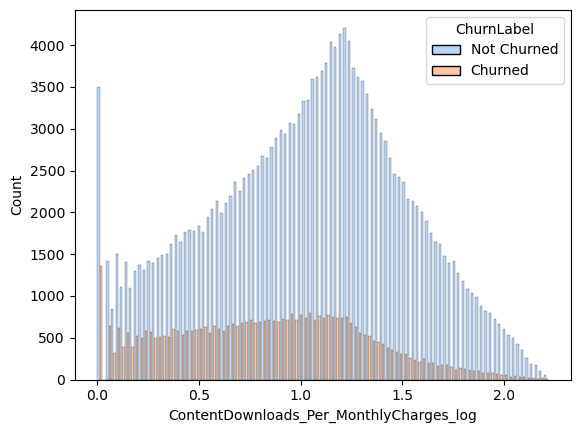

In [730]:
#Plot histplot to examine the monthly charges per account age of churned and not-churned users.
sns.histplot(data=train_df, x='ContentDownloads_Per_MonthlyCharges_log', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

In [731]:
from scipy.stats import ks_2samp

churned_feature_values = train_df[train_df['Churn'] == 1]['ContentDownloads_Per_MonthlyCharges'].values
non_churned_feature_values = train_df[train_df['Churn'] == 0]['ContentDownloads_Per_MonthlyCharges'].values

print("Churned Feature Values:", churned_feature_values[:10])  # Display first 10 for reference
print("Non-Churned Feature Values:", non_churned_feature_values[:10])  # Display first 10 for reference

ks_stat, p_value = ks_2samp(
    churned_feature_values,
    non_churned_feature_values
)
print("KS Statistic:", ks_stat, "P-value:", p_value)

Churned Feature Values: [1.34594466 0.59653958 1.9407051  0.80297058 0.45050631 1.94689615
 2.25942733 2.17911382 0.55496089 0.48224463]
Non-Churned Feature Values: [0.82951651 2.91488135 1.75483346 3.63031622 1.11401513 4.21903083
 2.09884437 1.21248126 0.         0.93150202]
KS Statistic: 0.17570828058767202 P-value: 0.0


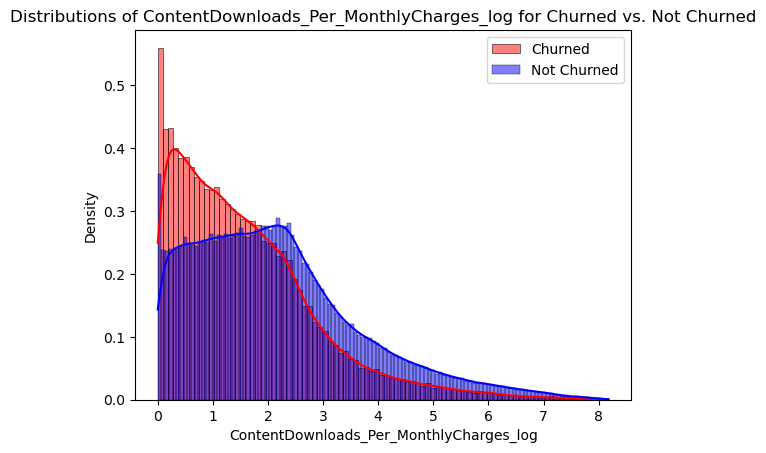

In [732]:
sns.histplot(churned_feature_values, kde=True, color='red', label='Churned', stat="density")
sns.histplot(non_churned_feature_values, kde=True, color='blue', label='Not Churned', stat="density")
plt.legend()
plt.xlabel('ContentDownloads_Per_MonthlyCharges_log')
plt.ylabel('Density')
plt.title('Distributions of ContentDownloads_Per_MonthlyCharges_log for Churned vs. Not Churned')
plt.show()

**ContentDownloads_Per_SupportTicketsPerMonth**

In [734]:
train_df['ContentDownloads_Per_SupportTicketsPerMonth'] = train_df['ContentDownloadsPerMonth'] / (train_df['SupportTicketsPerMonth'] + 1)
test_df['ContentDownloads_Per_SupportTicketsPerMonth'] = test_df['ContentDownloadsPerMonth'] / (test_df['SupportTicketsPerMonth'] + 1)

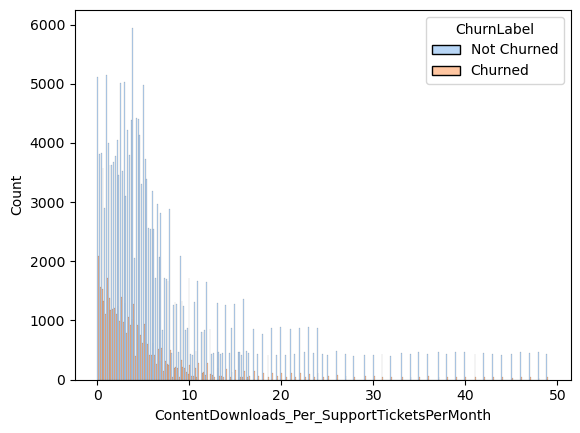

In [735]:
#Plot histplot to examine the monthly charges per account age of churned and not-churned users.
sns.histplot(data=train_df, x='ContentDownloads_Per_SupportTicketsPerMonth', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

Minimum value of ContentDownloads_Per_SupportTicketsPerMonth: 0.0


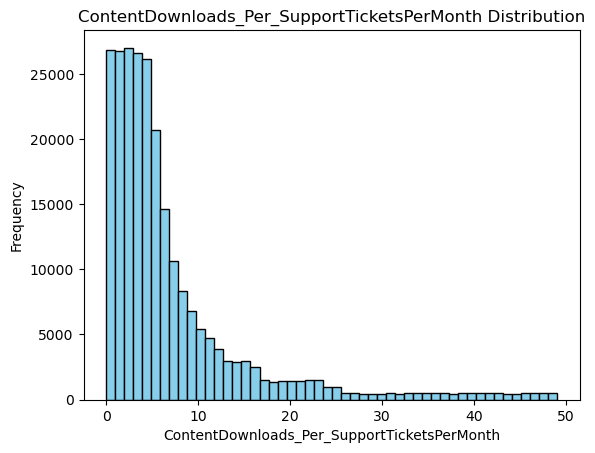

In [736]:
# Check for negative or zero values
print(f"Minimum value of ContentDownloads_Per_SupportTicketsPerMonth: {train_df['ContentDownloads_Per_SupportTicketsPerMonth'].min()}")

# Plot the histogram
plt.hist(train_df['ContentDownloads_Per_SupportTicketsPerMonth'], bins=50, color='skyblue', edgecolor='black')
plt.title("ContentDownloads_Per_SupportTicketsPerMonth Distribution")
plt.xlabel("ContentDownloads_Per_SupportTicketsPerMonth")
plt.ylabel("Frequency")
plt.show()

In [737]:
# Check how this new feature is correlated with churn
correlation = np.corrcoef(train_df['ContentDownloads_Per_SupportTicketsPerMonth'], train_df['Churn'])[0, 1]
print(f"Correlation with Churn: {correlation}")

Correlation with Churn: -0.10744409948002015


In [738]:
min_value_train = train_df['ContentDownloads_Per_SupportTicketsPerMonth'].min()
min_value_test = test_df['ContentDownloads_Per_SupportTicketsPerMonth'].min()
if min_value_train <= 0:
    shift = abs(min_value_train) + 1
    train_df['ContentDownloads_Per_SupportTicketsPerMonth_log'] = np.log(train_df['ContentDownloads_Per_SupportTicketsPerMonth'] + shift)
else:
    train_df['ContentDownloads_Per_SupportTicketsPerMonth_log'] = np.log(train_df['ContentDownloads_Per_SupportTicketsPerMonth'])

if min_value_test <= 0:
    shift = abs(min_value_test) + 1
    test_df['ContentDownloads_Per_SupportTicketsPerMonth_log'] = np.log(test_df['ContentDownloads_Per_SupportTicketsPerMonth'] + shift)
else:
    test_df['ContentDownloads_Per_SupportTicketsPerMonth_log'] = np.log(test_df['ContentDownloads_Per_SupportTicketsPerMonth'])


In [739]:
# Check how this new feature is correlated with churn
correlation = np.corrcoef(train_df['ContentDownloads_Per_SupportTicketsPerMonth_log'], train_df['Churn'])[0, 1]
print(f"Correlation with Churn: {correlation}")

Correlation with Churn: -0.1426753125911017


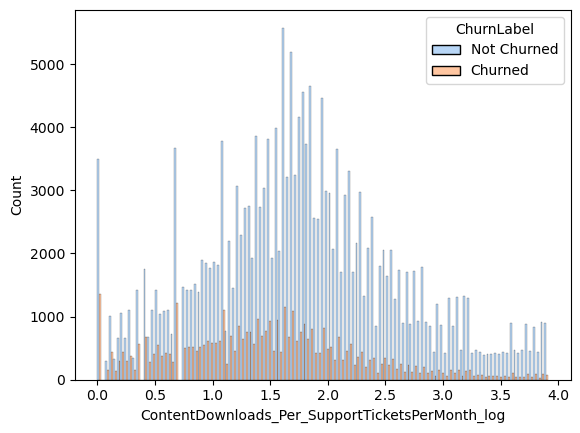

In [740]:
#Plot histplot to examine the monthly charges per account age of churned and not-churned users.
sns.histplot(data=train_df, x='ContentDownloads_Per_SupportTicketsPerMonth_log', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

In [741]:
from scipy.stats import ks_2samp

churned_feature_values = train_df[train_df['Churn'] == 1]['ContentDownloads_Per_SupportTicketsPerMonth'].values
non_churned_feature_values = train_df[train_df['Churn'] == 0]['ContentDownloads_Per_SupportTicketsPerMonth'].values

print("Churned Feature Values:", churned_feature_values[:10])  # Display first 10 for reference
print("Non-Churned Feature Values:", non_churned_feature_values[:10])  # Display first 10 for reference

ks_stat, p_value = ks_2samp(
    churned_feature_values,
    non_churned_feature_values
)
print("KS Statistic:", ks_stat, "P-value:", p_value)

Churned Feature Values: [28.          6.          6.16666667  2.16666667  2.66666667  3.5
  2.28571429  8.          2.2         1.        ]
Non-Churned Feature Values: [ 2.          2.          3.28571429 10.          4.          3.88888889
  2.8         3.33333333  0.          9.        ]
KS Statistic: 0.1679101489803414 P-value: 0.0


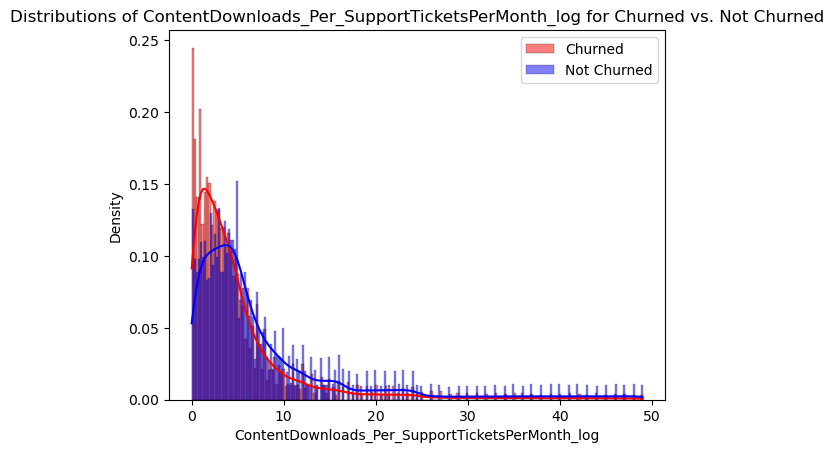

In [742]:
sns.histplot(churned_feature_values, kde=True, color='red', label='Churned', stat="density")
sns.histplot(non_churned_feature_values, kde=True, color='blue', label='Not Churned', stat="density")
plt.legend()
plt.xlabel('ContentDownloads_Per_SupportTicketsPerMonth_log')
plt.ylabel('Density')
plt.title('Distributions of ContentDownloads_Per_SupportTicketsPerMonth_log for Churned vs. Not Churned')
plt.show()

**TotalCharges_Per_MonthlyCharges**

In [744]:
train_df['TotalCharges_Per_MonthlyCharges'] = train_df['TotalCharges'] / (train_df['MonthlyCharges'] + 1)
test_df['TotalCharges_Per_MonthlyCharges'] = test_df['TotalCharges'] / (test_df['MonthlyCharges'] + 1)

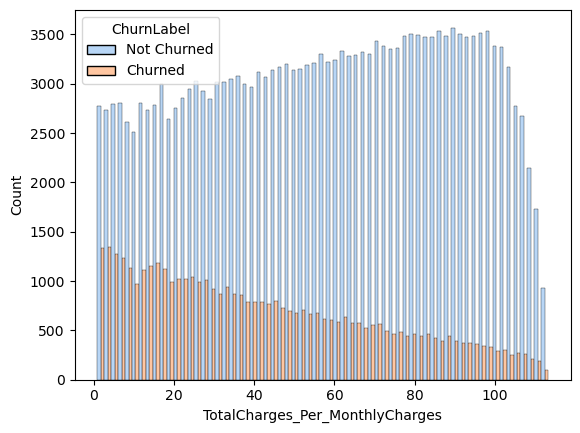

In [745]:
#Plot histplot to examine the monthly charges per account age of churned and not-churned users.
sns.histplot(data=train_df, x='TotalCharges_Per_MonthlyCharges', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

Minimum value of TotalCharges_Per_MonthlyCharges: 0.833087258172407


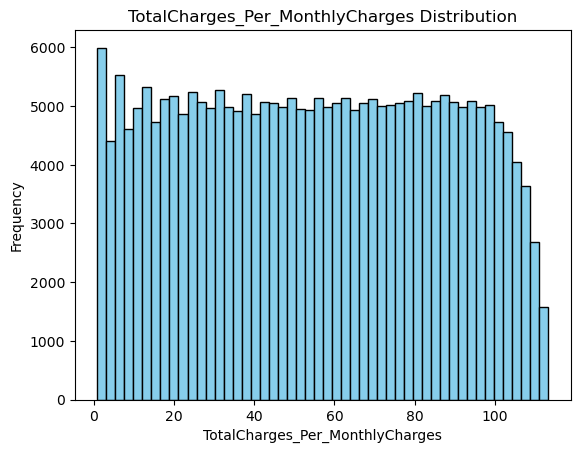

In [746]:
# Check for negative or zero values
print(f"Minimum value of TotalCharges_Per_MonthlyCharges: {train_df['TotalCharges_Per_MonthlyCharges'].min()}")

# Plot the histogram
plt.hist(train_df['TotalCharges_Per_MonthlyCharges'], bins=50, color='skyblue', edgecolor='black')
plt.title("TotalCharges_Per_MonthlyCharges Distribution")
plt.xlabel("TotalCharges_Per_MonthlyCharges")
plt.ylabel("Frequency")
plt.show()

In [747]:
# Check how this new feature is correlated with churn
correlation = np.corrcoef(train_df['TotalCharges_Per_MonthlyCharges'], train_df['Churn'])[0, 1]
print(f"Correlation with Churn: {correlation}")

Correlation with Churn: -0.192684257110163


In [748]:
min_value_train = train_df['TotalCharges_Per_MonthlyCharges'].min()
min_value_test = test_df['TotalCharges_Per_MonthlyCharges'].min()
if min_value_train <= 0:
    shift = abs(min_value_train) + 1
    train_df['TotalCharges_Per_MonthlyCharges_log'] = np.log(train_df['TotalCharges_Per_MonthlyCharges'] + shift)
else:
    train_df['TotalCharges_Per_MonthlyCharges_log'] = np.log(train_df['TotalCharges_Per_MonthlyCharges'])

if min_value_test <= 0:
    shift = abs(min_value_test) + 1
    test_df['TotalCharges_Per_MonthlyCharges_log'] = np.log(test_df['TotalCharges_Per_MonthlyCharges'] + shift)
else:
    test_df['TotalCharges_Per_MonthlyCharges_log'] = np.log(test_df['TotalCharges_Per_MonthlyCharges'])


In [749]:
# Check how this new feature is correlated with churn
correlation = np.corrcoef(train_df['TotalCharges_Per_MonthlyCharges_log'], train_df['Churn'])[0, 1]
print(f"Correlation with Churn: {correlation}")

Correlation with Churn: -0.18119281818704958


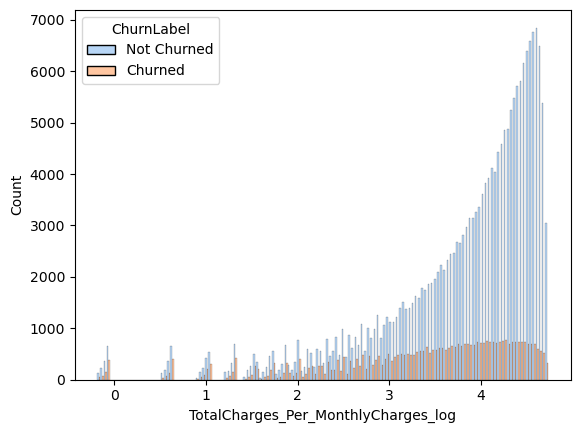

In [750]:
#Plot histplot to examine the monthly charges per account age of churned and not-churned users.
sns.histplot(data=train_df, x='TotalCharges_Per_MonthlyCharges_log', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

In [751]:
from scipy.stats import ks_2samp

churned_feature_values = train_df[train_df['Churn'] == 1]['TotalCharges_Per_MonthlyCharges'].values
non_churned_feature_values = train_df[train_df['Churn'] == 0]['TotalCharges_Per_MonthlyCharges'].values

print("Churned Feature Values:", churned_feature_values[:10])  # Display first 10 for reference
print("Non-Churned Feature Values:", non_churned_feature_values[:10])  # Display first 10 for reference

ks_stat, p_value = ks_2samp(
    churned_feature_values,
    non_churned_feature_values
)
print("KS Statistic:", ks_stat, "P-value:", p_value)

Churned Feature Values: [24.75019424 49.53172056 81.48917193 72.24394348 56.62120265 46.27434539
 36.92778906 77.53281667  7.59639208 27.44610064]
Non-Churned Feature Values: [ 18.34096697  47.76954238  67.4303112   28.1276627   53.82505689
  99.37855762  35.15156835  21.96879684  13.29445919 108.10048723]
KS Statistic: 0.22059945673044673 P-value: 0.0


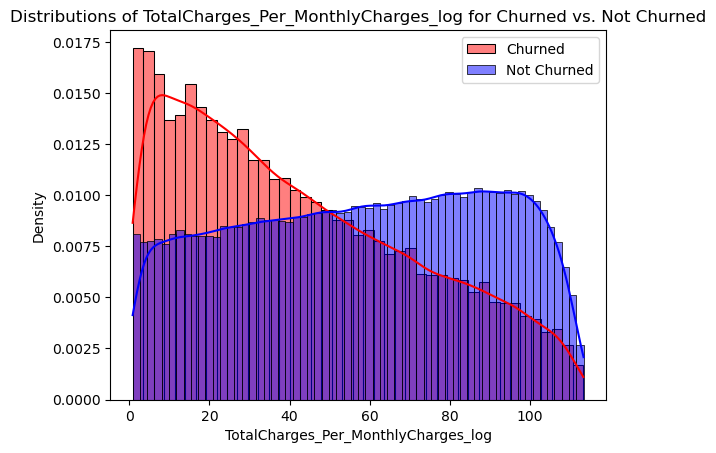

In [752]:
sns.histplot(churned_feature_values, kde=True, color='red', label='Churned', stat="density")
sns.histplot(non_churned_feature_values, kde=True, color='blue', label='Not Churned', stat="density")
plt.legend()
plt.xlabel('TotalCharges_Per_MonthlyCharges_log')
plt.ylabel('Density')
plt.title('Distributions of TotalCharges_Per_MonthlyCharges_log for Churned vs. Not Churned')
plt.show()

**TotalCharges_Per_SupportTicketsPerMonth**

In [754]:
train_df['TotalCharges_Per_SupportTicketsPerMonth'] = train_df['TotalCharges'] / (train_df['SupportTicketsPerMonth'] + 1)
test_df['TotalCharges_Per_SupportTicketsPerMonth'] = test_df['TotalCharges'] / (test_df['SupportTicketsPerMonth'] + 1)

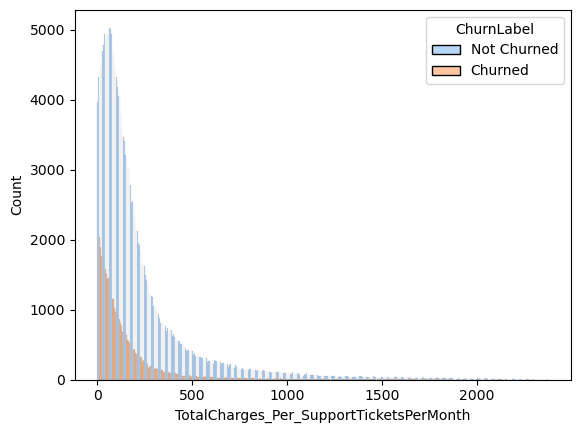

In [755]:
#Plot histplot to examine the monthly charges per account age of churned and not-churned users.
sns.histplot(data=train_df, x='TotalCharges_Per_SupportTicketsPerMonth', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

Minimum value of TotalCharges_Per_SupportTicketsPerMonth: 0.5033848266396004


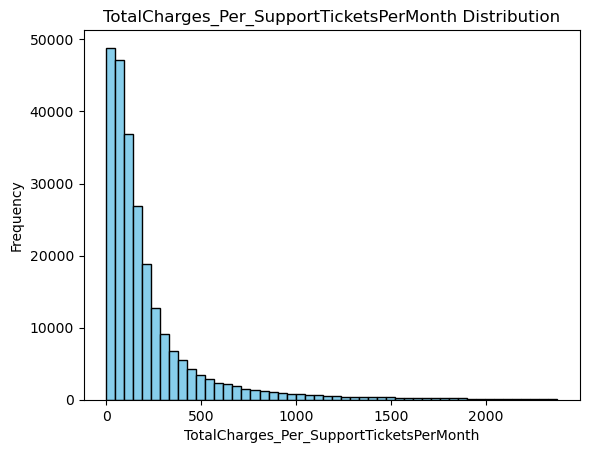

In [756]:
# Check for negative or zero values
print(f"Minimum value of TotalCharges_Per_SupportTicketsPerMonth: {train_df['TotalCharges_Per_SupportTicketsPerMonth'].min()}")

# Plot the histogram
plt.hist(train_df['TotalCharges_Per_SupportTicketsPerMonth'], bins=50, color='skyblue', edgecolor='black')
plt.title("TotalCharges_Per_SupportTicketsPerMonth Distribution")
plt.xlabel("TotalCharges_Per_SupportTicketsPerMonth")
plt.ylabel("Frequency")
plt.show()

In [757]:
# Check how this new feature is correlated with churn
correlation = np.corrcoef(train_df['TotalCharges_Per_SupportTicketsPerMonth'], train_df['Churn'])[0, 1]
print(f"Correlation with Churn: {correlation}")

Correlation with Churn: -0.10493069695200544


In [758]:
min_value_train = train_df['TotalCharges_Per_SupportTicketsPerMonth'].min()
min_value_test = test_df['TotalCharges_Per_SupportTicketsPerMonth'].min()
if min_value_train <= 0:
    shift = abs(min_value_train) + 1
    train_df['TotalCharges_Per_SupportTicketsPerMonth_log'] = np.log(train_df['TotalCharges_Per_SupportTicketsPerMonth'] + shift)
else:
    train_df['TotalCharges_Per_SupportTicketsPerMonth_log'] = np.log(train_df['TotalCharges_Per_SupportTicketsPerMonth'])

if min_value_test <= 0:
    shift = abs(min_value_test) + 1
    test_df['TotalCharges_Per_SupportTicketsPerMonth_log'] = np.log(test_df['TotalCharges_Per_SupportTicketsPerMonth'] + shift)
else:
    test_df['TotalCharges_Per_SupportTicketsPerMonth_log'] = np.log(test_df['TotalCharges_Per_SupportTicketsPerMonth'])


In [759]:
# Check how this new feature is correlated with churn
correlation = np.corrcoef(train_df['TotalCharges_Per_SupportTicketsPerMonth_log'], train_df['Churn'])[0, 1]
print(f"Correlation with Churn: {correlation}")

Correlation with Churn: -0.1540423184962493


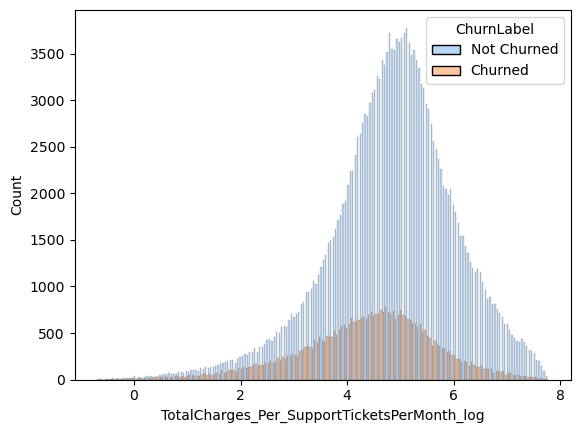

In [760]:
#Plot histplot to examine the monthly charges per account age of churned and not-churned users.
sns.histplot(data=train_df, x='TotalCharges_Per_SupportTicketsPerMonth_log', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

In [761]:
from scipy.stats import ks_2samp

churned_feature_values = train_df[train_df['Churn'] == 1]['TotalCharges_Per_SupportTicketsPerMonth'].values
non_churned_feature_values = train_df[train_df['Churn'] == 0]['TotalCharges_Per_SupportTicketsPerMonth'].values

print("Churned Feature Values:", churned_feature_values[:10])  # Display first 10 for reference
print("Non-Churned Feature Values:", non_churned_feature_values[:10])  # Display first 10 for reference

ks_stat, p_value = ks_2samp(
    churned_feature_values,
    non_churned_feature_values
)
print("KS Statistic:", ks_stat, "P-value:", p_value)

Churned Feature Values: [514.88405046 498.19045609 258.9350438  194.93683566 335.15595544
  83.18893058  37.35741975 284.63980547  30.11394649  56.91323231]
Non-Churned Feature Values: [  44.22086039   32.77632025  126.25513594   77.4799247   193.26508447
   91.60212014   46.89456388   60.39625107  263.80107966 1044.44689144]
KS Statistic: 0.16543281645411567 P-value: 0.0


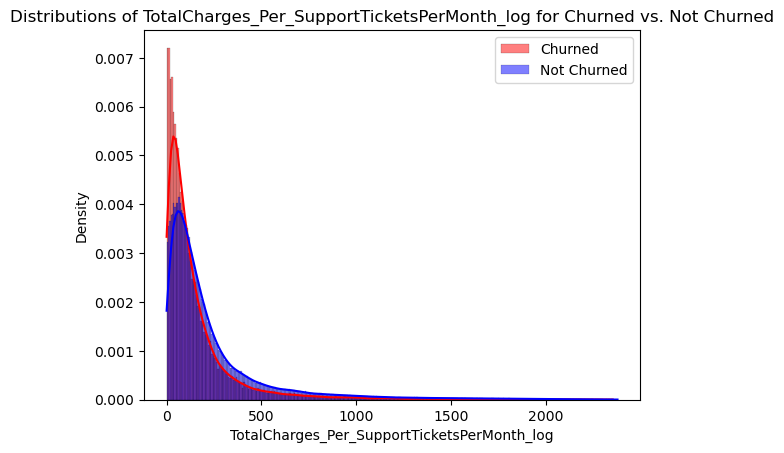

In [762]:
sns.histplot(churned_feature_values, kde=True, color='red', label='Churned', stat="density")
sns.histplot(non_churned_feature_values, kde=True, color='blue', label='Not Churned', stat="density")
plt.legend()
plt.xlabel('TotalCharges_Per_SupportTicketsPerMonth_log')
plt.ylabel('Density')
plt.title('Distributions of TotalCharges_Per_SupportTicketsPerMonth_log for Churned vs. Not Churned')
plt.show()

**ContentDownloadsPerMonthlyCharges** (dropped)

In [764]:
# Without interaction
X_simple = train_df[['ContentDownloadsPerMonth', 'MonthlyCharges']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = np.where(train_df['MonthlyCharges']==0, 0, train_df['ContentDownloadsPerMonth'] / train_df['MonthlyCharges'])
#train_df['Interaction'] = train_df['ContentDownloadsPerMonth'] * train_df['MonthlyCharges']
X_interaction = train_df[['ContentDownloadsPerMonth', 'MonthlyCharges', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.459591
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.459582
         Iterations 6
ROC AUC without interaction: 0.6222389744846792
ROC AUC with interaction: 0.62223717415659
Difference: -1.8003280892742168e-06


ROC AUC scores with and without interaction between 'ContentDownloadsPerMonth' and 'MonthlyCharges' are almost the same, so combining them as ratio won't bring any predictive power.

**ContentDownloadsSupportTicketsPerMonth** (dropped)

In [767]:
# Without interaction
X_simple = train_df[['ContentDownloadsPerMonth', 'SupportTicketsPerMonth']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
#train_df['Interaction'] = np.where(train_df['MonthlyCharges']==0, 0, train_df['ContentDownloadsPerMonth'] / train_df['MonthlyCharges'])
train_df['Interaction'] = train_df['ContentDownloadsPerMonth'] * train_df['SupportTicketsPerMonth']
X_interaction = train_df[['ContentDownloadsPerMonth', 'SupportTicketsPerMonth', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.461152
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.461150
         Iterations 6
ROC AUC without interaction: 0.6150697634051506
ROC AUC with interaction: 0.6150747341793805
Difference: 4.970774229895447e-06


ROC AUC scores with and without interaction between 'ContentDownloadsPerMonth' and 'SupportTicketsPerMonth' are almost the same, so combining them as product won't bring any predictive power.

**ContentDownloadsPerSupportTicketsPerMonth** (dropped)

In [770]:
# Without interaction
X_simple = train_df[['ContentDownloadsPerMonth', 'SupportTicketsPerMonth']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = np.where(train_df['SupportTicketsPerMonth']==0, 0, train_df['ContentDownloadsPerMonth'] / train_df['SupportTicketsPerMonth'])
#train_df['Interaction'] = train_df['ContentDownloadsPerMonth'] * train_df['SupportTicketsPerMonth']
X_interaction = train_df[['ContentDownloadsPerMonth', 'SupportTicketsPerMonth', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.461152
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.461152
         Iterations 6
ROC AUC without interaction: 0.6150697634051506
ROC AUC with interaction: 0.615072790410148
Difference: 3.027004997324667e-06


ROC AUC scores with and without interaction between 'ContentDownloadsPerMonth' and 'SupportTicketsPerMonth' are almost the same, so combining them as ratio won't bring any predictive power.

**ContentDownloadsPerMonthTotalCharges** (dropped)

In [773]:
# Without interaction
X_simple = train_df[['ContentDownloadsPerMonth', 'TotalCharges']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
#train_df['Interaction'] = np.where(train_df['SupportTicketsPerMonth']==0, 0, train_df['ContentDownloadsPerMonth'] / train_df['SupportTicketsPerMonth'])
train_df['Interaction'] = train_df['ContentDownloadsPerMonth'] * train_df['TotalCharges']
X_interaction = train_df[['ContentDownloadsPerMonth', 'TotalCharges', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.456927
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.456910
         Iterations 6
ROC AUC without interaction: 0.6329504939110023
ROC AUC with interaction: 0.6334240601399796
Difference: 0.0004735662289773179


ROC AUC scores with and without interaction between 'ContentDownloadsPerMonth' and 'TotalCharges' are almost the same, so combining them as product won't bring any predictive power.

**ContentDownloadsPerMonthPerTotalCharges** (dropped)

In [776]:
# Without interaction
X_simple = train_df[['ContentDownloadsPerMonth', 'TotalCharges']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = np.where(train_df['TotalCharges']==0, 0, train_df['ContentDownloadsPerMonth'] / train_df['TotalCharges'])
#train_df['Interaction'] = train_df['ContentDownloadsPerMonth'] * train_df['TotalCharges']
X_interaction = train_df[['ContentDownloadsPerMonth', 'TotalCharges', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.456927
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.456782
         Iterations 6
ROC AUC without interaction: 0.6329504939110023
ROC AUC with interaction: 0.6336028771576477
Difference: 0.0006523832466454049


ROC AUC scores with and without interaction between 'ContentDownloadsPerMonth' and 'TotalCharges' are almost the same, so combining them as ratio won't bring any predictive power.

**MonthlyChargesSupportTicketsPerMonth** (dropped)

In [779]:
# Without interaction
X_simple = train_df[['MonthlyCharges', 'SupportTicketsPerMonth']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
#train_df['Interaction'] = np.where(train_df['TotalCharges']==0, 0, train_df['ContentDownloadsPerMonth'] / train_df['TotalCharges'])
train_df['Interaction'] = train_df['MonthlyCharges'] * train_df['SupportTicketsPerMonth']
X_interaction = train_df[['MonthlyCharges', 'SupportTicketsPerMonth', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.464593
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.464593
         Iterations 6
ROC AUC without interaction: 0.597192479682251
ROC AUC with interaction: 0.5971924715180119
Difference: -8.164239062580236e-09


ROC AUC scores with and without interaction between 'MonthlyCharges' and 'SupportTicketsPerMonth' are almost the same, so combining them as product won't bring any predictive power.

**MonthlyChargesPerSupportTicketsPerMonth** (dropped)

In [782]:
# Without interaction
X_simple = train_df[['MonthlyCharges', 'SupportTicketsPerMonth']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = np.where(train_df['SupportTicketsPerMonth']==0, 0, train_df['MonthlyCharges'] / train_df['SupportTicketsPerMonth'])
#train_df['Interaction'] = train_df['MonthlyCharges'] * train_df['SupportTicketsPerMonth']
X_interaction = train_df[['MonthlyCharges', 'SupportTicketsPerMonth', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.464593
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.464590
         Iterations 6
ROC AUC without interaction: 0.597192479682251
ROC AUC with interaction: 0.5972101610426643
Difference: 1.768136041335744e-05


ROC AUC scores with and without interaction between 'MonthlyCharges' and 'SupportTicketsPerMonth' are almost the same, so combining them as ratio won't bring any predictive power.

**MonthlyTotalCharges** (dropped)

In [785]:
# Without interaction
X_simple = train_df[['MonthlyCharges', 'TotalCharges']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
#train_df['Interaction'] = np.where(train_df['TotalCharges']==0, 0, train_df['MonthlyCharges'] / train_df['TotalCharges'])
train_df['Interaction'] = train_df['MonthlyCharges'] * train_df['TotalCharges']
X_interaction = train_df[['MonthlyCharges', 'TotalCharges', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.449975
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.448579
         Iterations 6
ROC AUC without interaction: 0.6619355634240147
ROC AUC with interaction: 0.6641612000594932
Difference: 0.0022256366354784785


ROC AUC scores with and without interaction between 'MonthlyCharges' and 'TotalCharges' are almost the same, so combining them as product won't bring any predictive power.

**MonthlyPerTotalCharges** (dropped)

In [788]:
# Without interaction
X_simple = train_df[['MonthlyCharges', 'TotalCharges']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = np.where(train_df['TotalCharges']==0, 0, train_df['MonthlyCharges'] / train_df['TotalCharges'])
#train_df['Interaction'] = train_df['MonthlyCharges'] * train_df['TotalCharges']
X_interaction = train_df[['MonthlyCharges', 'TotalCharges', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.449975
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.449951
         Iterations 6
ROC AUC without interaction: 0.6619355634240147
ROC AUC with interaction: 0.6622512609386473
Difference: 0.00031569751463256246


ROC AUC scores with and without interaction between 'MonthlyCharges' and 'TotalCharges' are almost the same, so combining them as ratio won't bring any predictive power.

**SupportTicketsPerMonthTotalCharges** (dropped)

In [791]:
# Without interaction
X_simple = train_df[['SupportTicketsPerMonth', 'TotalCharges']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
#train_df['Interaction'] = np.where(train_df['TotalCharges']==0, 0, train_df['SupportTicketsPerMonth'] / train_df['TotalCharges'])
train_df['Interaction'] = train_df['SupportTicketsPerMonth'] * train_df['TotalCharges']
X_interaction = train_df[['SupportTicketsPerMonth', 'TotalCharges', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.461978
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.461965
         Iterations 6
ROC AUC without interaction: 0.6118153063948577
ROC AUC with interaction: 0.6123437880166868
Difference: 0.0005284816218290578


ROC AUC scores with and without interaction between 'SupportTicketsPerMonth' and 'TotalCharges' are almost the same, so combining them as product won't bring any predictive power.

**SupportTicketsPerMonthPerTotalCharges** (dropped)

In [794]:
# Without interaction
X_simple = train_df[['SupportTicketsPerMonth', 'TotalCharges']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = np.where(train_df['TotalCharges']==0, 0, train_df['SupportTicketsPerMonth'] / train_df['TotalCharges'])
#train_df['Interaction'] = train_df['SupportTicketsPerMonth'] * train_df['TotalCharges']
X_interaction = train_df[['SupportTicketsPerMonth', 'TotalCharges', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.461978
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.461801
         Iterations 6
ROC AUC without interaction: 0.6118153063948577
ROC AUC with interaction: 0.6121378816004849
Difference: 0.00032257520562717357


ROC AUC scores with and without interaction between 'SupportTicketsPerMonth' and 'TotalCharges' are almost the same, so combining them as ratio won't bring any predictive power.

In [796]:
train_df = train_df.drop(columns=['Interaction'])
test_df = test_df.drop(columns=['Interaction'])

**Checking the predictive power of 'UserRating', 'WatchlistSize', 'SubscriptionTypeEncoded'**

In [798]:
# Without 'UserRating'
X_without = train_df[['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
                     'AverageViewingDuration', 'ContentDownloadsPerMonth', 'ViewingHoursContentDownloadsPerMonth_bin_encoded']]
y = train_df['Churn']

X_without = sm.add_constant(X_without)  # add intercept for statsmodels
model_without = sm.Logit(y, X_without).fit()
y_pred_without = model_without.predict(X_without)
auc_without = roc_auc_score(y, y_pred_without)

# With 'UserRating'
X_with = train_df[['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
                     'AverageViewingDuration', 'ContentDownloadsPerMonth', 'ViewingHoursContentDownloadsPerMonth_bin_encoded', 'UserRating']]

X_with = sm.add_constant(X_with)  # add intercept

model_with = sm.Logit(y, X_with).fit()
y_pred_with = model_with.predict(X_with)
auc_with = roc_auc_score(y, y_pred_with)

print(f"ROC AUC without 'UserRating': {auc_without}")
print(f"ROC AUC with 'UserRating': {auc_with}")
print("Difference:", auc_with - auc_without)


Optimization terminated successfully.
         Current function value: 0.417947
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.417683
         Iterations 7
ROC AUC without 'UserRating': 0.7379386397138015
ROC AUC with 'UserRating': 0.7384314216131611
Difference: 0.00049278189935964


ROC AUC scores with and without 'UserRating' have small difference (0.0005), so 'UserRating' feature won't bring any predictive power.

In [800]:
# Without 'WatchlistSize'
X_without = train_df[['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
                     'AverageViewingDuration', 'ContentDownloadsPerMonth', 'ViewingHoursContentDownloadsPerMonth_bin_encoded', 'UserRating']]
y = train_df['Churn']

X_without = sm.add_constant(X_without)  # add intercept for statsmodels
model_without = sm.Logit(y, X_without).fit()
y_pred_without = model_without.predict(X_without)
auc_without = roc_auc_score(y, y_pred_without)

# With 'WatchlistSize'
X_with = train_df[['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
                   'AverageViewingDuration', 'ContentDownloadsPerMonth',
                   'ViewingHoursContentDownloadsPerMonth_bin_encoded', 'UserRating', 'WatchlistSize']]

X_with = sm.add_constant(X_with)  # add intercept

model_with = sm.Logit(y, X_with).fit()
y_pred_with = model_with.predict(X_with)
auc_with = roc_auc_score(y, y_pred_with)

print(f"ROC AUC without 'WatchlistSize': {auc_without}")
print(f"ROC AUC with 'WatchlistSize': {auc_with}")
print("Difference:", auc_with - auc_without)


Optimization terminated successfully.
         Current function value: 0.417683
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.417429
         Iterations 7
ROC AUC without 'WatchlistSize': 0.7384314216131611
ROC AUC with 'WatchlistSize': 0.7389218823740192
Difference: 0.0004904607608581246


ROC AUC scores with and without 'WatchlistSize' have small difference (0.0005), so this feature won't bring any predictive power.

In [802]:
# Without 'SubscriptionTypeEncoded'
X_without = train_df[['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
                     'AverageViewingDuration', 'ContentDownloadsPerMonth', 'ViewingHoursContentDownloadsPerMonth_bin_encoded',
                     'UserRating', 'WatchlistSize']]

y = train_df['Churn']

X_without = sm.add_constant(X_without)  # add intercept for statsmodels
model_without = sm.Logit(y, X_without).fit()
y_pred_without = model_without.predict(X_without)
auc_without = roc_auc_score(y, y_pred_without)

# With 'SubscriptionTypeEncoded'
X_with = train_df[['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
                   'AverageViewingDuration', 'ContentDownloadsPerMonth', 'ViewingHoursContentDownloadsPerMonth_bin_encoded',
                   'UserRating', 'WatchlistSize', 'SubscriptionTypeEncoded']]

X_with = sm.add_constant(X_with)  # add intercept

model_with = sm.Logit(y, X_with).fit()
y_pred_with = model_with.predict(X_with)
auc_with = roc_auc_score(y, y_pred_with)

print(f"ROC AUC without 'SubscriptionTypeEncoded': {auc_without}")
print(f"ROC AUC with 'SubscriptionTypeEncoded': {auc_with}")
print("Difference:", auc_with - auc_without)


Optimization terminated successfully.
         Current function value: 0.417429
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.416671
         Iterations 7
ROC AUC without 'SubscriptionTypeEncoded': 0.7389218823740192
ROC AUC with 'SubscriptionTypeEncoded': 0.7403811140011346
Difference: 0.001459231627115365


ROC AUC scores with and without 'SubscriptionTypeEncoded' have small difference (0.00146), so I'll include this feature to check for any predictive power.

**Checking the predictive power of 'PaymentMethod', 'ContentType', 'GenrePreference'**

In [805]:
#One-hot encoding of 'PaymentMethod'
encoder = OneHotEncoder()

# Fit and transform the 'PaymentMethod' column
encoded_train_data = encoder.fit_transform(train_df[['PaymentMethod']])
encoded_test_data = encoder.fit_transform(test_df[['PaymentMethod']])

# Convert the encoded data to a DataFrame
encoded_train_df = pd.DataFrame(encoded_train_data.toarray(), columns=encoder.get_feature_names_out())
encoded_test_df = pd.DataFrame(encoded_test_data.toarray(), columns=encoder.get_feature_names_out())

# Concatenate the encoded DataFrame with the original DataFrame   
train_df = pd.concat([train_df, encoded_train_df], axis=1)
test_df = pd.concat([test_df, encoded_test_df], axis=1)

print(train_df.info())
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 56 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   AccountAge                                             243787 non-null  int64  
 1   MonthlyCharges                                         243787 non-null  float64
 2   TotalCharges                                           243787 non-null  float64
 3   PaymentMethod                                          243787 non-null  object 
 4   PaperlessBilling                                       243787 non-null  object 
 5   ContentType                                            243787 non-null  object 
 6   MultiDeviceAccess                                      243787 non-null  object 
 7   DeviceRegistered                                       243787 non-null  object 
 8   ViewingHoursPerWeek               

In [806]:
# Without encoded 'PaymentMethod'
X_without = train_df[['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
                      'AverageViewingDuration', 'ContentDownloadsPerMonth', 'ViewingHoursContentDownloadsPerMonth_bin_encoded',
                      'UserRating', 'WatchlistSize']]
y = train_df['Churn']

X_without = sm.add_constant(X_without)  # add intercept for statsmodels
model_without = sm.Logit(y, X_without).fit()
y_pred_without = model_without.predict(X_without)
auc_without = roc_auc_score(y, y_pred_without)

# With encoded 'PaymentMethod'
X_with = train_df[['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
                   'AverageViewingDuration', 'ContentDownloadsPerMonth', 'ViewingHoursContentDownloadsPerMonth_bin_encoded',
                   'UserRating', 'WatchlistSize', 'PaymentMethod_BankTransfer', 'PaymentMethod_CreditCard',
                   'PaymentMethod_ElectronicCheck', 'PaymentMethod_MailedCheck']]

X_with = sm.add_constant(X_with)  # add intercept

model_with = sm.Logit(y, X_with).fit()
y_pred_with = model_with.predict(X_with)
auc_with = roc_auc_score(y, y_pred_with)

print(f"ROC AUC without encoded 'PaymentMethod': {auc_without}")
print(f"ROC AUC with encoded 'PaymentMethod': {auc_with}")
print("Difference:", auc_with - auc_without)


Optimization terminated successfully.
         Current function value: 0.417429
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.416896
         Iterations 7
ROC AUC without encoded 'PaymentMethod': 0.7389218823740192
ROC AUC with encoded 'PaymentMethod': 0.7400107248164771
Difference: 0.0010888424424578824


ROC AUC scores with and without encoded 'PaymentMethod' features differ for 0.001, so I'll include these features to check if they will bring some predictive power.

In [808]:
# Drop the unneccessary columns
train_df = train_df.drop(columns=['PaymentMethod'])
test_df = test_df.drop(columns=['PaymentMethod'])
#train_df = train_df.drop(columns=['PaymentMethod_BankTransfer', 'PaymentMethod_CreditCard',
#                                  'PaymentMethod_ElectronicCheck', 'PaymentMethod_MailedCheck'])
#test_df = test_df.drop(columns=['PaymentMethod_BankTransfer', 'PaymentMethod_CreditCard',
#                                'PaymentMethod_ElectronicCheck', 'PaymentMethod_MailedCheck'])

In [809]:
#One-hot encoding of 'ContentType'
encoder = OneHotEncoder()

# Fit and transform the 'ContentType' column
encoded_train_data = encoder.fit_transform(train_df[['ContentType']])
encoded_test_data = encoder.fit_transform(test_df[['ContentType']])

# Convert the encoded data to a DataFrame
encoded_train_df = pd.DataFrame(encoded_train_data.toarray(), columns=encoder.get_feature_names_out())
encoded_test_df = pd.DataFrame(encoded_test_data.toarray(), columns=encoder.get_feature_names_out())

# Concatenate the encoded DataFrame with the original DataFrame   
train_df = pd.concat([train_df, encoded_train_df], axis=1)
test_df = pd.concat([test_df, encoded_test_df], axis=1)

print(train_df.info())
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 58 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   AccountAge                                             243787 non-null  int64  
 1   MonthlyCharges                                         243787 non-null  float64
 2   TotalCharges                                           243787 non-null  float64
 3   PaperlessBilling                                       243787 non-null  object 
 4   ContentType                                            243787 non-null  object 
 5   MultiDeviceAccess                                      243787 non-null  object 
 6   DeviceRegistered                                       243787 non-null  object 
 7   ViewingHoursPerWeek                                    243787 non-null  float64
 8   AverageViewingDuration            

In [810]:
# Without encoded 'ContentType'
X_without = train_df[['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
                      'AverageViewingDuration', 'ContentDownloadsPerMonth', 'ViewingHoursContentDownloadsPerMonth_bin_encoded',
                      'UserRating', 'WatchlistSize']]
y = train_df['Churn']

X_without = sm.add_constant(X_without)  # add intercept for statsmodels
model_without = sm.Logit(y, X_without).fit()
y_pred_without = model_without.predict(X_without)
auc_without = roc_auc_score(y, y_pred_without)

# With encoded 'ContentType'
X_with = train_df[['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
                      'AverageViewingDuration', 'ContentDownloadsPerMonth', 'ViewingHoursContentDownloadsPerMonth_bin_encoded',
                      'UserRating', 'WatchlistSize',
                      'ContentType_Both', 'ContentType_Movies', 'ContentType_TVShows']]

X_with = sm.add_constant(X_with)  # add intercept

model_with = sm.Logit(y, X_with).fit()
y_pred_with = model_with.predict(X_with)
auc_with = roc_auc_score(y, y_pred_with)

print(f"ROC AUC without 'ContentType': {auc_without}")
print(f"ROC AUC with 'ContentType': {auc_with}")
print("Difference:", auc_with - auc_without)


Optimization terminated successfully.
         Current function value: 0.417429
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.417331
         Iterations 7
ROC AUC without 'ContentType': 0.7389218823740192
ROC AUC with 'ContentType': 0.7391020478518271
Difference: 0.00018016547780785874


ROC AUC scores with and without encoded 'ContentType' differ only 0.00018, so I'll not include those features because they won't bring any predictive power.

In [812]:
# Drop the unneccessary columns
train_df = train_df.drop(columns=['ContentType'])
test_df = test_df.drop(columns=['ContentType'])

In [813]:
#One-hot encoding of 'GenrePreference'
encoder = OneHotEncoder()

# Fit and transform the 'GenrePreference' column
encoded_train_data = encoder.fit_transform(train_df[['GenrePreference']])
encoded_test_data = encoder.fit_transform(test_df[['GenrePreference']])

# Convert the encoded data to a DataFrame
encoded_train_df = pd.DataFrame(encoded_train_data.toarray(), columns=encoder.get_feature_names_out())
encoded_test_df = pd.DataFrame(encoded_test_data.toarray(), columns=encoder.get_feature_names_out())

# Concatenate the encoded DataFrame with the original DataFrame   
train_df = pd.concat([train_df, encoded_train_df], axis=1)
test_df = pd.concat([test_df, encoded_test_df], axis=1)


In [814]:
# Without encoded 'GenrePreference'
X_without = train_df[['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
                      'AverageViewingDuration', 'ContentDownloadsPerMonth', 'ViewingHoursContentDownloadsPerMonth_bin_encoded',
                      'UserRating', 'WatchlistSize']]

y = train_df['Churn']

X_without = sm.add_constant(X_without)  # add intercept for statsmodels
model_without = sm.Logit(y, X_without).fit()
y_pred_without = model_without.predict(X_without)
auc_without = roc_auc_score(y, y_pred_without)

# With encoded 'GenrePreference'
X_with = train_df[['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
                   'AverageViewingDuration', 'ContentDownloadsPerMonth', 'ViewingHoursContentDownloadsPerMonth_bin_encoded',
                   'UserRating', 'WatchlistSize',
                   'GenrePreference_Action', 'GenrePreference_Comedy', 'GenrePreference_Drama',
                   'GenrePreference_Fantasy', 'GenrePreference_Sci-Fi']]

X_with = sm.add_constant(X_with)  # add intercept

model_with = sm.Logit(y, X_with).fit()
y_pred_with = model_with.predict(X_with)
auc_with = roc_auc_score(y, y_pred_with)

print(f"ROC AUC without 'GenrePreference': {auc_without}")
print(f"ROC AUC with 'GenrePreference': {auc_with}")
print("Difference:", auc_with - auc_without)


Optimization terminated successfully.
         Current function value: 0.417429
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.417043
         Iterations 7
ROC AUC without 'GenrePreference': 0.7389218823740192
ROC AUC with 'GenrePreference': 0.7397249934606998
Difference: 0.0008031110866805191


ROC AUC scores with and without encoded 'GenrePreference' differ only 0.0007, so I'll not include these features because they won't bring any predictive power.

In [816]:
# Drop the unneccessary columns
train_df = train_df.drop(columns=['GenrePreference'])
test_df = test_df.drop(columns=['GenrePreference'])

In [817]:
#One-hot encoding of 'PaperlessBilling'
encoder = OneHotEncoder()

# Fit and transform the 'PaperlessBilling' column
encoded_train_data = encoder.fit_transform(train_df[['PaperlessBilling']])
encoded_test_data = encoder.fit_transform(test_df[['PaperlessBilling']])

# Convert the encoded data to a DataFrame
encoded_train_df = pd.DataFrame(encoded_train_data.toarray(), columns=encoder.get_feature_names_out())
encoded_test_df = pd.DataFrame(encoded_test_data.toarray(), columns=encoder.get_feature_names_out())

# Concatenate the encoded DataFrame with the original DataFrame   
train_df = pd.concat([train_df, encoded_train_df], axis=1)
test_df = pd.concat([test_df, encoded_test_df], axis=1)


In [818]:
# Without encoded 'PaperlessBilling'
X_without = train_df[['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
                      'AverageViewingDuration', 'ContentDownloadsPerMonth', 'ViewingHoursContentDownloadsPerMonth_bin_encoded',
                      'UserRating', 'WatchlistSize']]

y = train_df['Churn']

X_without = sm.add_constant(X_without)  # add intercept for statsmodels
model_without = sm.Logit(y, X_without).fit()
y_pred_without = model_without.predict(X_without)
auc_without = roc_auc_score(y, y_pred_without)

# With encoded 'PaperlessBilling'
X_with = train_df[['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
                   'AverageViewingDuration', 'ContentDownloadsPerMonth', 'ViewingHoursContentDownloadsPerMonth_bin_encoded',
                   'UserRating', 'WatchlistSize', 'PaperlessBilling_No', 'PaperlessBilling_Yes']]

X_with = sm.add_constant(X_with)  # add intercept

model_with = sm.Logit(y, X_with).fit()
y_pred_with = model_with.predict(X_with)
auc_with = roc_auc_score(y, y_pred_with)

print(f"ROC AUC without 'PaperlessBilling': {auc_without}")
print(f"ROC AUC with 'PaperlessBilling': {auc_with}")

print("Difference:", f"{auc_with - auc_without:.10f}")


Optimization terminated successfully.
         Current function value: 0.417429
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.417428
         Iterations 7
ROC AUC without 'PaperlessBilling': 0.7389218823740192
ROC AUC with 'PaperlessBilling': 0.7389224282441096
Difference: 0.0000005459


In [819]:
train_df = train_df.drop(columns=['PaperlessBilling'])
test_df = test_df.drop(columns=['PaperlessBilling'])

In [820]:
#One-hot encoding of 'MultiDeviceAccess'
encoder = OneHotEncoder()

# Fit and transform the 'MultiDeviceAccess' column
encoded_train_data = encoder.fit_transform(train_df[['MultiDeviceAccess']])
encoded_test_data = encoder.fit_transform(test_df[['MultiDeviceAccess']])

# Convert the encoded data to a DataFrame
encoded_train_df = pd.DataFrame(encoded_train_data.toarray(), columns=encoder.get_feature_names_out())
encoded_test_df = pd.DataFrame(encoded_test_data.toarray(), columns=encoder.get_feature_names_out())

# Concatenate the encoded DataFrame with the original DataFrame   
train_df = pd.concat([train_df, encoded_train_df], axis=1)
test_df = pd.concat([test_df, encoded_test_df], axis=1)

In [821]:
# Without encoded 'MultiDeviceAccess'
X_without = train_df[['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
                      'AverageViewingDuration', 'ContentDownloadsPerMonth', 'ViewingHoursContentDownloadsPerMonth_bin_encoded',
                      'UserRating', 'WatchlistSize']]

y = train_df['Churn']

X_without = sm.add_constant(X_without)  # add intercept for statsmodels
model_without = sm.Logit(y, X_without).fit()
y_pred_without = model_without.predict(X_without)
auc_without = roc_auc_score(y, y_pred_without)

# With encoded 'MultiDeviceAccess'
X_with = train_df[['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
                   'AverageViewingDuration', 'ContentDownloadsPerMonth', 'ViewingHoursContentDownloadsPerMonth_bin_encoded',
                   'UserRating', 'WatchlistSize', 'MultiDeviceAccess_No', 'MultiDeviceAccess_Yes']]

X_with = sm.add_constant(X_with)  # add intercept

model_with = sm.Logit(y, X_with).fit()
y_pred_with = model_with.predict(X_with)
auc_with = roc_auc_score(y, y_pred_with)

print(f"ROC AUC without 'MultiDeviceAccess': {auc_without}")
print(f"ROC AUC with 'MultiDeviceAccess': {auc_with}")

print("Difference:", f"{auc_with - auc_without:.10f}")


Optimization terminated successfully.
         Current function value: 0.417429
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.417428
         Iterations 18
ROC AUC without 'MultiDeviceAccess': 0.7389218823740192
ROC AUC with 'MultiDeviceAccess': 0.7389235176030535
Difference: 0.0000016352


In [822]:
train_df = train_df.drop(columns=['MultiDeviceAccess'])
test_df = test_df.drop(columns=['MultiDeviceAccess'])

In [823]:
#One-hot encoding of 'DeviceRegistered'
encoder = OneHotEncoder()

# Fit and transform the 'DeviceRegistered' column
encoded_train_data = encoder.fit_transform(train_df[['DeviceRegistered']])
encoded_test_data = encoder.fit_transform(test_df[['DeviceRegistered']])

# Convert the encoded data to a DataFrame
encoded_train_df = pd.DataFrame(encoded_train_data.toarray(), columns=encoder.get_feature_names_out())
encoded_test_df = pd.DataFrame(encoded_test_data.toarray(), columns=encoder.get_feature_names_out())

# Concatenate the encoded DataFrame with the original DataFrame   
train_df = pd.concat([train_df, encoded_train_df], axis=1)
test_df = pd.concat([test_df, encoded_test_df], axis=1)

In [824]:
# Without encoded 'DeviceRegistered'
X_without = train_df[['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
                      'AverageViewingDuration', 'ContentDownloadsPerMonth', 'ViewingHoursContentDownloadsPerMonth_bin_encoded',
                      'UserRating', 'WatchlistSize']]

y = train_df['Churn']

X_without = sm.add_constant(X_without)  # add intercept for statsmodels
model_without = sm.Logit(y, X_without).fit()
y_pred_without = model_without.predict(X_without)
auc_without = roc_auc_score(y, y_pred_without)

# With encoded 'DeviceRegistered'
X_with = train_df[['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
                   'AverageViewingDuration', 'ContentDownloadsPerMonth', 'ViewingHoursContentDownloadsPerMonth_bin_encoded',
                   'UserRating', 'WatchlistSize', 'DeviceRegistered_TV', 'DeviceRegistered_Mobile', 'DeviceRegistered_Tablet',
                   'DeviceRegistered_Computer']]

X_with = sm.add_constant(X_with)  # add intercept

model_with = sm.Logit(y, X_with).fit()
y_pred_with = model_with.predict(X_with)
auc_with = roc_auc_score(y, y_pred_with)

print(f"ROC AUC without 'DeviceRegistered': {auc_without}")
print(f"ROC AUC with 'DeviceRegistered': {auc_with}")

print("Difference:", f"{auc_with - auc_without:.10f}")


Optimization terminated successfully.
         Current function value: 0.417429
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.417422
         Iterations 7
ROC AUC without 'DeviceRegistered': 0.7389218823740192
ROC AUC with 'DeviceRegistered': 0.7389298520319789
Difference: 0.0000079697


In [825]:
train_df = train_df.drop(columns=['DeviceRegistered'])
test_df = test_df.drop(columns=['DeviceRegistered'])

In [826]:
#One-hot encoding of 'Gender'
encoder = OneHotEncoder()

# Fit and transform the 'Gender' column
encoded_train_data = encoder.fit_transform(train_df[['Gender']])
encoded_test_data = encoder.fit_transform(test_df[['Gender']])

# Convert the encoded data to a DataFrame
encoded_train_df = pd.DataFrame(encoded_train_data.toarray(), columns=encoder.get_feature_names_out())
encoded_test_df = pd.DataFrame(encoded_test_data.toarray(), columns=encoder.get_feature_names_out())

# Concatenate the encoded DataFrame with the original DataFrame   
train_df = pd.concat([train_df, encoded_train_df], axis=1)
test_df = pd.concat([test_df, encoded_test_df], axis=1)

In [827]:
# Without encoded 'Gender'
X_without = train_df[['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
                      'AverageViewingDuration', 'ContentDownloadsPerMonth', 'ViewingHoursContentDownloadsPerMonth_bin_encoded',
                      'UserRating', 'WatchlistSize']]

y = train_df['Churn']

X_without = sm.add_constant(X_without)  # add intercept for statsmodels
model_without = sm.Logit(y, X_without).fit()
y_pred_without = model_without.predict(X_without)
auc_without = roc_auc_score(y, y_pred_without)

# With encoded 'Gender'
X_with = train_df[['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
                   'AverageViewingDuration', 'ContentDownloadsPerMonth', 'ViewingHoursContentDownloadsPerMonth_bin_encoded',
                   'UserRating', 'WatchlistSize', 'Gender_Male', 'Gender_Female']]

X_with = sm.add_constant(X_with)  # add intercept

model_with = sm.Logit(y, X_with).fit()
y_pred_with = model_with.predict(X_with)
auc_with = roc_auc_score(y, y_pred_with)

print(f"ROC AUC without 'Gender': {auc_without}")
print(f"ROC AUC with 'Gender': {auc_with}")

print("Difference:", f"{auc_with - auc_without:.10f}")


Optimization terminated successfully.
         Current function value: 0.417429
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.417402
         Iterations 7
ROC AUC without 'Gender': 0.7389218823740192
ROC AUC with 'Gender': 0.738970911237168
Difference: 0.0000490289


In [828]:
train_df = train_df.drop(columns=['Gender'])
test_df = test_df.drop(columns=['Gender'])

In [829]:
#One-hot encoding of 'ParentalControl'
encoder = OneHotEncoder()

# Fit and transform the 'Gender' column
encoded_train_data = encoder.fit_transform(train_df[['ParentalControl']])
encoded_test_data = encoder.fit_transform(test_df[['ParentalControl']])

# Convert the encoded data to a DataFrame
encoded_train_df = pd.DataFrame(encoded_train_data.toarray(), columns=encoder.get_feature_names_out())
encoded_test_df = pd.DataFrame(encoded_test_data.toarray(), columns=encoder.get_feature_names_out())

# Concatenate the encoded DataFrame with the original DataFrame   
train_df = pd.concat([train_df, encoded_train_df], axis=1)
test_df = pd.concat([test_df, encoded_test_df], axis=1)

In [830]:
# Without encoded 'ParentalControl'
X_without = train_df[['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
                      'AverageViewingDuration', 'ContentDownloadsPerMonth', 'ViewingHoursContentDownloadsPerMonth_bin_encoded',
                      'UserRating', 'WatchlistSize']]

y = train_df['Churn']

X_without = sm.add_constant(X_without)  # add intercept for statsmodels
model_without = sm.Logit(y, X_without).fit()
y_pred_without = model_without.predict(X_without)
auc_without = roc_auc_score(y, y_pred_without)

# With encoded 'ParentalControl'
X_with = train_df[['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
                   'AverageViewingDuration', 'ContentDownloadsPerMonth', 'ViewingHoursContentDownloadsPerMonth_bin_encoded',
                   'UserRating', 'WatchlistSize', 'ParentalControl_Yes', 'ParentalControl_No']]

X_with = sm.add_constant(X_with)  # add intercept

model_with = sm.Logit(y, X_with).fit()
y_pred_with = model_with.predict(X_with)
auc_with = roc_auc_score(y, y_pred_with)

print(f"ROC AUC without 'ParentalControl': {auc_without}")
print(f"ROC AUC with 'ParentalControl': {auc_with}")

print("Difference:", f"{auc_with - auc_without:.10f}")


Optimization terminated successfully.
         Current function value: 0.417429
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.417409
         Iterations 9
ROC AUC without 'ParentalControl': 0.7389218823740192
ROC AUC with 'ParentalControl': 0.7389631809501598
Difference: 0.0000412986


In [831]:
train_df = train_df.drop(columns=['ParentalControl'])
test_df = test_df.drop(columns=['ParentalControl'])

In [832]:
#One-hot encoding of 'SubtitlesEnabled'
encoder = OneHotEncoder()

# Fit and transform the 'SubtitlesEnabled' column
encoded_train_data = encoder.fit_transform(train_df[['SubtitlesEnabled']])
encoded_test_data = encoder.fit_transform(test_df[['SubtitlesEnabled']])

# Convert the encoded data to a DataFrame
encoded_train_df = pd.DataFrame(encoded_train_data.toarray(), columns=encoder.get_feature_names_out())
encoded_test_df = pd.DataFrame(encoded_test_data.toarray(), columns=encoder.get_feature_names_out())

# Concatenate the encoded DataFrame with the original DataFrame   
train_df = pd.concat([train_df, encoded_train_df], axis=1)
test_df = pd.concat([test_df, encoded_test_df], axis=1)

In [833]:
# Without encoded 'SubtitlesEnabled'
X_without = train_df[['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
                      'AverageViewingDuration', 'ContentDownloadsPerMonth', 'ViewingHoursContentDownloadsPerMonth_bin_encoded',
                      'UserRating', 'WatchlistSize']]

y = train_df['Churn']

X_without = sm.add_constant(X_without)  # add intercept for statsmodels
model_without = sm.Logit(y, X_without).fit()
y_pred_without = model_without.predict(X_without)
auc_without = roc_auc_score(y, y_pred_without)

# With encoded 'SubtitlesEnabled'
X_with = train_df[['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
                   'AverageViewingDuration', 'ContentDownloadsPerMonth', 'ViewingHoursContentDownloadsPerMonth_bin_encoded',
                   'UserRating', 'WatchlistSize', 'SubtitlesEnabled_Yes', 'SubtitlesEnabled_No']]

X_with = sm.add_constant(X_with)  # add intercept

model_with = sm.Logit(y, X_with).fit()
y_pred_with = model_with.predict(X_with)
auc_with = roc_auc_score(y, y_pred_with)

print(f"ROC AUC without 'SubtitlesEnabled': {auc_without}")
print(f"ROC AUC with 'SubtitlesEnabled': {auc_with}")

print("Difference:", f"{auc_with - auc_without:.10f}")


Optimization terminated successfully.
         Current function value: 0.417429
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.417358
         Iterations 7
ROC AUC without 'SubtitlesEnabled': 0.7389218823740192
ROC AUC with 'SubtitlesEnabled': 0.7390758862283406
Difference: 0.0001540039


In [834]:
train_df = train_df.drop(columns=['SubtitlesEnabled'])
test_df = test_df.drop(columns=['SubtitlesEnabled'])

**MonthlyChargesSubscriptionTypeEncoded** (dropped)

In [836]:
# Without interaction
X_simple = train_df[['MonthlyCharges', 'SubscriptionTypeEncoded']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
#train_df['Interaction'] = np.where(train_df['TotalCharges']==0, 0, train_df['SupportTicketsPerMonth'] / train_df['TotalCharges'])
train_df['Interaction'] = train_df['MonthlyCharges'] * train_df['SubscriptionTypeEncoded']
X_interaction = train_df[['MonthlyCharges', 'SubscriptionTypeEncoded', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", f"{(auc_interaction - auc_simple):.8f}")

Optimization terminated successfully.
         Current function value: 0.467540
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.467540
         Iterations 6
ROC AUC without interaction: 0.579773081916909
ROC AUC with interaction: 0.5797729475471424
Difference: -0.00000013


ROC AUC scores with and without interaction are almost the same, so I'll not include this combined feature because it won't bring any predictive power.

**ChargesViewingHoursPerMonth** (dropped)

In [839]:
# Without interaction
X_simple = train_df[['MonthlyCharges', 'ViewingHoursPerWeek']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
#train_df['Interaction'] = np.where(train_df['TotalCharges']==0, 0, train_df['SupportTicketsPerMonth'] / train_df['TotalCharges'])
train_df['Interaction'] = train_df['MonthlyCharges'] * train_df['ViewingHoursPerWeek'] * 4
X_interaction = train_df[['MonthlyCharges', 'ViewingHoursPerWeek', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", f"{(auc_interaction - auc_simple):.8f}")

Optimization terminated successfully.
         Current function value: 0.459776
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.459776
         Iterations 6
ROC AUC without interaction: 0.6210319512810922
ROC AUC with interaction: 0.6210291692032646
Difference: -0.00000278


ROC AUC scores with and without interaction are almost the same, so I'll not include this combined feature because it won't bring any predictive power.

**ChargesPerViewingHoursPerMonth** (dropped)

In [842]:
# Without interaction
X_simple = train_df[['MonthlyCharges', 'ViewingHoursPerWeek']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = np.where(train_df['ViewingHoursPerWeek']==0, 0, train_df['MonthlyCharges'] / (train_df['ViewingHoursPerWeek'] * 4))
#train_df['Interaction'] = train_df['MonthlyCharges'] * train_df['ViewingHoursPerWeek'] * 4
X_interaction = train_df[['MonthlyCharges', 'ViewingHoursPerWeek', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", f"{(auc_interaction - auc_simple):.8f}")

Optimization terminated successfully.
         Current function value: 0.459776
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.459774
         Iterations 6
ROC AUC without interaction: 0.6210319512810922
ROC AUC with interaction: 0.621036268349242
Difference: 0.00000432


ROC AUC scores with and without interaction are almost the same, so I'll not include this combined feature because it won't bring any predictive power.

**TotalChargesPerViewingHoursPerMonth** (dropped)

In [845]:
# Without interaction
X_simple = train_df[['TotalCharges', 'ViewingHoursPerWeek']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = np.where(train_df['ViewingHoursPerWeek']==0, 0, train_df['TotalCharges'] / (train_df['ViewingHoursPerWeek'] * 4))
#train_df['Interaction'] = train_df['MonthlyCharges'] * train_df['ViewingHoursPerWeek'] * 4
X_interaction = train_df[['TotalCharges', 'ViewingHoursPerWeek', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", f"{(auc_interaction - auc_simple):.8f}")

Optimization terminated successfully.
         Current function value: 0.457028
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.457026
         Iterations 6
ROC AUC without interaction: 0.6323514262065434
ROC AUC with interaction: 0.6324157098368504
Difference: 0.00006428


**GrowthFactor** (dropped)

In [847]:
# Without interaction
X_simple = train_df[['TotalCharges', 'MonthlyCharges', 'AccountAge']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = np.where(train_df['AccountAge']==0, 0, (train_df['TotalCharges'] - train_df['MonthlyCharges']) / train_df['AccountAge'])

X_interaction = train_df[['TotalCharges', 'MonthlyCharges', 'AccountAge', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", f"{(auc_interaction - auc_simple):.8f}")

Optimization terminated successfully.
         Current function value: 0.447926
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.447918
         Iterations 6
ROC AUC without interaction: 0.6656964718210594
ROC AUC with interaction: 0.6657032095860694
Difference: 0.00000674


ROC AUC scores with and without interaction are almost the same, so I'll not include this combined feature because it won't bring any predictive power.

**ChargesDifference** (dropped)

In [850]:
# Without interaction
X_simple = train_df[['TotalCharges', 'MonthlyCharges']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
#train_df['Interaction'] = np.where(train_df['AccountAge']==0, 0, (train_df['TotalCharges'] - train_df['MonthlyCharges']) / train_df['AccountAge'])
train_df['Interaction'] = train_df['TotalCharges'] - train_df['MonthlyCharges']

X_interaction = train_df[['TotalCharges', 'MonthlyCharges', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", f"{(auc_interaction - auc_simple):.8f}")

Optimization terminated successfully.
         Current function value: 0.449975
         Iterations 6
         Current function value: 0.449975
         Iterations: 35
ROC AUC without interaction: 0.6619355634240147
ROC AUC with interaction: 0.6619355634240147
Difference: 0.00000000


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ROC AUC scores with and without interaction are almost the same, so I'll not include this combined feature because it won't bring any predictive power.

**RatingMonthlyCharges** (dropped)

In [853]:
# Without interaction
X_simple = train_df[['UserRating', 'MonthlyCharges']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
#train_df['Interaction'] = np.where(train_df['AccountAge']==0, 0, (train_df['TotalCharges'] - train_df['MonthlyCharges']) / train_df['AccountAge'])
train_df['Interaction'] = train_df['UserRating'] * train_df['MonthlyCharges']

X_interaction = train_df[['UserRating', 'MonthlyCharges', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", f"{(auc_interaction - auc_simple):.8f}")

Optimization terminated successfully.
         Current function value: 0.467931
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.467931
         Iterations 6
ROC AUC without interaction: 0.5770858752677251
ROC AUC with interaction: 0.5770853499216246
Difference: -0.00000053


ROC AUC scores with and without interaction are almost the same, so I'll not include this combined feature because it won't bring any predictive power.

**RatingPerMonthlyCharges** (dropped)

In [856]:
# Without interaction
X_simple = train_df[['UserRating', 'MonthlyCharges']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = np.where(train_df['MonthlyCharges']==0, 0, train_df['UserRating'] / train_df['MonthlyCharges'])
#train_df['Interaction'] = train_df['UserRating'] * train_df['MonthlyCharges']

X_interaction = train_df[['UserRating', 'MonthlyCharges', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", f"{(auc_interaction - auc_simple):.8f}")

Optimization terminated successfully.
         Current function value: 0.467931
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.467931
         Iterations 6
ROC AUC without interaction: 0.5770858752677251
ROC AUC with interaction: 0.5770849490801687
Difference: -0.00000093


ROC AUC scores with and without interaction are almost the same, so I'll not include this combined feature because it won't bring any predictive power.

**RatingTotalCharges**

In [859]:
# Without interaction
X_simple = train_df[['UserRating', 'TotalCharges']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
#train_df['Interaction'] = np.where(train_df['TotalCharges']==0, 0, train_df['UserRating'] / train_df['TotalCharges'])
train_df['Interaction'] = train_df['UserRating'] * train_df['TotalCharges']

X_interaction = train_df[['UserRating', 'TotalCharges', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", f"{(auc_interaction - auc_simple):.10f}")

Optimization terminated successfully.
         Current function value: 0.465307
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.465304
         Iterations 6
ROC AUC without interaction: 0.5990265143991191
ROC AUC with interaction: 0.5988618770770837
Difference: -0.0001646373


ROC AUC scores with and without interaction differ only -0.0002, so I'll include this combined feature to check if it will bring any predictive power.

In [861]:
train_df['RatingTotalCharges'] = train_df['UserRating'] * train_df['TotalCharges']
test_df['RatingTotalCharges'] = test_df['UserRating'] * test_df['TotalCharges']

**RatingPerTotalCharges** (dropped)

In [863]:
# Without interaction
X_simple = train_df[['UserRating', 'TotalCharges']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = np.where(train_df['TotalCharges']==0, 0, train_df['UserRating'] / train_df['TotalCharges'])
#train_df['Interaction'] = train_df['UserRating'] * train_df['TotalCharges']

X_interaction = train_df[['UserRating', 'TotalCharges', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", f"{(auc_interaction - auc_simple):.10f}")

Optimization terminated successfully.
         Current function value: 0.465307
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.465116
         Iterations 6
ROC AUC without interaction: 0.5990265143991191
ROC AUC with interaction: 0.5991158705207531
Difference: 0.0000893561


ROC AUC scores with and without interaction are almost the same, so I'll not include this combined feature because it won't bring any predictive power.

**WatchlistSizeViewingHoursPerMonth** (dropped)

In [866]:
# Without interaction
X_simple = train_df[['WatchlistSize', 'ViewingHoursPerWeek']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
#train_df['Interaction'] = np.where(train_df['TotalCharges']==0, 0, train_df['UserRating'] / train_df['TotalCharges'])
train_df['Interaction'] = train_df['WatchlistSize'] * train_df['ViewingHoursPerWeek'] * 4

X_interaction = train_df[['WatchlistSize', 'ViewingHoursPerWeek', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", f"{(auc_interaction - auc_simple):.10f}")

Optimization terminated successfully.
         Current function value: 0.464665
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.464664
         Iterations 6
ROC AUC without interaction: 0.5977473904197854
ROC AUC with interaction: 0.597760474633295
Difference: 0.0000130842


ROC AUC scores with and without interaction are almost the same, so I'll not include this combined feature because it won't bring any predictive power.

**WatchlistSizePerViewingHoursPerMonth** (dropped)

In [869]:
# Without interaction
X_simple = train_df[['WatchlistSize', 'ViewingHoursPerWeek']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = np.where(train_df['ViewingHoursPerWeek']==0, 0, train_df['WatchlistSize'] / (train_df['ViewingHoursPerWeek'] * 4))
#train_df['Interaction'] = train_df['WatchlistSize'] * train_df['ViewingHoursPerWeek'] * 4

X_interaction = train_df[['WatchlistSize', 'ViewingHoursPerWeek', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", f"{(auc_interaction - auc_simple):.10f}")

Optimization terminated successfully.
         Current function value: 0.464665
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.464663
         Iterations 6
ROC AUC without interaction: 0.5977473904197854
ROC AUC with interaction: 0.5977464932606344
Difference: -0.0000008972


ROC AUC scores with and without interaction are almost the same, so I'll not include this combined feature because it won't bring any predictive power.

**WatchlistSizeContentDownloadsPerMonth** (dropped)

In [872]:
# Without interaction
X_simple = train_df[['WatchlistSize', 'ContentDownloadsPerMonth']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
#train_df['Interaction'] = np.where(train_df['ViewingHoursPerWeek']==0, 0, train_df['WatchlistSize'] / (train_df['ViewingHoursPerWeek'] * 4))
train_df['Interaction'] = train_df['WatchlistSize'] * train_df['ContentDownloadsPerMonth']

X_interaction = train_df[['WatchlistSize', 'ContentDownloadsPerMonth', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", f"{(auc_interaction - auc_simple):.10f}")

Optimization terminated successfully.
         Current function value: 0.464508
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.464503
         Iterations 6
ROC AUC without interaction: 0.5986178432112352
ROC AUC with interaction: 0.5986373855645694
Difference: 0.0000195424


ROC AUC scores with and without interaction are almost the same (very small difference 0.00002), so I'll not include this combined feature because it won't bring any predictive power.

**WatchlistSizePerContentDownloadsPerMonth** (dropped)

In [875]:
# Without interaction
X_simple = train_df[['WatchlistSize', 'ContentDownloadsPerMonth']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = np.where(train_df['ContentDownloadsPerMonth']==0, 0, train_df['WatchlistSize'] / train_df['ContentDownloadsPerMonth'])
#train_df['Interaction'] = train_df['WatchlistSize'] * train_df['ContentDownloadsPerMonth']

X_interaction = train_df[['WatchlistSize', 'ContentDownloadsPerMonth', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", f"{(auc_interaction - auc_simple):.10f}")

Optimization terminated successfully.
         Current function value: 0.464508
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.464503
         Iterations 6
ROC AUC without interaction: 0.5986178432112352
ROC AUC with interaction: 0.5986154364616167
Difference: -0.0000024067


ROC AUC scores with and without interaction are almost the same, so I'll not include this combined feature because it won't bring any predictive power.

**WatchlistSizeUserRating** (dropped)

In [878]:
# Without interaction
X_simple = train_df[['WatchlistSize', 'UserRating']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
#train_df['Interaction'] = np.where(train_df['ContentDownloadsPerMonth']==0, 0, train_df['WatchlistSize'] / train_df['ContentDownloadsPerMonth'])
train_df['Interaction'] = train_df['WatchlistSize'] * train_df['UserRating']

X_interaction = train_df[['WatchlistSize', 'UserRating', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", f"{(auc_interaction - auc_simple):.10f}")

Optimization terminated successfully.
         Current function value: 0.472776
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.472774
         Iterations 6
ROC AUC without interaction: 0.5229530437729267
ROC AUC with interaction: 0.5229222039271076
Difference: -0.0000308398


ROC AUC scores with and without interaction are almost the same (very small difference -0.00003), so I'll not include this combined feature because it won't bring any predictive power.

**WatchlistSizePerUserRating** (dropped)

In [881]:
# Without interaction
X_simple = train_df[['WatchlistSize', 'UserRating']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = np.where(train_df['UserRating']==0, 0, train_df['WatchlistSize'] / train_df['UserRating'])
#train_df['Interaction'] = train_df['WatchlistSize'] * train_df['UserRating']

X_interaction = train_df[['WatchlistSize', 'UserRating', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", f"{(auc_interaction - auc_simple):.10f}")

Optimization terminated successfully.
         Current function value: 0.472776
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.472773
         Iterations 6
ROC AUC without interaction: 0.5229530437729267
ROC AUC with interaction: 0.5229893288259748
Difference: 0.0000362851


ROC AUC scores with and without interaction are almost the same (very small difference 0.00003), so I'll not include this combined feature because it won't bring any predictive power.

**WatchlistSizeTotalCharges** (dropped)

In [884]:
# Without interaction
X_simple = train_df[['WatchlistSize', 'TotalCharges']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
#train_df['Interaction'] = np.where(train_df['ContentDownloadsPerMonth']==0, 0, train_df['WatchlistSize'] / train_df['ContentDownloadsPerMonth'])
train_df['Interaction'] = train_df['WatchlistSize'] * train_df['TotalCharges']

X_interaction = train_df[['WatchlistSize', 'TotalCharges', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", f"{(auc_interaction - auc_simple):.10f}")

Optimization terminated successfully.
         Current function value: 0.465321
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.465320
         Iterations 6
ROC AUC without interaction: 0.5990220797432497
ROC AUC with interaction: 0.5989390815227282
Difference: -0.0000829982


ROC AUC scores with and without interaction are almost the same (very small difference -0.000083), so I'll not include this combined feature because it won't bring any predictive power.

**WatchlistSizePerTotalCharges** (dropped)

In [887]:
# Without interaction
X_simple = train_df[['WatchlistSize', 'TotalCharges']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = np.where(train_df['TotalCharges']==0, 0, train_df['WatchlistSize'] / train_df['TotalCharges'])
#train_df['Interaction'] = train_df['WatchlistSize'] * train_df['TotalCharges']

X_interaction = train_df[['WatchlistSize', 'TotalCharges', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", f"{(auc_interaction - auc_simple):.10f}")

Optimization terminated successfully.
         Current function value: 0.465321
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.465180
         Iterations 6
ROC AUC without interaction: 0.5990220797432497
ROC AUC with interaction: 0.5990796986331287
Difference: 0.0000576189


ROC AUC scores with and without interaction are almost the same (very small difference 0.000058), so I'll not include this combined feature because it won't bring any predictive power.

**WatchlistSizeSupportTicketsPerMonth** (dropped)

In [890]:
# Without interaction
X_simple = train_df[['WatchlistSize', 'SupportTicketsPerMonth']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
#train_df['Interaction'] = np.where(train_df['ContentDownloadsPerMonth']==0, 0, train_df['WatchlistSize'] / train_df['ContentDownloadsPerMonth'])
train_df['Interaction'] = train_df['WatchlistSize'] * train_df['SupportTicketsPerMonth']

X_interaction = train_df[['WatchlistSize', 'SupportTicketsPerMonth', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", auc_interaction - auc_simple)

Optimization terminated successfully.
         Current function value: 0.469473
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.469473
         Iterations 6
ROC AUC without interaction: 0.5650758998512806
ROC AUC with interaction: 0.5650758998512806
Difference: 0.0


ROC AUC scores with and without interaction are the same (no difference), so I'll not include this combined feature because it won't bring any predictive power.

**WatchlistSizePerSupportTicketsPerMonth** (dropped)

In [893]:
# Without interaction
X_simple = train_df[['WatchlistSize', 'SupportTicketsPerMonth']]
y = train_df['Churn']

X_simple = sm.add_constant(X_simple)  # add intercept for statsmodels
model_simple = sm.Logit(y, X_simple).fit()
y_pred_simple = model_simple.predict(X_simple)
auc_simple = roc_auc_score(y, y_pred_simple)

# With interaction term
train_df['Interaction'] = np.where(train_df['SupportTicketsPerMonth']==0, 0, train_df['WatchlistSize'] / train_df['SupportTicketsPerMonth'])
#train_df['Interaction'] = train_df['WatchlistSize'] * train_df['SupportTicketsPerMonth']

X_interaction = train_df[['WatchlistSize', 'SupportTicketsPerMonth', 'Interaction']]
X_interaction = sm.add_constant(X_interaction)  # add intercept
model_interaction = sm.Logit(y, X_interaction).fit()
y_pred_interaction = model_interaction.predict(X_interaction)
auc_interaction = roc_auc_score(y, y_pred_interaction)

print(f"ROC AUC without interaction: {auc_simple}")
print(f"ROC AUC with interaction: {auc_interaction}")
print("Difference:", f"{(auc_interaction - auc_simple):.10f}")

Optimization terminated successfully.
         Current function value: 0.469473
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.469469
         Iterations 6
ROC AUC without interaction: 0.5650758998512806
ROC AUC with interaction: 0.5651157286376187
Difference: 0.0000398288


ROC AUC scores with and without interaction are almost the same (difference only 0.00004), so I'll not include this combined feature because it won't bring any predictive power.

In [895]:
train_df = train_df.drop(columns=['Interaction'])

In [896]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 70 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   AccountAge                                             243787 non-null  int64  
 1   MonthlyCharges                                         243787 non-null  float64
 2   TotalCharges                                           243787 non-null  float64
 3   ViewingHoursPerWeek                                    243787 non-null  float64
 4   AverageViewingDuration                                 243787 non-null  float64
 5   ContentDownloadsPerMonth                               243787 non-null  int64  
 6   UserRating                                             243787 non-null  float64
 7   SupportTicketsPerMonth                                 243787 non-null  int64  
 8   WatchlistSize                     

****

# **Correlation among features** #

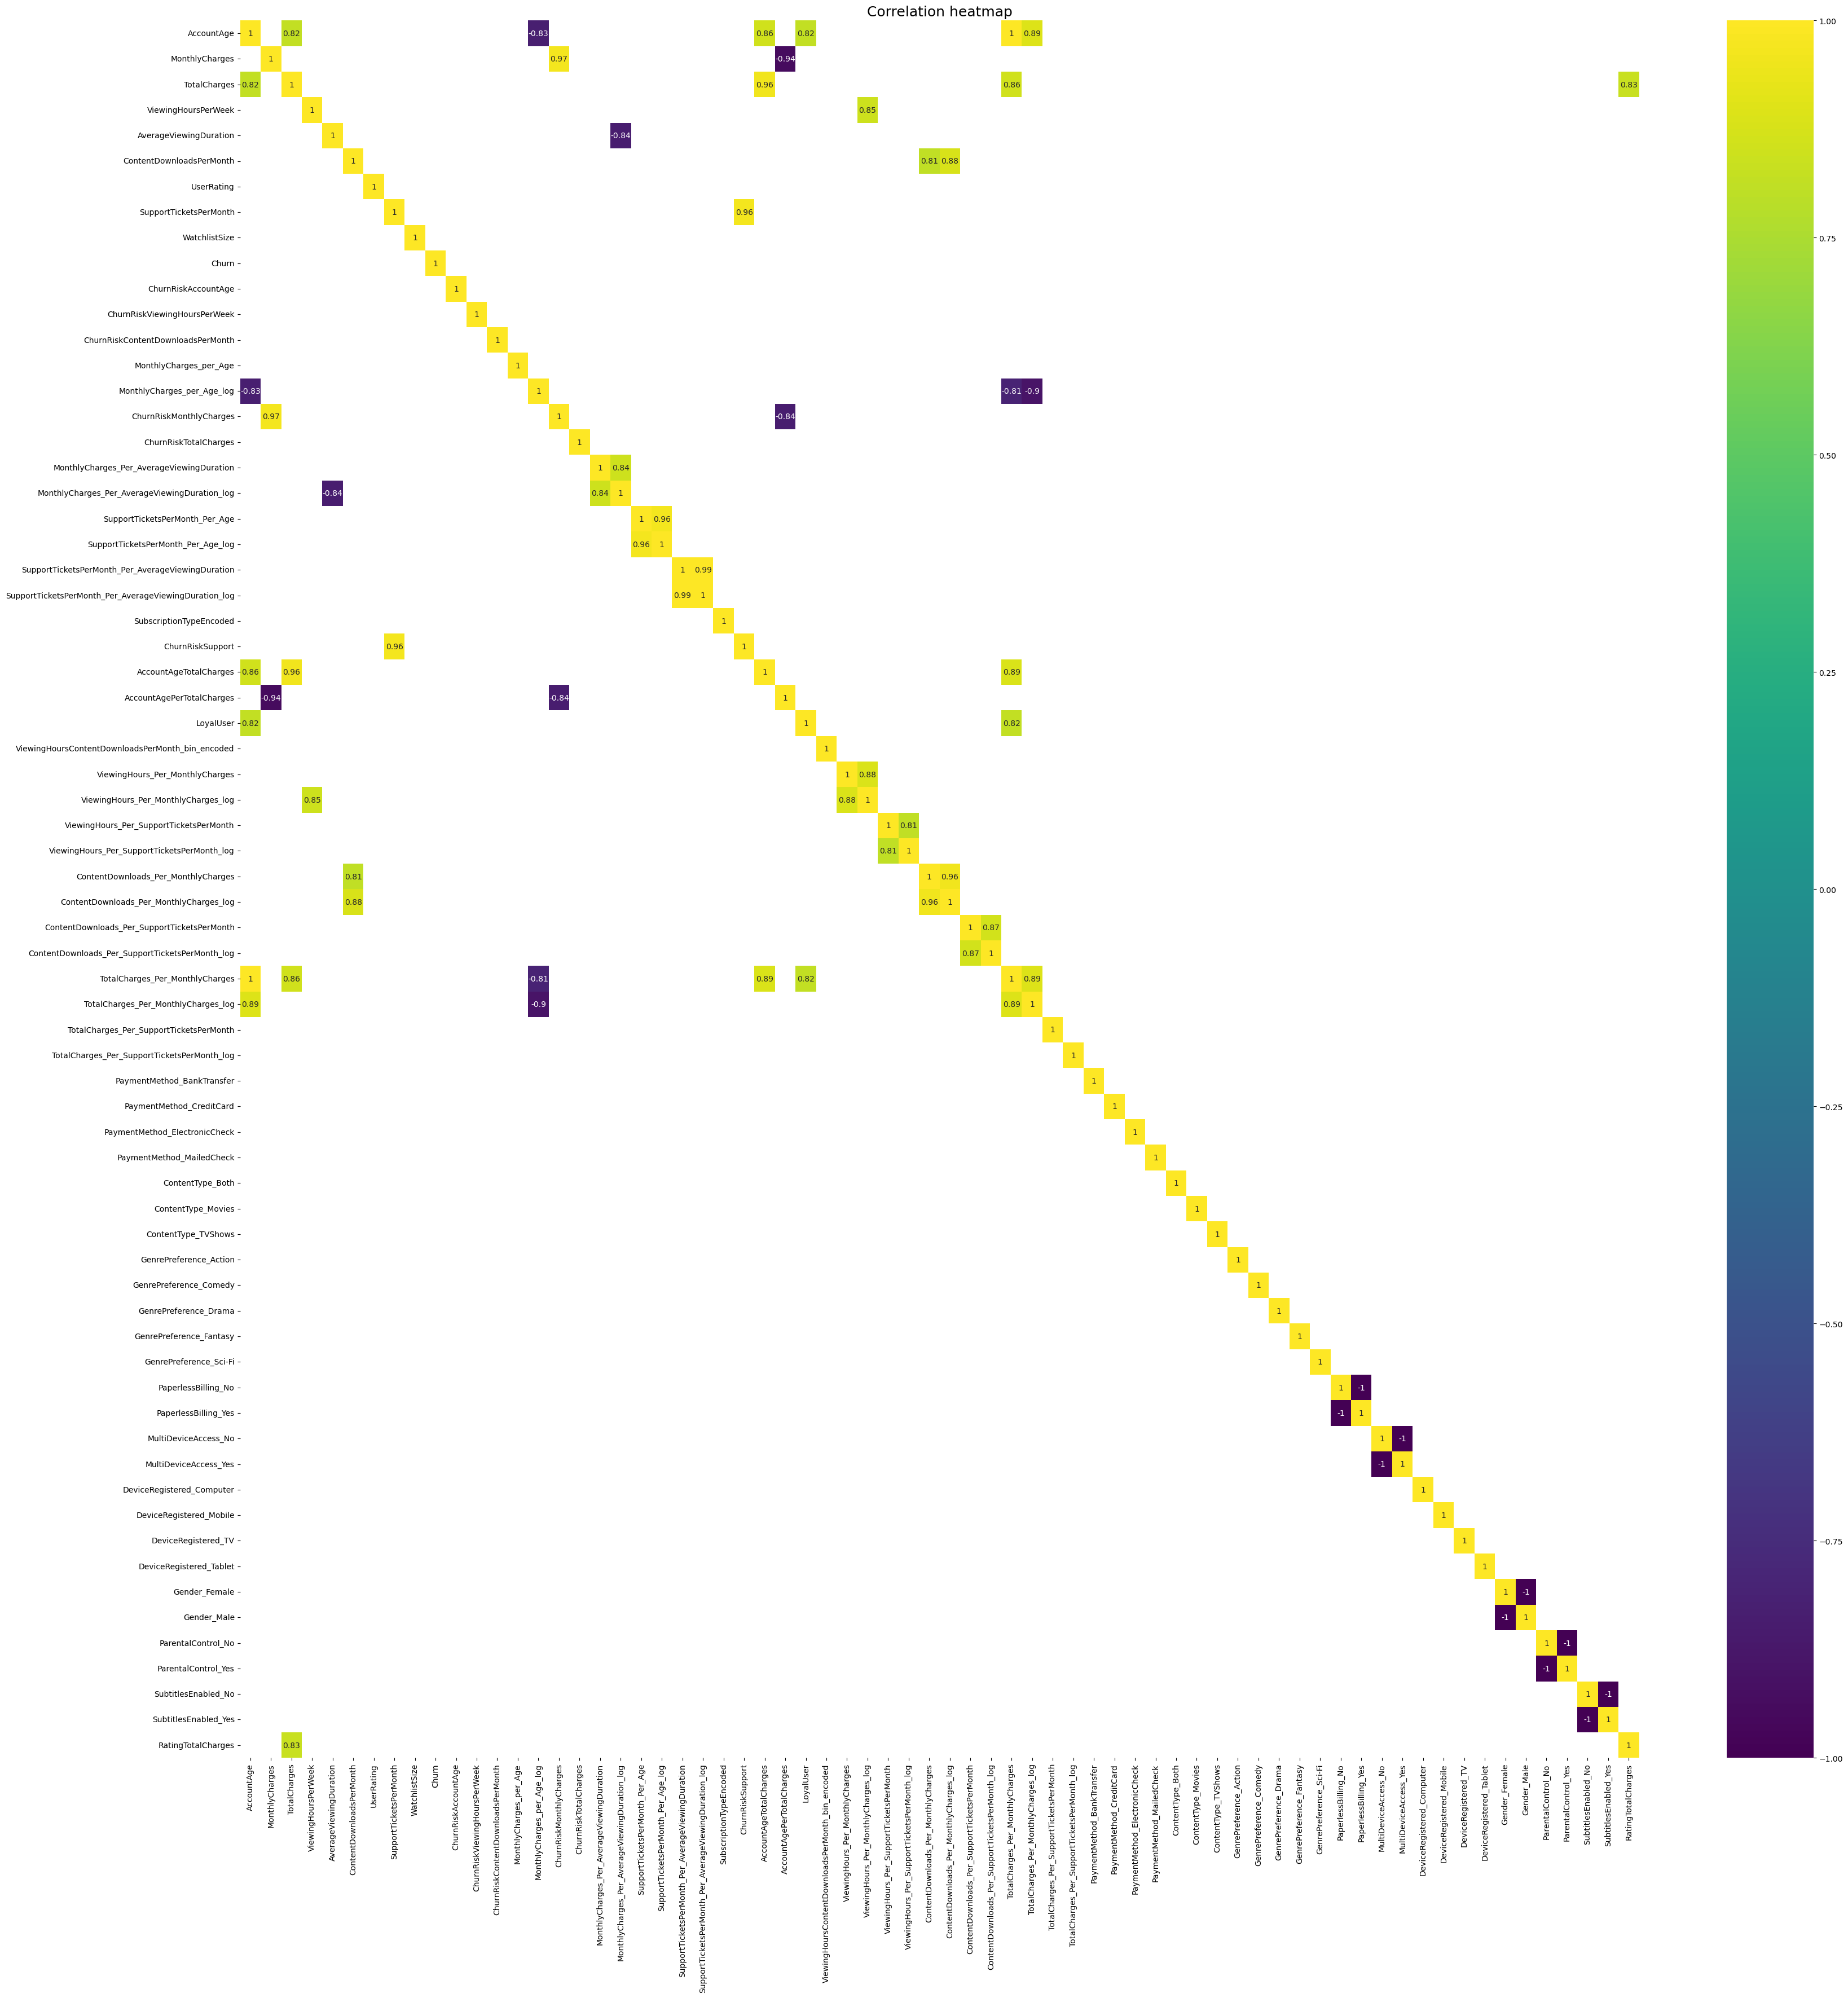

In [899]:
# Show the correlations between potential features
corr_matrix = train_df.corr(method='pearson', numeric_only=True)
filtered_corr_matrix = corr_matrix[abs(corr_matrix) >= 0.8]

plt.figure(figsize=(40,40))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation heatmap', fontsize=18)
plt.show();

In [900]:
# Extract the pairs with correlation above the threshold
threshold = 0.9
correlation_pairs = corr_matrix.stack().reset_index()
correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Filter the pairs based on the threshold
filtered_pairs = correlation_pairs[
    (abs(correlation_pairs['Correlation']) >= threshold) & 
    (correlation_pairs['Feature 1'] != correlation_pairs['Feature 2'])
]

In [901]:
# Export the entire table in CSV file
filtered_pairs.to_csv('filtered_correlations1.csv', index=False)
print("Table exported to 'filtered_correlations1.csv'")

Table exported to 'filtered_correlations1.csv'


The new combined feature 'AccountAgePerTotalCharges' is highly correlated with 'MonthlyCharges' (-0.94), also with 'AvgMonthlyCharges' (-0.94), so I'll drop this feature. I'll also drop 'AvgMonthlyCharges' because it is very highly correlated with 'MonthlyCharges' (1).
Also, the new combined feature 'AccountAgeTotalCharges' is highly correlated with 'TotalCharges' (0.96) and with 'AvgMonthlyCharges' (-0.94). Taking into account that I previously decided to drop 'AvgMonthlyCharges', I'll also drop 'AccountAgeTotalCharges'.

In [903]:
# Drop redundant variables after engineering new ones
# Also drop the variables with no predictive power or redundancy
train_df = train_df.drop(columns=['ChurnLabel', 'AccountAge', 'MonthlyCharges', 'TotalCharges',
                                  'SupportTicketsPerMonth_Per_Age', 'SupportTicketsPerMonth_Per_AverageViewingDuration',
                                  'ContentDownloads_Per_MonthlyCharges', 'PaymentMethod_BankTransfer', 'ContentType_Movies',
                                  'ContentType_TVShows', 'GenrePreference_Drama', 'GenrePreference_Fantasy',
                                  'PaperlessBilling_No', 'PaperlessBilling_Yes', 'MultiDeviceAccess_No', 'MultiDeviceAccess_Yes',
                                  'DeviceRegistered_Computer', 'DeviceRegistered_Tablet', 'DeviceRegistered_Mobile', 'DeviceRegistered_TV',
                                  'Gender_Male', 'Gender_Female', 'ParentalControl_No', 'ParentalControl_Yes', 'AccountAgePerTotalCharges',
                                  'AccountAgeTotalCharges', 'ChurnRiskSupport', 'ChurnRiskMonthlyCharges'])
# ''AvgMonthlyCharges'                                 
# 'SupportChurnRisk',
#                                  'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference',
#                                  'Gender', 'ParentalControl', 'SubtitlesEnabled'])

test_df = test_df.drop(columns=['AccountAge', 'MonthlyCharges', 'TotalCharges',
                                'SupportTicketsPerMonth_Per_Age', 'SupportTicketsPerMonth_Per_AverageViewingDuration',
                                'ContentDownloads_Per_MonthlyCharges', 'PaymentMethod_BankTransfer', 'ContentType_Movies',
                                'ContentType_TVShows', 'GenrePreference_Drama', 'GenrePreference_Fantasy', 'PaperlessBilling_No',
                                'PaperlessBilling_Yes', 'MultiDeviceAccess_No', 'MultiDeviceAccess_Yes', 'DeviceRegistered_Computer',
                                'DeviceRegistered_Tablet', 'DeviceRegistered_Mobile', 'DeviceRegistered_TV', 'Gender_Male', 'Gender_Female',
                                'ParentalControl_No', 'ParentalControl_Yes', 'AccountAgePerTotalCharges', 'AccountAgeTotalCharges',
                                'ChurnRiskSupport', 'ChurnRiskMonthlyCharges'])
#                                'AvgMonthlyCharges', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference',
#                                'Gender', 'ParentalControl', 'SubtitlesEnabled'])


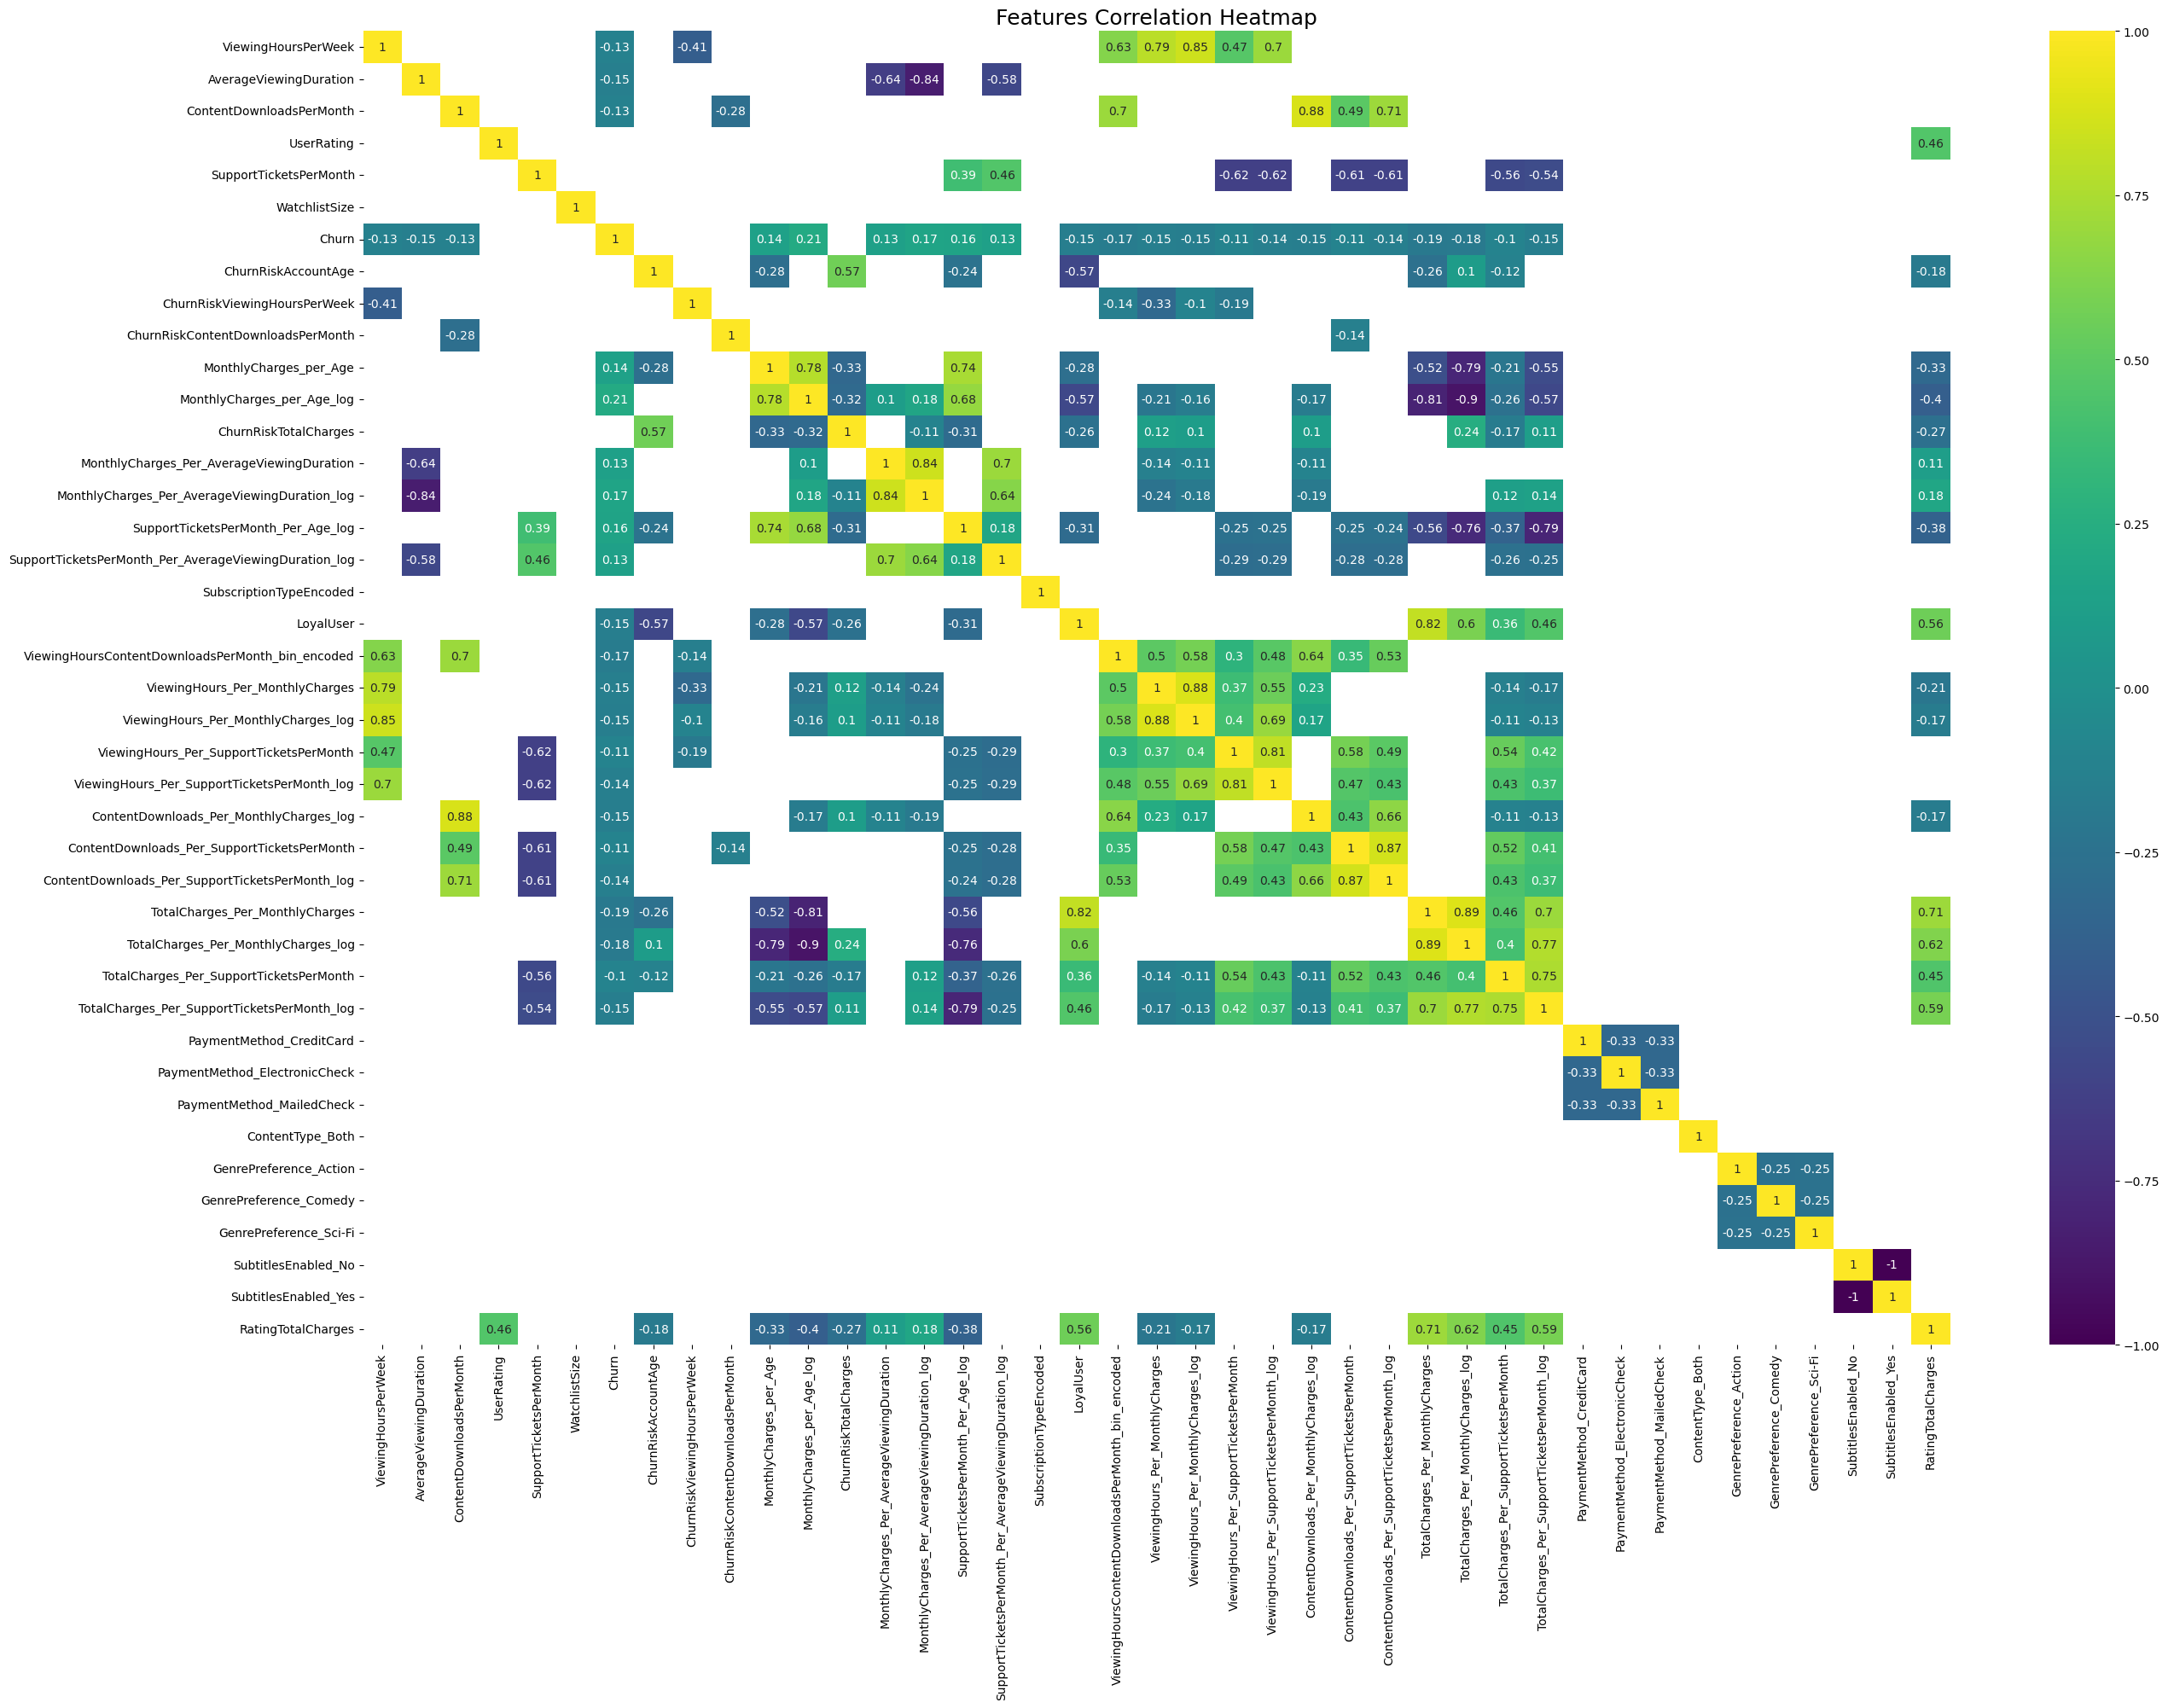

In [1579]:
# Show again the correlations between potential features after dropping highly correlated features 
corr_matrix = train_df.corr(method='pearson', numeric_only=True)
filtered_corr_matrix = corr_matrix[abs(corr_matrix) >= 0.1]

plt.figure(figsize=(30,20))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='viridis')
plt.title('Features Correlation Heatmap', fontsize=18)
plt.show();

In [ ]:
# Extract the pairs with correlation above the threshold
threshold = 0.9
corr_pairs = corr_matrix.stack().reset_index()
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Filter the pairs based on the threshold
filtered_pairs = corr_pairs[
    (abs(corr_pairs['Correlation']) >= threshold) & 
    (corr_pairs['Feature 1'] != corr_pairs['Feature 2'])
]

print(filtered_pairs)

In [1593]:
# Extract the features correlated to churn
threshold = 0.1
corr_pairs = corr_matrix.stack().reset_index()
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Filter the pairs based on the threshold
churn_pairs = corr_pairs[
    (corr_pairs['Feature 2'] == 'Churn') &
    (corr_pairs['Feature 1'] != corr_pairs['Feature 2']) &
    (abs(corr_pairs['Correlation']) >= threshold)
]

print(churn_pairs)

                                                  Feature 1 Feature 2  \
6                                       ViewingHoursPerWeek     Churn   
47                                   AverageViewingDuration     Churn   
88                                 ContentDownloadsPerMonth     Churn   
416                                  MonthlyCharges_per_Age     Churn   
457                              MonthlyCharges_per_Age_log     Churn   
539               MonthlyCharges_Per_AverageViewingDuration     Churn   
580           MonthlyCharges_Per_AverageViewingDuration_log     Churn   
621                      SupportTicketsPerMonth_Per_Age_log     Churn   
662   SupportTicketsPerMonth_Per_AverageViewingDuration_log     Churn   
744                                               LoyalUser     Churn   
785        ViewingHoursContentDownloadsPerMonth_bin_encoded     Churn   
826                         ViewingHours_Per_MonthlyCharges     Churn   
867                     ViewingHours_Per_MonthlyCha

In [1599]:
# Export the entire table in CSV file
churn_pairs.to_csv('churn_correlations.csv', index=False)
print("Table exported to 'churn_correlations.csv'")

Table exported to 'churn_correlations.csv'


In [1597]:
# Check the class balance of the outcome variable 
print(train_df['Churn'].value_counts(normalize=True))


Churn
0    0.818768
1    0.181232
Name: proportion, dtype: float64


The 'churn' class is imbalanced among the training set - 81.9% not churned, and 18.1% churned users. It is prefered to balance it before modeling.

**Select numerical features for scaling**

In [910]:
# Select only numerical features in 'train_df' for scaling
numerical_features_train = train_df.select_dtypes(include=['float64', 'int64']).columns
numerical_features_train = numerical_features_train.drop('Churn')

print('Check for infinities in training set:', np.isinf(train_df[numerical_features_train]).any().any())  # Check for infinities
print('Check for NaNs in training set:', np.isnan(train_df[numerical_features_train]).any().any())  # Check for NaNs

train_df[numerical_features_train] = train_df[numerical_features_train].replace([np.inf, -np.inf], np.nan)
train_df[numerical_features_train] = train_df[numerical_features_train].fillna(train_df[numerical_features_train].mean())  # Replace inf with NaN

print('Check for infinities in training set after replacing:', np.isinf(train_df[numerical_features_train]).any().any())  # Check for infinities
print('Check for NaNs in training set after replacing:', np.isnan(train_df[numerical_features_train]).any().any())  # Check for NaNs

numerical_features_test = test_df.select_dtypes(include=['float64', 'int64']).columns

print('Check for infinities in test set:', np.isinf(test_df[numerical_features_test]).any().any())  # Check for infinities
print('Check for NaNs in test set:', np.isnan(test_df[numerical_features_test]).any().any())  # Check for NaNs

test_df[numerical_features_test] = test_df[numerical_features_test].replace([np.inf, -np.inf], np.nan)
test_df[numerical_features_test] = test_df[numerical_features_test].fillna(test_df[numerical_features_test].mean())  # Replace inf with NaN

print('Check for infinities in testing set ater replacing:', np.isinf(test_df[numerical_features_test]).any().any())  # Check for infinities
print('Check for NaNs in testing set ater replacing:', np.isnan(test_df[numerical_features_test]).any().any())  # Check for NaNs

Check for infinities in training set: False
Check for NaNs in training set: False
Check for infinities in training set after replacing: False
Check for NaNs in training set after replacing: False
Check for infinities in test set: False
Check for NaNs in test set: False
Check for infinities in testing set ater replacing: False
Check for NaNs in testing set ater replacing: False


# **Scaling** #

In [912]:
# Initialize the scaler
scaler = MinMaxScaler()

train_df_scaled = train_df.copy()
test_df_scaled = test_df.copy()

# Apply scaling to numerical features
train_df_scaled[numerical_features_train] = scaler.fit_transform(train_df[numerical_features_train])

# Select only numerical features in 'test_df' for scaling
test_df_scaled[numerical_features_test] = scaler.fit_transform(test_df[numerical_features_test])

X_train = train_df_scaled.copy()
print("X_train:", X_train.shape)

y_train = train_df_scaled['Churn']
print("y_train:", y_train.shape)

X_test = test_df_scaled.copy()
print("X_test:", X_test.shape)


X_train: (243787, 42)
y_train: (243787,)
X_test: (104480, 41)


# **Assigning the predictors and the target variable** #

In [1168]:
# Split the train set into training and validation sets in 57/43 ratio
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.43, random_state=42)

print(X_tr['Churn'].value_counts(normalize=True))
print(X_val['Churn'].value_counts(normalize=True))

X_tr = X_tr.drop(columns=['CustomerID', 'Churn'])
X_val = X_val.drop(columns=['CustomerID', 'Churn'])
X_test = X_test.drop(columns=['CustomerID'])

print("X_tr:", X_tr.shape)
print("y_tr:", y_tr.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)
print("X_test:", X_test.shape)
print()

# Calculate scale_pos_weight
scale_pos_weight = len(y_tr[y_tr == 0]) / len(y_tr[y_tr == 1])
print('scale_pos_weight =', scale_pos_weight)

Churn
0    0.818765
1    0.181235
Name: proportion, dtype: float64
Churn
0    0.818772
1    0.181228
Name: proportion, dtype: float64
X_tr: (138958, 40)
y_tr: (138958,)
X_val: (104829, 40)
y_val: (104829,)
X_test: (104480, 40)

scale_pos_weight = 4.517709656925032


In [1170]:
# Calculate scale_pos_weight
scale_pos_weight = len(y_tr[y_tr == 0]) / len(y_tr[y_tr == 1])
print(scale_pos_weight)
scale_pos_weight1 = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(scale_pos_weight1)
scale_pos_weight2 = len(y_val[y_val == 0]) / len(y_val[y_val == 1])
print(scale_pos_weight2)  

4.517709656925032
4.517790050246707
4.5178966206969156


## Make predictions

Remember you should create a dataframe named `prediction_df` with exactly 104,480 entries plus a header row attempting to predict the likelihood of churn for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `CustomerID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`CustomerID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

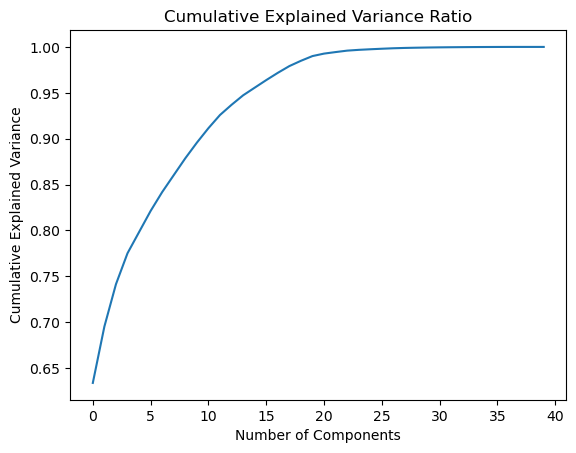

Number of components to reach 1.0 cumulative variance: 38


In [1173]:
#Variance ratio
from sklearn.decomposition import PCA

# Assuming X is your data matrix
pca = PCA()
X_tr_pca = pca.fit_transform(X_tr)
X_val_pca = pca.fit_transform(X_val)
X_test_pca = pca.fit_transform(test_df_scaled.drop(columns=['CustomerID']))

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components where cumulative variance >= 1.0
tolerance = 1e-10  # Allow for small floating-point errors
num_components = np.argmax(cumulative_variance >= 1.0 - tolerance) + 1

# Plot the cumulative explained variance ratio
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Ratio')
plt.show()

print(f"Number of components to reach 1.0 cumulative variance: {num_components}")

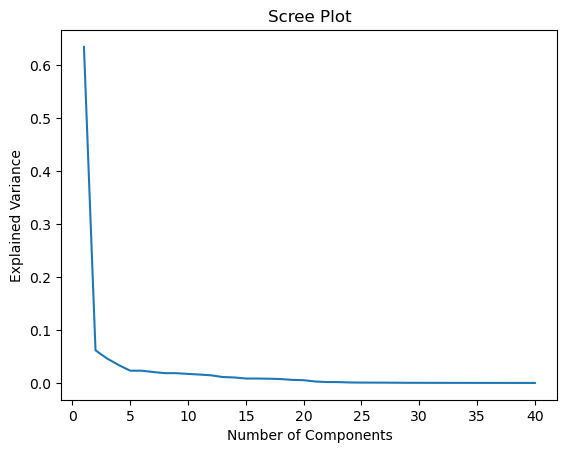

In [1175]:
# Plot the scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

plt.title('Scree Plot')
plt.show()

### Example prediction submission:

The code below is a very naive prediction method that simply predicts churn using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**Dummy Classifier**

In [1179]:
dummy_clf = DummyClassifier(strategy="stratified")

# Fit a dummy classifier on the selected feature columns
dummy_clf.fit(X_tr, y_tr)

# Make predictions on the validation data
predicted_probability = dummy_clf.predict_proba(X_val)[:, 1]

# Calculate the ROC AUC Score
roc_auc = roc_auc_score(y_val, predicted_probability)
print(f"ROC AUC Score for Dummy Classifier: {roc_auc:.4f}")


ROC AUC Score for Dummy Classifier: 0.5001


In [1181]:
# Save the result of the DummyCLassifier model in a DataFrame for future comparison
dummy_clf_result = pd.DataFrame({'Model': 'DummyClassifier val', 'ROC_AUC Score': roc_auc}, index=[0])
dummy_clf_result

Model  ROC_AUC Score
0  DummyClassifier val       0.500101

**Random Forest model**

In [ ]:
# Create RFE with the trained model

#from sklearn.feature_selection import RFE

#X_tr_subset, _, y_tr_subset, _ = train_test_split(X_tr, y_tr, test_size=0.6, random_state=42)

#rfe = RFE(estimator=rf, n_features_to_select=25)


In [ ]:
#%timeit rfe.fit(X_tr_subset, y_tr_subset)

In [ ]:
# Transform the data
#X_tr_rfe = rfe.transform(X_tr)
#X_val_rfe = rfe.transform(X_val)
#print(X_tr_rfe)
#print(X_val_rfe)


In [ ]:
# Get the selected feature indices from RFE
#selected_features = rfe.get_support(indices=True)

# Create a DataFrame using the reduced feature set array and the original feature names
#X_tr_rfe_df = pd.DataFrame(X_tr_rfe, columns=X_tr.columns[selected_features])
#X_val_rfe_df = pd.DataFrame(X_val_rfe, columns=X_val.columns[selected_features])

#print(X_tr_rfe_df.info())
#print(X_val_rfe_df.info())

In [ ]:
#rf = RandomForestClassifier(class_weight="balanced_subsample", n_jobs=-1, random_state=42)

#Create a dictionary of hyperparameters to tune
#cv_params = {'max_depth': [8],
#             'max_features': [0.6],
#             'max_samples': [0.6],
#             'min_samples_leaf': [5],
#             'min_samples_split': [4],
#             'n_estimators': [1000],
#             }
#scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Set up StratifiedKFold with 5 splits
#stratified_kfold = StratifiedKFold(n_splits=5)

# Instantiate the GridSearchCV object
#rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=stratified_kfold, refit='roc_auc', verbose=3)

In [ ]:
#from sklearn.utils.class_weight import compute_sample_weight

# Define the target ratio or calculate sample weights based on your needs
#sample_weights = compute_sample_weight(class_weight={0: 0.6, 1: 1.4}, y=y_tr)

In [ ]:
#%timeit rf_cv.fit(X_tr, y_tr)

In [ ]:


# Make predictions on the training data
#y_rf_pred_tr = rf_cv.best_estimator_.predict(X_tr)

# Make predictions on the validation data
#y_pred_probs = rf_cv.best_estimator_.predict_proba(X_val)[:, 1]

# Predict probabilities on the validation set
#y_rf_pred_proba_val = rf_cv.best_estimator_.predict_proba(X_val)[:, 1]  # Predicted probabilities on the validation set

# Get precision-recall curve
#precisions, recalls, thresholds = precision_recall_curve(y_val, y_rf_pred_proba_val)

#f1_scores = np.zeros_like(thresholds)
#for i in range(len(thresholds)):
#    if precisions[i] + recalls[i] > 0:  # Check if precision + recall is greater than 0
#        f1_scores[i] = 2 * (precisions[i] * recalls[i]) / (precisions[i] + recalls[i])
#    else:
#        f1_scores[i] = 0  # Set to 0 if both precision and recall are 0

#plt.plot(thresholds, precisions[:-1], label="Precision")
#plt.plot(thresholds, recalls[:-1], label="Recall")
#plt.xlabel("Threshold")
#plt.ylabel("Score")
#plt.title("Precision-Recall Curve vs Threshold")
#plt.legend()
#plt.show()

# Find the threshold that gives the highest F1 score
#best_threshold = thresholds[np.argmax(f1_scores)]

#print(f"Best threshold: {best_threshold}")


In [ ]:
# Adjust threshold
#y_rf_pred_val = (y_rf_pred_proba_val >= best_threshold * 0.97).astype(int)  # use the previosly calculated best threshold

#rf_baseline_auc = roc_auc_score(y_val, y_rf_pred_proba_val)

# Calculate permutation importance on the validation set for Random Forest
#rf_permutation_importance = permutation_importance(rf_cv.best_estimator_, X_val, y_val, scoring='roc_auc', n_repeats=10, random_state=42)

# Store the results in a DataFrame and sort by importance
# Random Forest Permutation Importances
#rf_importances_df = pd.DataFrame({'feature': X_val.columns,
#                                  'importance_mean': rf_permutation_importance.importances_mean
#                                  }).sort_values(by='importance_mean', ascending=False)

# Display the results in a sorted format
#print("\nRandom Forest Permutation Importances (Validation Set):")
#print(rf_importances_df.head(50))

#print()
#print()

#print('Random Forest scoring on the training set:')
#print('Accuracy Score:', accuracy_score(y_tr, y_rf_pred_tr))
#print('Precision Score:', precision_score(y_tr, y_rf_pred_tr))
#print('Recall Score:', recall_score(y_tr, y_rf_pred_tr))
#print('F1 Score:', f1_score(y_tr, y_rf_pred_tr))
#print('ROC AUC Score:', roc_auc_score(y_tr, y_rf_pred_tr))
#print()

# Calculate the scores for the Random Forest model on the validation set
#print('Random Forest scoring on the validation set:')
#print('Accuracy Score:', accuracy_score(y_val, y_rf_pred_val))
#print('Precision Score:', precision_score(y_val, y_rf_pred_val))
#print('Recall Score:', recall_score(y_val, y_rf_pred_val))
#print('F1 Score:', f1_score(y_val, y_rf_pred_val))

#print('ROC AUC Score:', roc_auc_score(y_val, y_rf_pred_proba_val))

# Calculate precision, recall, and thresholds for validation set predictions
#precision, recall, thresholds = precision_recall_curve(y_val, y_rf_pred_proba_val)

# Calculate AUC for the Precision-Recall curve
#pr_auc = auc(recall, precision)

# Output the AUC-PR score
#print(f'AUC-PR Score (validation set): {pr_auc}')

In [ ]:
#rf_cv.best_params_

ROC AUC Score for RF model on the validation data is much better than the same score for DummyClassifier on the same data.

In [ ]:
# Save the result of the RF model in a DataFrame for future comparison
#rf_cv_result = pd.DataFrame({'Model': 'RF val', 'ROC_AUC Score': roc_auc_score(y_val, y_rf_pred_proba_val)}, index=[0])

# Join the results from DummyCLassifier and from Random Forest models for comparison
#results = pd.concat([dummy_clf_result, rf_cv_result])
#results

In [ ]:
#rf_importances_df

In [ ]:
# Plot the feature importances as a horizontal bar chart
#plt.figure(figsize=(8, 10))
#for index, value in enumerate(rf_importances_df['importance_mean']):
#    plt.text(value, index, f'{value:.5f}', va='center')  # value is placed at the end of the bar
    
#plt.barh(rf_importances_df['feature'], rf_importances_df['importance_mean'], color='skyblue')

#plt.xlabel('ROC AUC')
#plt.ylabel('Features')
#plt.title('Random Forest Model Feature Importance')
    
#plt.show()

In [ ]:
#Plot Confusion Matrix

# Calculate the confusion matrix
#cm = confusion_matrix(y_val, y_rf_pred_val)

# Create a heatmap visualization
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#plt.xlabel('Predicted')
#plt.ylabel('Actual')
#plt.title('Random Forest Confusion Matrix')
#plt.show()

**LightGBM**

In [ ]:
#!pip install lightgbm

In [1290]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',
    metric='auc',
    scale_pos_weight=scale_pos_weight,
#   is_unbalance=True,
    random_state=42
)

lgbm_params = {
    'learning_rate': [0.005],
    'n_estimators': [1000],
    'max_depth': [5],  # Allow deeper trees
    'num_leaves': [31],  # Increase leaf count for better splits
    'min_child_samples': [50],  # Allow smaller leaf sizes
    'scale_pos_weight': [4.5],  # Handle class imbalance
    'reg_alpha': [0.1],
    'reg_lambda': [0.1],
    'subsample': [0.9],
    'colsample_bytree': [0.9],
    'min_split_gain': [0.0]  # Reduce gain threshold
}

#param_grid = {
#    'num_leaves': [31, 50, 70],
#    'max_depth': [-1, 5, 10],
#    'learning_rate': [0.01, 0.05, 0.1],
#    'n_estimators': [500, 1000],
#    'min_child_weight': [10, 20],
#    'subsample': [0.7, 0.9],
#    'colsample_bytree': [0.7, 0.9]
#}

# Set up StratifiedKFold with 15 splits
stratified_kfold = StratifiedKFold(n_splits=15)

lgbm_cv = GridSearchCV(
    estimator=lgbm,
    param_grid=lgbm_params,
    scoring='roc_auc',
    cv=stratified_kfold,
    verbose=1,
    n_jobs=-1
)


In [ ]:
%timeit lgbm_cv.fit(X_tr, y_tr)

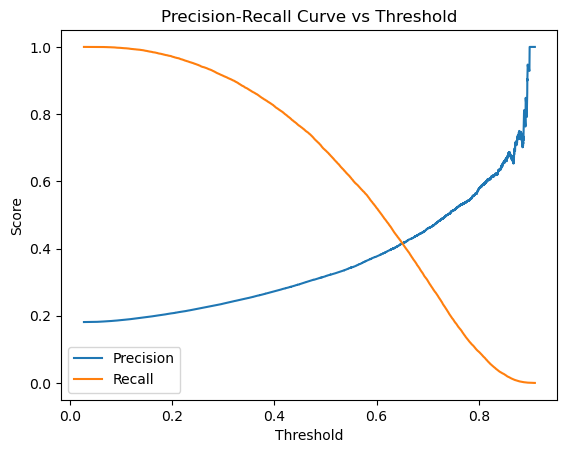

Best threshold: 0.5807259524124455


In [1294]:
# Make predictions on the training data
y_pred_tr = lgbm_cv.best_estimator_.predict(X_tr)

# Predict probabilities on the validation set
y_lgbm_pred_proba_val = lgbm_cv.predict_proba(X_val)[:, 1]  # Predicted probabilities

# Get precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_val, y_lgbm_pred_proba_val)

f1_scores = np.zeros_like(thresholds)
for i in range(len(thresholds)):
    if precisions[i] + recalls[i] > 0:  # Check if precision + recall is greater than 0
        f1_scores[i] = 2 * (precisions[i] * recalls[i]) / (precisions[i] + recalls[i])
    else:
        f1_scores[i] = 0  # Set to 0 if both precision and recall are 0

plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Curve vs Threshold")
plt.legend()
plt.show()

# Find the threshold that gives the highest F1 score
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Best threshold: {best_threshold}")

In [1296]:
# Adjust threshold
y_lgbm_pred_val = (y_lgbm_pred_proba_val >= best_threshold*0.8).astype(int)  # use the previosly calculated best threshold

lgbm_baseline_auc = roc_auc_score(y_val, y_lgbm_pred_proba_val)

#Calculate permutation importance on the validation set for XGBoost
lgbm_permutation_importance = permutation_importance(lgbm_cv.best_estimator_, X_val, y_val, scoring='roc_auc', n_repeats=10, random_state=42)

# Store the results in a DataFrame and sort by importance
# XGBoost Permutation Importances
lgbm_importances_df = pd.DataFrame({'feature': X_val.columns, 'importance_mean': lgbm_permutation_importance.importances_mean}).sort_values(by='importance_mean', ascending=False)

#Display the results in a sorted format
print("\nLightGBM Permutation Importances (Validation Set):")
lgbm_importances_df = lgbm_importances_df.round(6)
print(lgbm_importances_df.head(50))

print()
print()
print(f"Best threshold: {best_threshold}")
print('LightGBM scoring on the training set:')
print('Accuracy Score:', accuracy_score(y_tr, y_pred_tr))
print('Precision Score:', precision_score(y_tr, y_pred_tr))
print('Recall Score:', recall_score(y_tr, y_pred_tr))
print('F1 Score:', f1_score(y_tr, y_pred_tr))
print('ROC AUC Score:', roc_auc_score(y_tr, y_pred_tr))
print()

#Calculate the scores for the LightGBM model on the validation set
print('LightGBM scoring on the validation set:')
print('Accuracy Score:', accuracy_score(y_val, y_lgbm_pred_val))
print('Precision Score:', precision_score(y_val, y_lgbm_pred_val))
print('Recall Score:', recall_score(y_val, y_lgbm_pred_val))
print('F1 Score:', f1_score(y_val, y_lgbm_pred_val))

print('ROC AUC Score:', roc_auc_score(y_val, y_lgbm_pred_proba_val))

# Calculate precision, recall, and thresholds for validation set predictions
precision, recall, thresholds = precision_recall_curve(y_val, y_lgbm_pred_proba_val)

# Calculate AUC for the Precision-Recall curve
pr_auc = auc(recall, precision)
pr_auc = pr_auc.round(7)
# Output the AUC-PR score
print(f'AUC-PR Score (validation set): {pr_auc}')


LightGBM Permutation Importances (Validation Set):
                                                  feature  importance_mean
9                                  MonthlyCharges_per_Age         0.029921
18       ViewingHoursContentDownloadsPerMonth_bin_encoded         0.016564
12              MonthlyCharges_Per_AverageViewingDuration         0.008635
1                                  AverageViewingDuration         0.008502
26                        TotalCharges_Per_MonthlyCharges         0.005202
23                ContentDownloads_Per_MonthlyCharges_log         0.002909
0                                     ViewingHoursPerWeek         0.002781
15  SupportTicketsPerMonth_Per_AverageViewingDuration_log         0.002737
24            ContentDownloads_Per_SupportTicketsPerMonth         0.002656
14                     SupportTicketsPerMonth_Per_Age_log         0.002376
16                                SubscriptionTypeEncoded         0.002033
19                        ViewingHours_Per_Month

In [1298]:
lgbm_cv.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.005,
 'max_depth': 5,
 'min_child_samples': 50,
 'min_split_gain': 0.0,
 'n_estimators': 1000,
 'num_leaves': 31,
 'reg_alpha': 0.1,
 'reg_lambda': 0.1,
 'scale_pos_weight': 4.5,
 'subsample': 0.9}

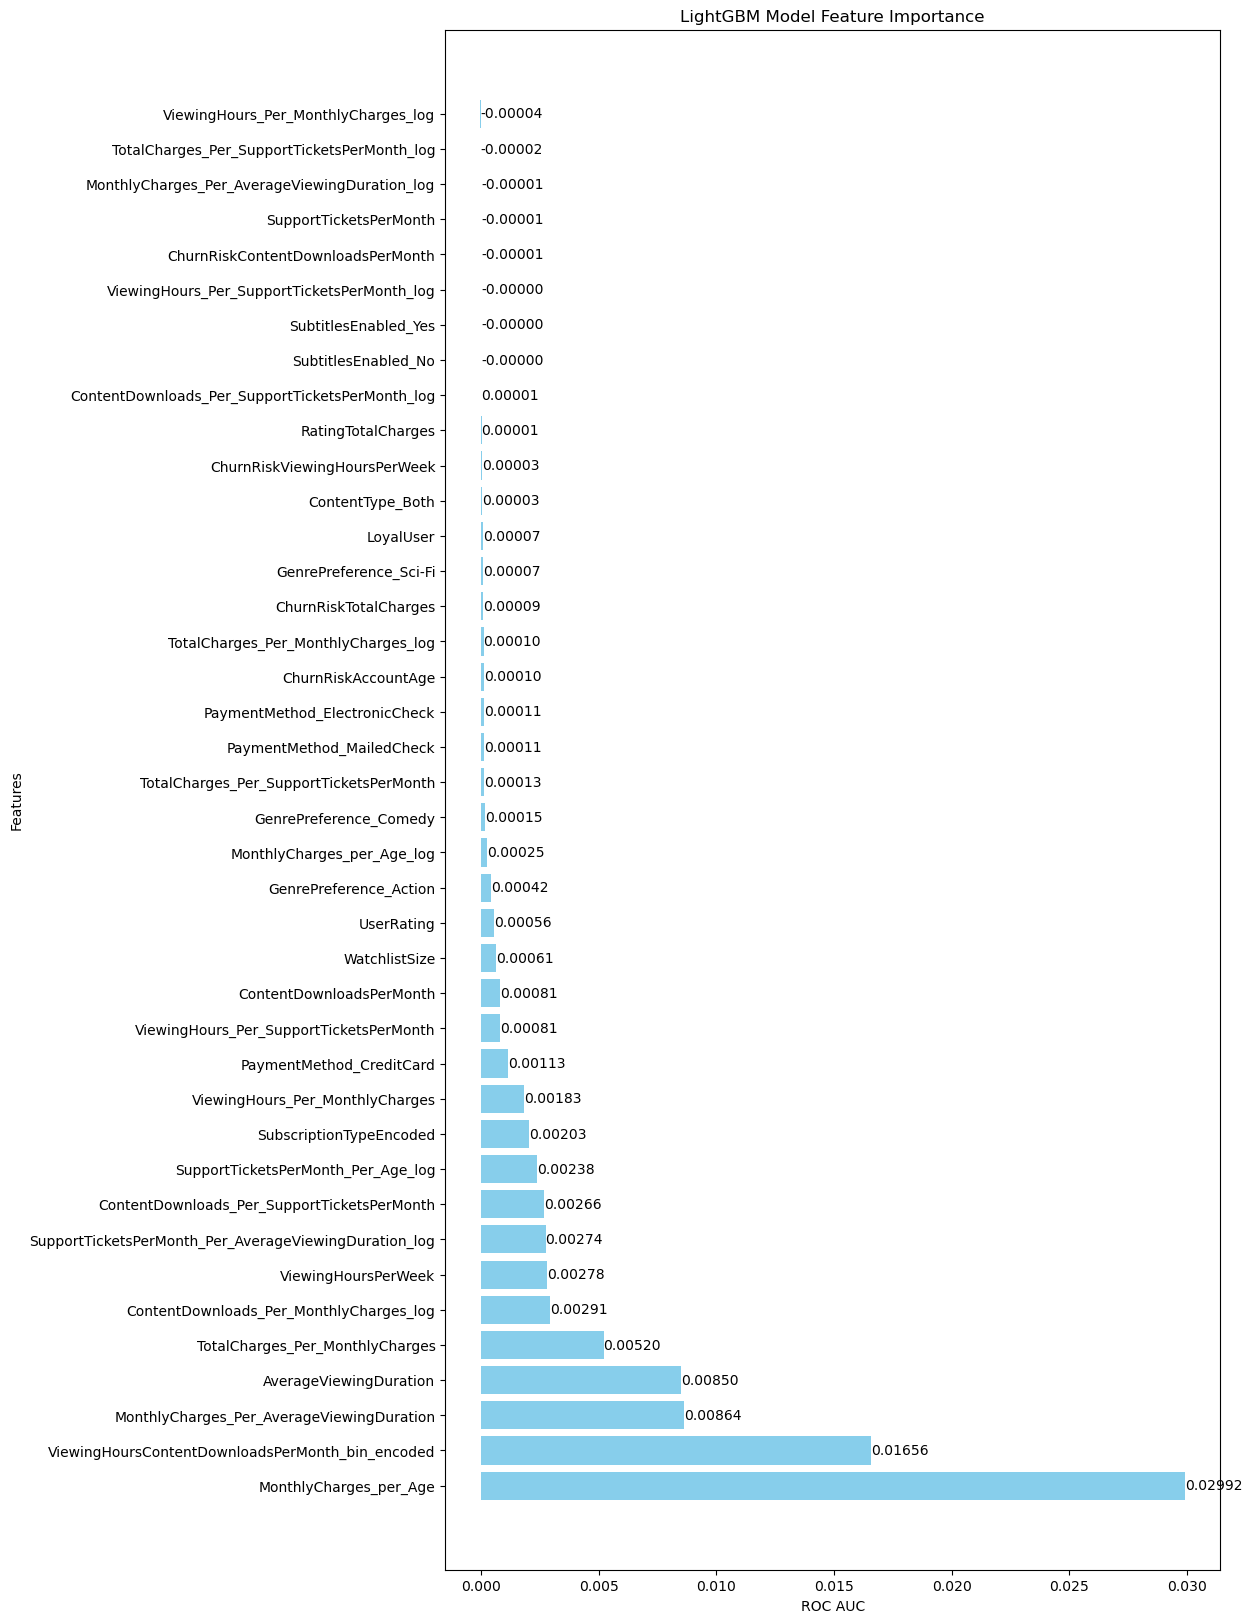

In [1300]:
# Plot the feature importances as a horizontal bar chart
plt.figure(figsize=(10, 20))
for index, value in enumerate(lgbm_importances_df['importance_mean']):
    plt.text(value, index, f'{value:.5f}', va='center')  # value is placed at the end of the bar
    
plt.barh(lgbm_importances_df['feature'], lgbm_importances_df['importance_mean'], color='skyblue')

plt.xlabel('ROC AUC')
plt.ylabel('Features')
plt.title('LightGBM Model Feature Importance')
    
plt.show()

In [1302]:
# Calculate feature variances
selector = VarianceThreshold()
selector.fit(X_tr)
variances = selector.variances_

# Create a DataFrame for variances
variances_df = pd.DataFrame({
    'feature': X_tr.columns,
    'variance': variances
})

variances_sorted_df = variances_df.sort_values(by='variance', ascending=False)
variances_sorted_df


feature  variance
18       ViewingHoursContentDownloadsPerMonth_bin_encoded  6.713178
16                                SubscriptionTypeEncoded  0.664782
37                                    SubtitlesEnabled_No  0.249998
38                                   SubtitlesEnabled_Yes  0.249998
17                                              LoyalUser  0.223274
33                                       ContentType_Both  0.222948
31                          PaymentMethod_ElectronicCheck  0.187987
30                               PaymentMethod_CreditCard  0.187599
32                              PaymentMethod_MailedCheck  0.186617
34                                 GenrePreference_Action  0.160949
35                                 GenrePreference_Comedy  0.160829
36                                 GenrePreference_Sci-Fi  0.158645
8                       ChurnRiskContentDownloadsPerMonth  0.107777
4                                  SupportTicketsPerMonth  0.101553
7                            ChurnRiskViewingHoursPerWeek  0.098735
6                                     ChurnRiskAccountAge  0.093981
11                                  ChurnRiskTotalCharges  0.090566
5                                           WatchlistSize  0.089947
2                                ContentDownloadsPerMonth  0.086522
3                                              UserRating  0.083558
1                                  AverageViewingDuration  0.083301
0                                     ViewingHoursPerWeek  0.083118
26                        TotalCharges_Per_MonthlyCharges  0.078415
23                ContentDownloads_Per_MonthlyCharges_log  0.049168
25        ContentDownloads_Per_SupportTicketsPerMonth_log  0.046974
27                    TotalCharges_Per_MonthlyCharges_log  0.035738
13          MonthlyCharges_Per_AverageViewingDuration_log  0.032488
19                        ViewingHours_Per_MonthlyCharges  0.032398
20                    ViewingHours_Per_MonthlyCharges_log  0.031273
22            ViewingHours_Per_SupportTicketsPerMonth_log  0.031155
21                ViewingHours_Per_SupportTicketsPerMonth  0.030598
24            ContentDownloads_Per_SupportTicketsPerMonth  0.030503
10                             MonthlyCharges_per_Age_log  0.029616
39                                     RatingTotalCharges  0.026263
29            TotalCharges_Per_SupportTicketsPerMonth_log  0.020867
28                TotalCharges_Per_SupportTicketsPerMonth  0.014195
15  SupportTicketsPerMonth_Per_AverageViewingDuration_log  0.012872
14                     SupportTicketsPerMonth_Per_Age_log  0.012695
12              MonthlyCharges_Per_AverageViewingDuration  0.009904
9                                  MonthlyCharges_per_Age  0.007084

In [1304]:
lgbm_importances_df.head(50)

feature  importance_mean
9                                  MonthlyCharges_per_Age         0.029921
18       ViewingHoursContentDownloadsPerMonth_bin_encoded         0.016564
12              MonthlyCharges_Per_AverageViewingDuration         0.008635
1                                  AverageViewingDuration         0.008502
26                        TotalCharges_Per_MonthlyCharges         0.005202
23                ContentDownloads_Per_MonthlyCharges_log         0.002909
0                                     ViewingHoursPerWeek         0.002781
15  SupportTicketsPerMonth_Per_AverageViewingDuration_log         0.002737
24            ContentDownloads_Per_SupportTicketsPerMonth         0.002656
14                     SupportTicketsPerMonth_Per_Age_log         0.002376
16                                SubscriptionTypeEncoded         0.002033
19                        ViewingHours_Per_MonthlyCharges         0.001827
30                               PaymentMethod_CreditCard         0.001131
21                ViewingHours_Per_SupportTicketsPerMonth         0.000810
2                                ContentDownloadsPerMonth         0.000806
5                                           WatchlistSize         0.000612
3                                              UserRating         0.000558
34                                 GenrePreference_Action         0.000421
10                             MonthlyCharges_per_Age_log         0.000254
35                                 GenrePreference_Comedy         0.000153
28                TotalCharges_Per_SupportTicketsPerMonth         0.000129
32                              PaymentMethod_MailedCheck         0.000113
31                          PaymentMethod_ElectronicCheck         0.000108
6                                     ChurnRiskAccountAge         0.000102
27                    TotalCharges_Per_MonthlyCharges_log         0.000096
11                                  ChurnRiskTotalCharges         0.000094
36                                 GenrePreference_Sci-Fi         0.000073
17                                              LoyalUser         0.000070
33                                       ContentType_Both         0.000032
7                            ChurnRiskViewingHoursPerWeek         0.000025
39                                     RatingTotalCharges         0.000011
25        ContentDownloads_Per_SupportTicketsPerMonth_log         0.000009
37                                    SubtitlesEnabled_No        -0.000002
38                                   SubtitlesEnabled_Yes        -0.000003
22            ViewingHours_Per_SupportTicketsPerMonth_log        -0.000003
8                       ChurnRiskContentDownloadsPerMonth        -0.000008
4                                  SupportTicketsPerMonth        -0.000008
13          MonthlyCharges_Per_AverageViewingDuration_log        -0.000012
29            TotalCharges_Per_SupportTicketsPerMonth_log        -0.000017
20                    ViewingHours_Per_MonthlyCharges_log        -0.000037

In [1306]:
# Merge feature importances with variances
combined_df = pd.merge(lgbm_importances_df, variances_df, on='feature', how='inner')

# Sort by importance or variance (optional)
combined_df = combined_df.sort_values(by='importance_mean', ascending=False)


In [1308]:
from sklearn.feature_selection import VarianceThreshold

# Filter features with low variance and low importance
low_variance_threshold = 0.01
low_importance_threshold = 0.00005

filtered_df = combined_df[
    (combined_df['variance'] > low_variance_threshold) &
    (combined_df['importance_mean'] > low_importance_threshold)
]

selected_features = filtered_df['feature'].tolist()
X_tr_filtered = X_tr[selected_features]
X_val_filtered = X_val[selected_features]
X_test_filtered = X_test[selected_features]

print(X_tr_filtered.shape)
print(X_val_filtered.shape)
print(X_test_filtered.shape)

(138958, 26)
(104829, 26)
(104480, 26)


In [ ]:
%timeit lgbm_cv.fit(X_tr_filtered, y_tr)

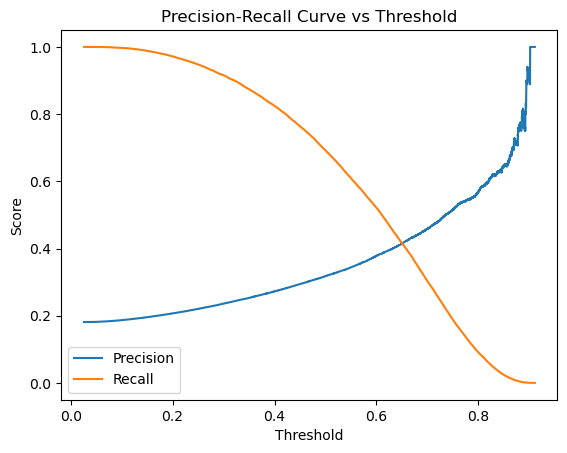

Best threshold: 0.5731361480937304


In [1312]:
# Make predictions on the training data
y_pred_tr = lgbm_cv.best_estimator_.predict(X_tr_filtered)

# Predict probabilities on the validation set
y_lgbm_pred_proba_val = lgbm_cv.predict_proba(X_val_filtered)[:, 1]  # Predicted probabilities

# Get precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_val, y_lgbm_pred_proba_val)

f1_scores = np.zeros_like(thresholds)
for i in range(len(thresholds)):
    if precisions[i] + recalls[i] > 0:  # Check if precision + recall is greater than 0
        f1_scores[i] = 2 * (precisions[i] * recalls[i]) / (precisions[i] + recalls[i])
    else:
        f1_scores[i] = 0  # Set to 0 if both precision and recall are 0

plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Curve vs Threshold")
plt.legend()
plt.show()

# Find the threshold that gives the highest F1 score
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Best threshold: {best_threshold}")

In [1314]:
# Adjust threshold
y_lgbm_pred_val = (y_lgbm_pred_proba_val >= best_threshold*0.8).astype(int)  # use the previosly calculated best threshold


In [1316]:
print(f"Best threshold: {best_threshold}")
print('LightGBM scoring on the training set:')
print('Accuracy Score:', accuracy_score(y_tr, y_pred_tr))
print('Precision Score:', precision_score(y_tr, y_pred_tr))
print('Recall Score:', recall_score(y_tr, y_pred_tr))
print('F1 Score:', f1_score(y_tr, y_pred_tr))
print('ROC AUC Score:', roc_auc_score(y_tr, y_pred_tr))
print()

#Calculate the scores for the LightGBM model on the validation set
print('LightGBM scoring on the validation set:')
print('Accuracy Score:', accuracy_score(y_val, y_lgbm_pred_val))
print('Precision Score:', precision_score(y_val, y_lgbm_pred_val))
print('Recall Score:', recall_score(y_val, y_lgbm_pred_val))
print('F1 Score:', f1_score(y_val, y_lgbm_pred_val))

print('ROC AUC Score:', roc_auc_score(y_val, y_lgbm_pred_proba_val))

# Calculate precision, recall, and thresholds for validation set predictions
precision, recall, thresholds = precision_recall_curve(y_val, y_lgbm_pred_proba_val)

# Calculate AUC for the Precision-Recall curve
pr_auc = auc(recall, precision)

# Output the AUC-PR score
print(f'AUC-PR Score (validation set): {pr_auc}')

Best threshold: 0.5731361480937304
LightGBM scoring on the training set:
Accuracy Score: 0.6820262237510615
Precision Score: 0.3268764691947446
Recall Score: 0.7122776365946633
F1 Score: 0.4481083174079764
ROC AUC Score: 0.6938038384249531

LightGBM scoring on the validation set:
Accuracy Score: 0.6337368476280418
Precision Score: 0.29801945144428016
Recall Score: 0.7532371828613539
F1 Score: 0.42706856673878985
ROC AUC Score: 0.7468344170151342
AUC-PR Score (validation set): 0.3964918838092525


In [1318]:
lgbm_cv.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.005,
 'max_depth': 5,
 'min_child_samples': 50,
 'min_split_gain': 0.0,
 'n_estimators': 1000,
 'num_leaves': 31,
 'reg_alpha': 0.1,
 'reg_lambda': 0.1,
 'scale_pos_weight': 4.5,
 'subsample': 0.9}

In [1320]:
# Save the result of the LightGBM model in a DataFrame for future comparison
lgbm_cv_result = pd.DataFrame({'Model': 'LightGBM val', 'ROC_AUC Score': roc_auc_score(y_val, y_lgbm_pred_proba_val)}, index=[0])


In [1322]:
# Add the result to the results from the other models for comparison
results = pd.concat([dummy_clf_result, lgbm_cv_result])
results

Model  ROC_AUC Score
0  DummyClassifier val       0.500101
0         LightGBM val       0.746834

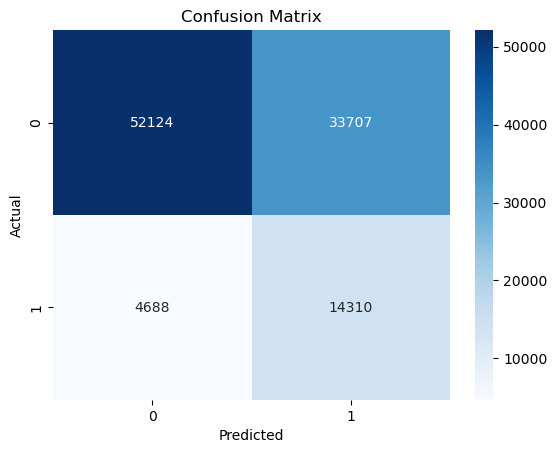

In [1324]:
#Plot Confusion Matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_lgbm_pred_val)

# Create a heatmap visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [1326]:
# Use LightGBM model to predict on test data

y_pred = lgbm_cv.predict(X_test_filtered)  # For classification

y_pred_proba = lgbm_cv.predict_proba(X_test_filtered)[:, 1]  # For probabilities
#y_pred_proba = xgb_cv.predict_proba(X_test_selected)[:, 1]  # For probabilities

print(y_pred_proba)

# Combine predictions with label column into a dataframe
lgbm_prediction_df = pd.DataFrame({'CustomerID': test_df[['CustomerID']].values[:, 0],
                             'predicted_probability': y_pred_proba})

# Ensure 'prediction_df' contains 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(lgbm_prediction_df.shape)
print(lgbm_prediction_df.head())

prediction_df = lgbm_prediction_df

[0.39365053 0.1750147  0.7323767  ... 0.31758845 0.62109828 0.07623642]
(104480, 2)
   CustomerID  predicted_probability
0  O1W6BHP6RM               0.393651
1  LFR4X92X8H               0.175015
2  QM5GBIYODA               0.732377
3  D9RXTK2K9F               0.172807
4  ENTCCHR1LR               0.496580


In [2393]:
# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
print(prediction_df.head(10))


(104480, 2)
   CustomerID  predicted_probability
0  O1W6BHP6RM               0.382495
1  LFR4X92X8H               0.179107
2  QM5GBIYODA               0.746353
3  D9RXTK2K9F               0.190205
4  ENTCCHR1LR               0.478876
5  7A88BB5IO6               0.759408
6  70OMW9XEWR               0.331350
7  EL1RMFMPYL               0.609970
8  4IA2QPT6ZK               0.589233
9  AEDCWHSJDN               0.461781


In [1328]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
prediction_df.to_csv("lgbm8_prediction_submission.csv", index=False)
submission = pd.read_csv("lgbm8_prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [1330]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [1332]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [1334]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

**CatBoost**

In [1185]:
X_tr.head()

ViewingHoursPerWeek  AverageViewingDuration  ContentDownloadsPerMonth  \
13970              0.829375                0.819226                  0.020408   
73154              0.481140                0.977602                  0.183673   
54867              0.956513                0.630870                  0.673469   
185795             0.877609                0.996796                  0.816327   
38810              0.257902                0.888307                  0.530612   

        UserRating  SupportTicketsPerMonth  WatchlistSize  \
13970     0.460611                0.777778       0.000000   
73154     0.954303                0.888889       0.708333   
54867     0.579678                0.444444       1.000000   
185795    0.857265                0.555556       0.375000   
38810     0.334413                0.000000       0.958333   

        ChurnRiskAccountAge  ChurnRiskViewingHoursPerWeek  \
13970              0.950000                      0.000000   
73154              0.555556                      0.963028   
54867              0.027778                      0.000000   
185795             0.700000                      0.000000   
38810              0.000000                      0.538815   

        ChurnRiskContentDownloadsPerMonth  MonthlyCharges_per_Age  ...  \
13970                            0.066667                0.009331  ...   
73154                            0.600000                0.005610  ...   
54867                            0.550000                0.754632  ...   
185795                           0.000000                0.007869  ...   
38810                            0.866667                0.002286  ...   

        PaymentMethod_CreditCard  PaymentMethod_ElectronicCheck  \
13970                        0.0                            0.0   
73154                        0.0                            1.0   
54867                        0.0                            0.0   
185795                       1.0                            0.0   
38810                        0.0                            0.0   

        PaymentMethod_MailedCheck  ContentType_Both  GenrePreference_Action  \
13970                         1.0               0.0                     0.0   
73154                         0.0               0.0                     0.0   
54867                         0.0               0.0                     0.0   
185795                        0.0               0.0                     0.0   
38810                         0.0               1.0                     0.0   

        GenrePreference_Comedy  GenrePreference_Sci-Fi  SubtitlesEnabled_No  \
13970                      1.0                     0.0                  0.0   
73154                      0.0                     0.0                  1.0   
54867                      0.0                     0.0                  1.0   
185795                     0.0                     0.0                  1.0   
38810                      0.0                     0.0                  1.0   

        SubtitlesEnabled_Yes  RatingTotalCharges  
13970                    1.0            0.107496  
73154                    0.0            0.404588  
54867                    0.0            0.003835  
185795                   0.0            0.182507  
38810                    0.0            0.150920  

[5 rows x 40 columns]

In [1348]:
#pip install catboost

In [1183]:
from catboost import CatBoostClassifier

catboost_params = {
    'iterations': [2000],          # Number of boosting iterations
    'learning_rate': [0.003],       # Learning rate
    'depth': [7],                  # Maximum depth of the tree
    'l2_leaf_reg': [10],            # L2 regularization term on weights
    'bagging_temperature': [0.5],
    'border_count': [64]
}

catboost = CatBoostClassifier(loss_function='Logloss', auto_class_weights='Balanced', random_state=42)

# Set up StratifiedKFold with 5 splits
stratified_kfold = StratifiedKFold(n_splits=5)

catboost_cv = GridSearchCV(estimator=catboost, param_grid=catboost_params, scoring='roc_auc', cv=stratified_kfold, verbose=1, n_jobs=-1)


In [ ]:
%timeit catboost_cv.fit(X_tr, y_tr)

In [1189]:
# Display the best parameters and best score
print(f"Best Parameters: {catboost_cv.best_params_}")
print(f"Best ROC AUC Score: {catboost_cv.best_score_:.8f}")

Best Parameters: {'bagging_temperature': 0.5, 'border_count': 64, 'depth': 7, 'iterations': 2000, 'l2_leaf_reg': 10, 'learning_rate': 0.003}
Best ROC AUC Score: 0.74670662


In [1191]:
# Predict probabilities and calculate roc_auc score
y_pred_proba = catboost_cv.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_pred_proba)

print(f"Validation ROC AUC Score: {roc_auc:.9f}")

# Optional: Classification report at a specific threshold
threshold = 0.5
y_pred = (y_pred_proba > threshold).astype(int)
print(classification_report(y_val, y_pred))

Validation ROC AUC Score: 0.747764122
              precision    recall  f1-score   support

           0       0.91      0.67      0.77     85831
           1       0.32      0.70      0.44     18998

    accuracy                           0.68    104829
   macro avg       0.61      0.68      0.60    104829
weighted avg       0.80      0.68      0.71    104829



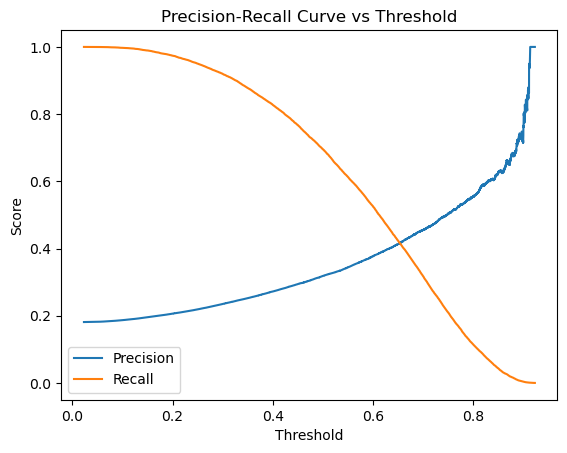

Best threshold: 0.5660376439301832


In [1193]:
# Make predictions on the training data
y_pred_tr = catboost_cv.best_estimator_.predict(X_tr)

# Predict probabilities on the validation set
y_catboost_pred_proba_val = catboost_cv.predict_proba(X_val)[:, 1]  # Predicted probabilities

# Get precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_val, y_catboost_pred_proba_val)

f1_scores = np.zeros_like(thresholds)
for i in range(len(thresholds)):
    if precisions[i] + recalls[i] > 0:  # Check if precision + recall is greater than 0
        f1_scores[i] = 2 * (precisions[i] * recalls[i]) / (precisions[i] + recalls[i])
    else:
        f1_scores[i] = 0  # Set to 0 if both precision and recall are 0

plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Curve vs Threshold")
plt.legend()
plt.show()

# Find the threshold that gives the highest F1 score
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Best threshold: {best_threshold}")

In [1195]:
# Adjust threshold
y_catboost_pred_val = (y_catboost_pred_proba_val >= best_threshold*0.8).astype(int)  # use the previosly calculated best threshold

catboost_baseline_auc = roc_auc_score(y_val, y_catboost_pred_proba_val)

#Calculate permutation importance on the validation set for CatBoost
catboost_permutation_importance = permutation_importance(catboost_cv.best_estimator_, X_val, y_val, scoring='roc_auc', n_repeats=10, random_state=42)

# Store the results in a DataFrame and sort by importance
# CatBoost Permutation Importances
catboost_importances_df = pd.DataFrame({'feature': X_val.columns, 'importance_mean': catboost_permutation_importance.importances_mean}).sort_values(by='importance_mean', ascending=False)

#Display the results in a sorted format
print("\nCatBoost Permutation Importances (Validation Set):")
catboost_importances_df = catboost_importances_df.round(6)
print(catboost_importances_df.head(50))

print()
print()
print(f"Best threshold: {best_threshold}")
print('CatBoost scoring on the training set:')
print('Accuracy Score:', accuracy_score(y_tr, y_pred_tr))
print('Precision Score:', precision_score(y_tr, y_pred_tr))
print('Recall Score:', recall_score(y_tr, y_pred_tr))
print('F1 Score:', f1_score(y_tr, y_pred_tr))
print('ROC AUC Score:', roc_auc_score(y_tr, y_pred_tr))
print()

#Calculate the scores for the CatBoost model on the validation set
print('CatBoost scoring on the validation set:')
print('Accuracy Score:', accuracy_score(y_val, y_catboost_pred_val))
print('Precision Score:', precision_score(y_val, y_catboost_pred_val))
print('Recall Score:', recall_score(y_val, y_catboost_pred_val))
print('F1 Score:', f1_score(y_val, y_catboost_pred_val))

print('ROC AUC Score:', roc_auc_score(y_val, y_catboost_pred_proba_val))

# Calculate precision, recall, and thresholds for validation set predictions
precision, recall, thresholds = precision_recall_curve(y_val, y_catboost_pred_proba_val)

# Calculate AUC for the Precision-Recall curve
pr_auc = auc(recall, precision)
pr_auc = pr_auc.round(7)
# Output the AUC-PR score
print(f'AUC-PR Score (validation set): {pr_auc}')


CatBoost Permutation Importances (Validation Set):
                                                  feature  importance_mean
18       ViewingHoursContentDownloadsPerMonth_bin_encoded         0.010387
1                                  AverageViewingDuration         0.006886
10                             MonthlyCharges_per_Age_log         0.005673
9                                  MonthlyCharges_per_Age         0.005445
13          MonthlyCharges_Per_AverageViewingDuration_log         0.002991
12              MonthlyCharges_Per_AverageViewingDuration         0.002928
23                ContentDownloads_Per_MonthlyCharges_log         0.002746
26                        TotalCharges_Per_MonthlyCharges         0.002443
16                                SubscriptionTypeEncoded         0.002213
27                    TotalCharges_Per_MonthlyCharges_log         0.001906
15  SupportTicketsPerMonth_Per_AverageViewingDuration_log         0.001556
0                                     ViewingHou

In [1197]:
catboost_cv.best_params_

{'bagging_temperature': 0.5,
 'border_count': 64,
 'depth': 7,
 'iterations': 2000,
 'l2_leaf_reg': 10,
 'learning_rate': 0.003}

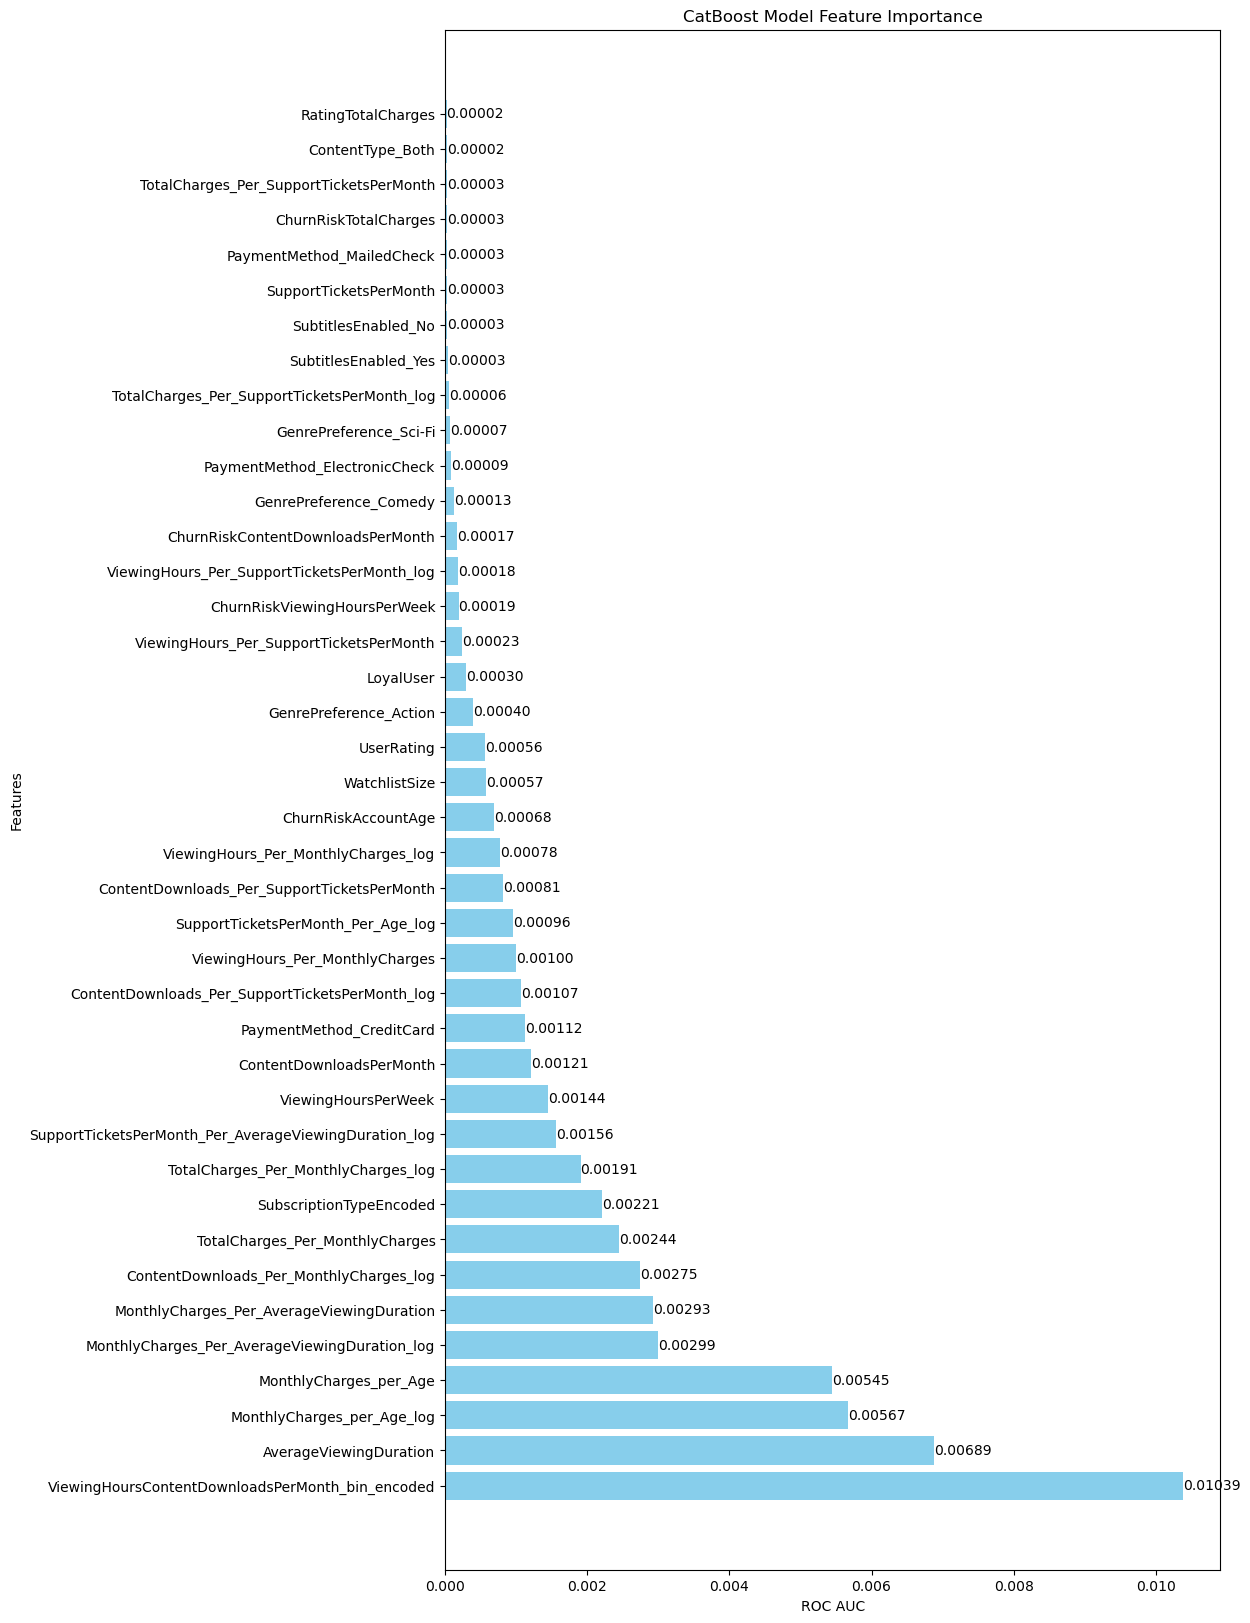

In [1199]:
# Plot the feature importances as a horizontal bar chart
plt.figure(figsize=(10, 20))
for index, value in enumerate(catboost_importances_df['importance_mean']):
    plt.text(value, index, f'{value:.5f}', va='center')  # value is placed at the end of the bar
    
plt.barh(catboost_importances_df['feature'], catboost_importances_df['importance_mean'], color='skyblue')

plt.xlabel('ROC AUC')
plt.ylabel('Features')
plt.title('CatBoost Model Feature Importance')
    
plt.show()

In [1203]:
# Calculate feature variances
selector = VarianceThreshold()
selector.fit(X_tr)
variances = selector.variances_

# Create a DataFrame for variances
variances_df = pd.DataFrame({
    'feature': X_tr.columns,
    'variance': variances
})

variances_sorted_df = variances_df.sort_values(by='variance', ascending=False)
variances_sorted_df


feature  variance
18       ViewingHoursContentDownloadsPerMonth_bin_encoded  6.713178
16                                SubscriptionTypeEncoded  0.664782
37                                    SubtitlesEnabled_No  0.249998
38                                   SubtitlesEnabled_Yes  0.249998
17                                              LoyalUser  0.223274
33                                       ContentType_Both  0.222948
31                          PaymentMethod_ElectronicCheck  0.187987
30                               PaymentMethod_CreditCard  0.187599
32                              PaymentMethod_MailedCheck  0.186617
34                                 GenrePreference_Action  0.160949
35                                 GenrePreference_Comedy  0.160829
36                                 GenrePreference_Sci-Fi  0.158645
8                       ChurnRiskContentDownloadsPerMonth  0.107777
4                                  SupportTicketsPerMonth  0.101553
7                            ChurnRiskViewingHoursPerWeek  0.098735
6                                     ChurnRiskAccountAge  0.093981
11                                  ChurnRiskTotalCharges  0.090566
5                                           WatchlistSize  0.089947
2                                ContentDownloadsPerMonth  0.086522
3                                              UserRating  0.083558
1                                  AverageViewingDuration  0.083301
0                                     ViewingHoursPerWeek  0.083118
26                        TotalCharges_Per_MonthlyCharges  0.078415
23                ContentDownloads_Per_MonthlyCharges_log  0.049168
25        ContentDownloads_Per_SupportTicketsPerMonth_log  0.046974
27                    TotalCharges_Per_MonthlyCharges_log  0.035738
13          MonthlyCharges_Per_AverageViewingDuration_log  0.032488
19                        ViewingHours_Per_MonthlyCharges  0.032398
20                    ViewingHours_Per_MonthlyCharges_log  0.031273
22            ViewingHours_Per_SupportTicketsPerMonth_log  0.031155
21                ViewingHours_Per_SupportTicketsPerMonth  0.030598
24            ContentDownloads_Per_SupportTicketsPerMonth  0.030503
10                             MonthlyCharges_per_Age_log  0.029616
39                                     RatingTotalCharges  0.026263
29            TotalCharges_Per_SupportTicketsPerMonth_log  0.020867
28                TotalCharges_Per_SupportTicketsPerMonth  0.014195
15  SupportTicketsPerMonth_Per_AverageViewingDuration_log  0.012872
14                     SupportTicketsPerMonth_Per_Age_log  0.012695
12              MonthlyCharges_Per_AverageViewingDuration  0.009904
9                                  MonthlyCharges_per_Age  0.007084

In [1205]:
# Merge feature importances with variances
combined_df = pd.merge(catboost_importances_df, variances_df, on='feature', how='inner')

# Sort by importance or variance (optional)
combined_df = combined_df.sort_values(by='importance_mean', ascending=False)


In [1207]:
# Filter features with low variance and low importance
low_variance_threshold = 0.005
low_importance_threshold = 0.0001

filtered_df = combined_df[
    (combined_df['variance'] > low_variance_threshold) &
    (combined_df['importance_mean'] > low_importance_threshold)
]

selected_features = filtered_df['feature'].tolist()
X_tr_filtered = X_tr[selected_features]
X_val_filtered = X_val[selected_features]
X_test_filtered = X_test[selected_features]

print(X_tr_filtered.shape)
print(X_val_filtered.shape)
print(X_test_filtered.shape)


(138958, 29)
(104829, 29)
(104480, 29)


In [ ]:
%timeit catboost_cv.fit(X_tr_filtered, y_tr)

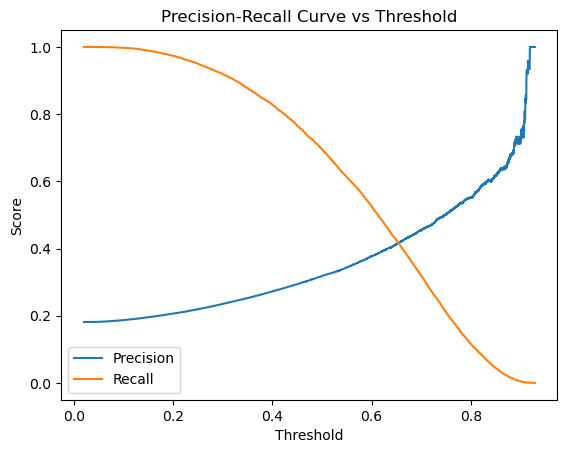

Best threshold: 0.5752566690514594


In [1229]:
# Make predictions on the training data
y_pred_tr = catboost_cv.best_estimator_.predict(X_tr_filtered)

# Predict probabilities on the validation set
y_catboost_pred_proba_val = catboost_cv.predict_proba(X_val_filtered)[:, 1]  # Predicted probabilities

# Get precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_val, y_catboost_pred_proba_val)

f1_scores = np.zeros_like(thresholds)
for i in range(len(thresholds)):
    if precisions[i] + recalls[i] > 0:  # Check if precision + recall is greater than 0
        f1_scores[i] = 2 * (precisions[i] * recalls[i]) / (precisions[i] + recalls[i])
    else:
        f1_scores[i] = 0  # Set to 0 if both precision and recall are 0

plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Curve vs Threshold")
plt.legend()
plt.show()

# Find the threshold that gives the highest F1 score
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Best threshold: {best_threshold}")

In [1231]:
# Adjust threshold
y_catboost_pred_val = (y_catboost_pred_proba_val >= best_threshold*0.80).astype(int)  # use the previosly calculated best threshold


In [1233]:
print(f"Best threshold: {best_threshold}")
print('CatBoost scoring on the training set:')
print('Accuracy Score:', accuracy_score(y_tr, y_pred_tr))
print('Precision Score:', precision_score(y_tr, y_pred_tr))
print('Recall Score:', recall_score(y_tr, y_pred_tr))
print('F1 Score:', f1_score(y_tr, y_pred_tr))
print('ROC AUC Score:', roc_auc_score(y_tr, y_pred_tr))
print()

#Calculate the scores for the CatBoost model on the validation set
print('CatBoost scoring on the validation set:')
print('Accuracy Score:', accuracy_score(y_val, y_catboost_pred_val))
print('Precision Score:', precision_score(y_val, y_catboost_pred_val))
print('Recall Score:', recall_score(y_val, y_catboost_pred_val))
print('F1 Score:', f1_score(y_val, y_catboost_pred_val))

print('ROC AUC Score:', roc_auc_score(y_val, y_catboost_pred_proba_val))

# Calculate precision, recall, and thresholds for validation set predictions
precision, recall, thresholds = precision_recall_curve(y_val, y_catboost_pred_proba_val)

# Calculate AUC for the Precision-Recall curve
pr_auc = auc(recall, precision)

# Output the AUC-PR score
print(f'AUC-PR Score (validation set): {pr_auc}')

Best threshold: 0.5752566690514594
CatBoost scoring on the training set:
Accuracy Score: 0.6779242648857928
Precision Score: 0.3224014954899363
Recall Score: 0.7053684879288437
F1 Score: 0.44253453408567195
ROC AUC Score: 0.6886089719339051

CatBoost scoring on the validation set:
Accuracy Score: 0.6350151198618703
Precision Score: 0.2987609953824617
Recall Score: 0.7526581745446889
F1 Score: 0.42773598169281624
ROC AUC Score: 0.7477456019788746
AUC-PR Score (validation set): 0.3975396957315075


In [1235]:
catboost_cv.best_params_

{'bagging_temperature': 0.5,
 'border_count': 64,
 'depth': 7,
 'iterations': 2000,
 'l2_leaf_reg': 10,
 'learning_rate': 0.003}

In [1340]:
# Save the result of the CatBoost model in a DataFrame for future comparison
catboost_cv_result = pd.DataFrame({'Model': 'CatBoost val', 'ROC_AUC Score': roc_auc_score(y_val, y_catboost_pred_proba_val)}, index=[0])


In [1342]:
# Add the result to the results from the other models for comparison
results = pd.concat([dummy_clf_result, lgbm_cv_result, catboost_cv_result])
results

Model  ROC_AUC Score
0  DummyClassifier val       0.500101
0         LightGBM val       0.746834
0         CatBoost val       0.747746

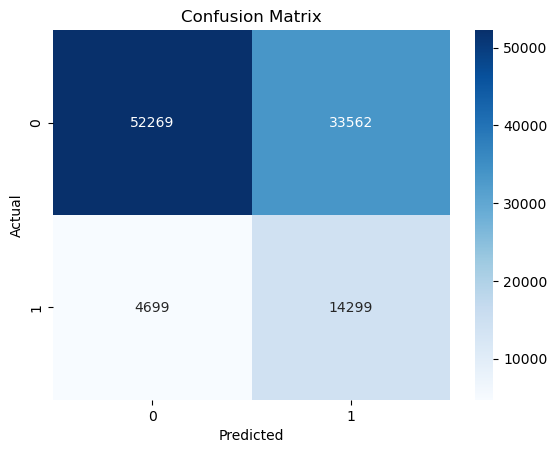

In [1344]:
#Plot Confusion Matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_catboost_pred_val)

# Create a heatmap visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [1239]:
# Use CatBoost model to predict on test data

y_pred = catboost_cv.predict(X_test_filtered)  # For classification
#y_pred = catboost_cv.predict(X_test)  # For classification

y_pred_proba = catboost_cv.predict_proba(X_test_filtered)[:, 1]  # For probabilities
#y_pred_proba = catboost_cv.predict_proba(X_test)[:, 1]  # For probabilities

#y_pred_proba = xgb_cv.predict_proba(X_test_selected)[:, 1]  # For probabilities

print(y_pred_proba)

# Combine predictions with label column into a dataframe
catboost_prediction_df = pd.DataFrame({'CustomerID': test_df[['CustomerID']].values[:, 0],
                             'predicted_probability': y_pred_proba})

# Ensure 'prediction_df' contains 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(catboost_prediction_df.shape)
print(catboost_prediction_df.head())

prediction_df = catboost_prediction_df

[0.3570056  0.17308818 0.73933146 ... 0.34836688 0.66870728 0.07367291]
(104480, 2)
   CustomerID  predicted_probability
0  O1W6BHP6RM               0.357006
1  LFR4X92X8H               0.173088
2  QM5GBIYODA               0.739331
3  D9RXTK2K9F               0.148575
4  ENTCCHR1LR               0.469433


In [1241]:
# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
print(prediction_df.head(10))


(104480, 2)
   CustomerID  predicted_probability
0  O1W6BHP6RM               0.357006
1  LFR4X92X8H               0.173088
2  QM5GBIYODA               0.739331
3  D9RXTK2K9F               0.148575
4  ENTCCHR1LR               0.469433
5  7A88BB5IO6               0.776912
6  70OMW9XEWR               0.350459
7  EL1RMFMPYL               0.635094
8  4IA2QPT6ZK               0.549789
9  AEDCWHSJDN               0.449913


In [1243]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
prediction_df.to_csv("catboost14_prediction_submission.csv", index=False)
submission = pd.read_csv("catboost14_prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [1245]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [1247]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [1249]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

**XGBoost model**

In [1251]:
# Create a dictionary of hyperparameters to tune
cv_params = {
    'learning_rate': [0.01],
    'subsample': [0.5],
    'max_delta_step': [1],
    'max_depth': [4],
    'min_child_weight': [80],
    'n_estimators': [1200],
    'colsample_bytree': [0.85],
    'colsample_bylevel': [0.85],
    'reg_alpha': [0.05],
    'reg_lambda': [0.05],
}

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Train a new XGBoost model with only the selected features
xgb = XGBClassifier(scale_pos_weight=5, eval_metric='auc',
                    objective='binary:logistic', random_state=42)


# Set up StratifiedKFold with 10 splits
stratified_kfold = StratifiedKFold(n_splits=10)

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=stratified_kfold, refit='roc_auc', verbose=3)


In [1253]:
%timeit xgb_cv.fit(X_tr, y_tr)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END colsample_bylevel=0.85, colsample_bytree=0.85, learning_rate=0.01, max_delta_step=1, max_depth=4, min_child_weight=80, n_estimators=1200, reg_alpha=0.05, reg_lambda=0.05, subsample=0.5; accuracy: (test=0.645) f1: (test=0.423) precision: (test=0.300) recall: (test=0.718) roc_auc: (test=0.739) total time=  16.5s
[CV 2/10] END colsample_bylevel=0.85, colsample_bytree=0.85, learning_rate=0.01, max_delta_step=1, max_depth=4, min_child_weight=80, n_estimators=1200, reg_alpha=0.05, reg_lambda=0.05, subsample=0.5; accuracy: (test=0.647) f1: (test=0.430) precision: (test=0.304) recall: (test=0.732) roc_auc: (test=0.748) total time=  16.9s
[CV 3/10] END colsample_bylevel=0.85, colsample_bytree=0.85, learning_rate=0.01, max_delta_step=1, max_depth=4, min_child_weight=80, n_estimators=1200, reg_alpha=0.05, reg_lambda=0.05, subsample=0.5; accuracy: (test=0.658) f1: (test=0.437) precision: (test=0.311) recall: (test=0.733) ro

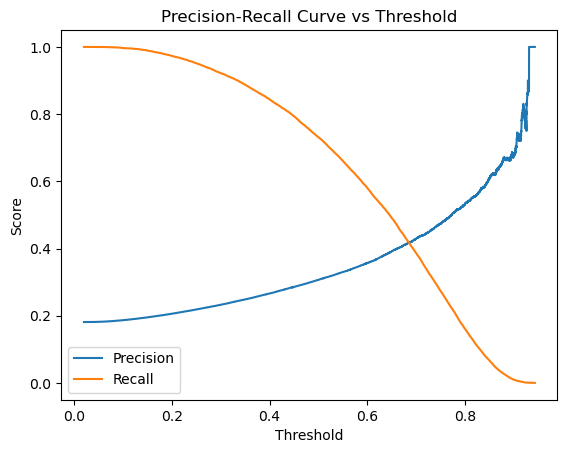

Best threshold: 0.5973036289215088


In [1255]:
# Make predictions on the training data
y_pred_tr = xgb_cv.best_estimator_.predict(X_tr)

# Predict probabilities on the validation set
y_xgb_pred_proba_val = xgb_cv.predict_proba(X_val)[:, 1]  # Predicted probabilities

# Get precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_val, y_xgb_pred_proba_val)

f1_scores = np.zeros_like(thresholds)
for i in range(len(thresholds)):
    if precisions[i] + recalls[i] > 0:  # Check if precision + recall is greater than 0
        f1_scores[i] = 2 * (precisions[i] * recalls[i]) / (precisions[i] + recalls[i])
    else:
        f1_scores[i] = 0  # Set to 0 if both precision and recall are 0

plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Curve vs Threshold")
plt.legend()
plt.show()

# Find the threshold that gives the highest F1 score
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Best threshold: {best_threshold}")

In [1257]:
# Adjust threshold
y_xgb_pred_val = (y_xgb_pred_proba_val >= best_threshold*0.8).astype(int)  # use the previosly calculated best threshold

xgb_baseline_auc = roc_auc_score(y_val, y_xgb_pred_proba_val)

#Calculate permutation importance on the validation set for XGBoost
xgb_permutation_importance = permutation_importance(xgb_cv.best_estimator_, X_val, y_val, scoring='roc_auc', n_repeats=10, random_state=42)

# Store the results in a DataFrame and sort by importance
# XGBoost Permutation Importances
xgb_importances_df = pd.DataFrame({'feature': X_val.columns, 'importance_mean': xgb_permutation_importance.importances_mean}).sort_values(by='importance_mean', ascending=False)

#Display the results in a sorted format
print("\nXGBoost Permutation Importances (Validation Set):")
print(xgb_importances_df.head(50))

print()
print()
print(f"Best threshold: {best_threshold}")
print('XGBoost scoring on the training set:')
print('Accuracy Score:', accuracy_score(y_tr, y_pred_tr))
print('Precision Score:', precision_score(y_tr, y_pred_tr))
print('Recall Score:', recall_score(y_tr, y_pred_tr))
print('F1 Score:', f1_score(y_tr, y_pred_tr))
print('ROC AUC Score:', roc_auc_score(y_tr, y_pred_tr))
print()

#Calculate the scores for the XGBoost model on the validation set
print('XGBoost scoring on the validation set:')
print('Accuracy Score:', accuracy_score(y_val, y_xgb_pred_val))
print('Precision Score:', precision_score(y_val, y_xgb_pred_val))
print('Recall Score:', recall_score(y_val, y_xgb_pred_val))
print('F1 Score:', f1_score(y_val, y_xgb_pred_val))

print('ROC AUC Score:', roc_auc_score(y_val, y_xgb_pred_proba_val))

# Calculate precision, recall, and thresholds for validation set predictions
precision, recall, thresholds = precision_recall_curve(y_val, y_xgb_pred_proba_val)

# Calculate AUC for the Precision-Recall curve
pr_auc = auc(recall, precision)

# Output the AUC-PR score
print(f'AUC-PR Score (validation set): {pr_auc}')


XGBoost Permutation Importances (Validation Set):
                                                  feature  importance_mean
9                                  MonthlyCharges_per_Age         0.014898
18       ViewingHoursContentDownloadsPerMonth_bin_encoded         0.012354
1                                  AverageViewingDuration         0.008809
12              MonthlyCharges_Per_AverageViewingDuration         0.006099
26                        TotalCharges_Per_MonthlyCharges         0.005578
23                ContentDownloads_Per_MonthlyCharges_log         0.002748
16                                SubscriptionTypeEncoded         0.002439
0                                     ViewingHoursPerWeek         0.002327
2                                ContentDownloadsPerMonth         0.001861
15  SupportTicketsPerMonth_Per_AverageViewingDuration_log         0.001850
10                             MonthlyCharges_per_Age_log         0.001792
14                     SupportTicketsPerMonth_Per

In [1259]:
xgb_cv.best_params_

{'colsample_bylevel': 0.85,
 'colsample_bytree': 0.85,
 'learning_rate': 0.01,
 'max_delta_step': 1,
 'max_depth': 4,
 'min_child_weight': 80,
 'n_estimators': 1200,
 'reg_alpha': 0.05,
 'reg_lambda': 0.05,
 'subsample': 0.5}

In [1261]:
xgb_importances_df

feature  importance_mean
9                                  MonthlyCharges_per_Age         0.014898
18       ViewingHoursContentDownloadsPerMonth_bin_encoded         0.012354
1                                  AverageViewingDuration         0.008809
12              MonthlyCharges_Per_AverageViewingDuration         0.006099
26                        TotalCharges_Per_MonthlyCharges         0.005578
23                ContentDownloads_Per_MonthlyCharges_log         0.002748
16                                SubscriptionTypeEncoded         0.002439
0                                     ViewingHoursPerWeek         0.002327
2                                ContentDownloadsPerMonth         0.001861
15  SupportTicketsPerMonth_Per_AverageViewingDuration_log         0.001850
10                             MonthlyCharges_per_Age_log         0.001792
14                     SupportTicketsPerMonth_Per_Age_log         0.001690
24            ContentDownloads_Per_SupportTicketsPerMonth         0.001475
19                        ViewingHours_Per_MonthlyCharges         0.001297
30                               PaymentMethod_CreditCard         0.001056
5                                           WatchlistSize         0.000860
21                ViewingHours_Per_SupportTicketsPerMonth         0.000836
3                                              UserRating         0.000812
27                    TotalCharges_Per_MonthlyCharges_log         0.000596
13          MonthlyCharges_Per_AverageViewingDuration_log         0.000455
34                                 GenrePreference_Action         0.000436
35                                 GenrePreference_Comedy         0.000265
31                          PaymentMethod_ElectronicCheck         0.000241
36                                 GenrePreference_Sci-Fi         0.000212
25        ContentDownloads_Per_SupportTicketsPerMonth_log         0.000188
33                                       ContentType_Both         0.000169
20                    ViewingHours_Per_MonthlyCharges_log         0.000154
32                              PaymentMethod_MailedCheck         0.000152
17                                              LoyalUser         0.000146
28                TotalCharges_Per_SupportTicketsPerMonth         0.000112
37                                    SubtitlesEnabled_No         0.000093
11                                  ChurnRiskTotalCharges         0.000093
4                                  SupportTicketsPerMonth         0.000072
39                                     RatingTotalCharges         0.000056
8                       ChurnRiskContentDownloadsPerMonth         0.000048
7                            ChurnRiskViewingHoursPerWeek         0.000038
6                                     ChurnRiskAccountAge         0.000012
38                                   SubtitlesEnabled_Yes         0.000006
22            ViewingHours_Per_SupportTicketsPerMonth_log        -0.000003
29            TotalCharges_Per_SupportTicketsPerMonth_log        -0.000017

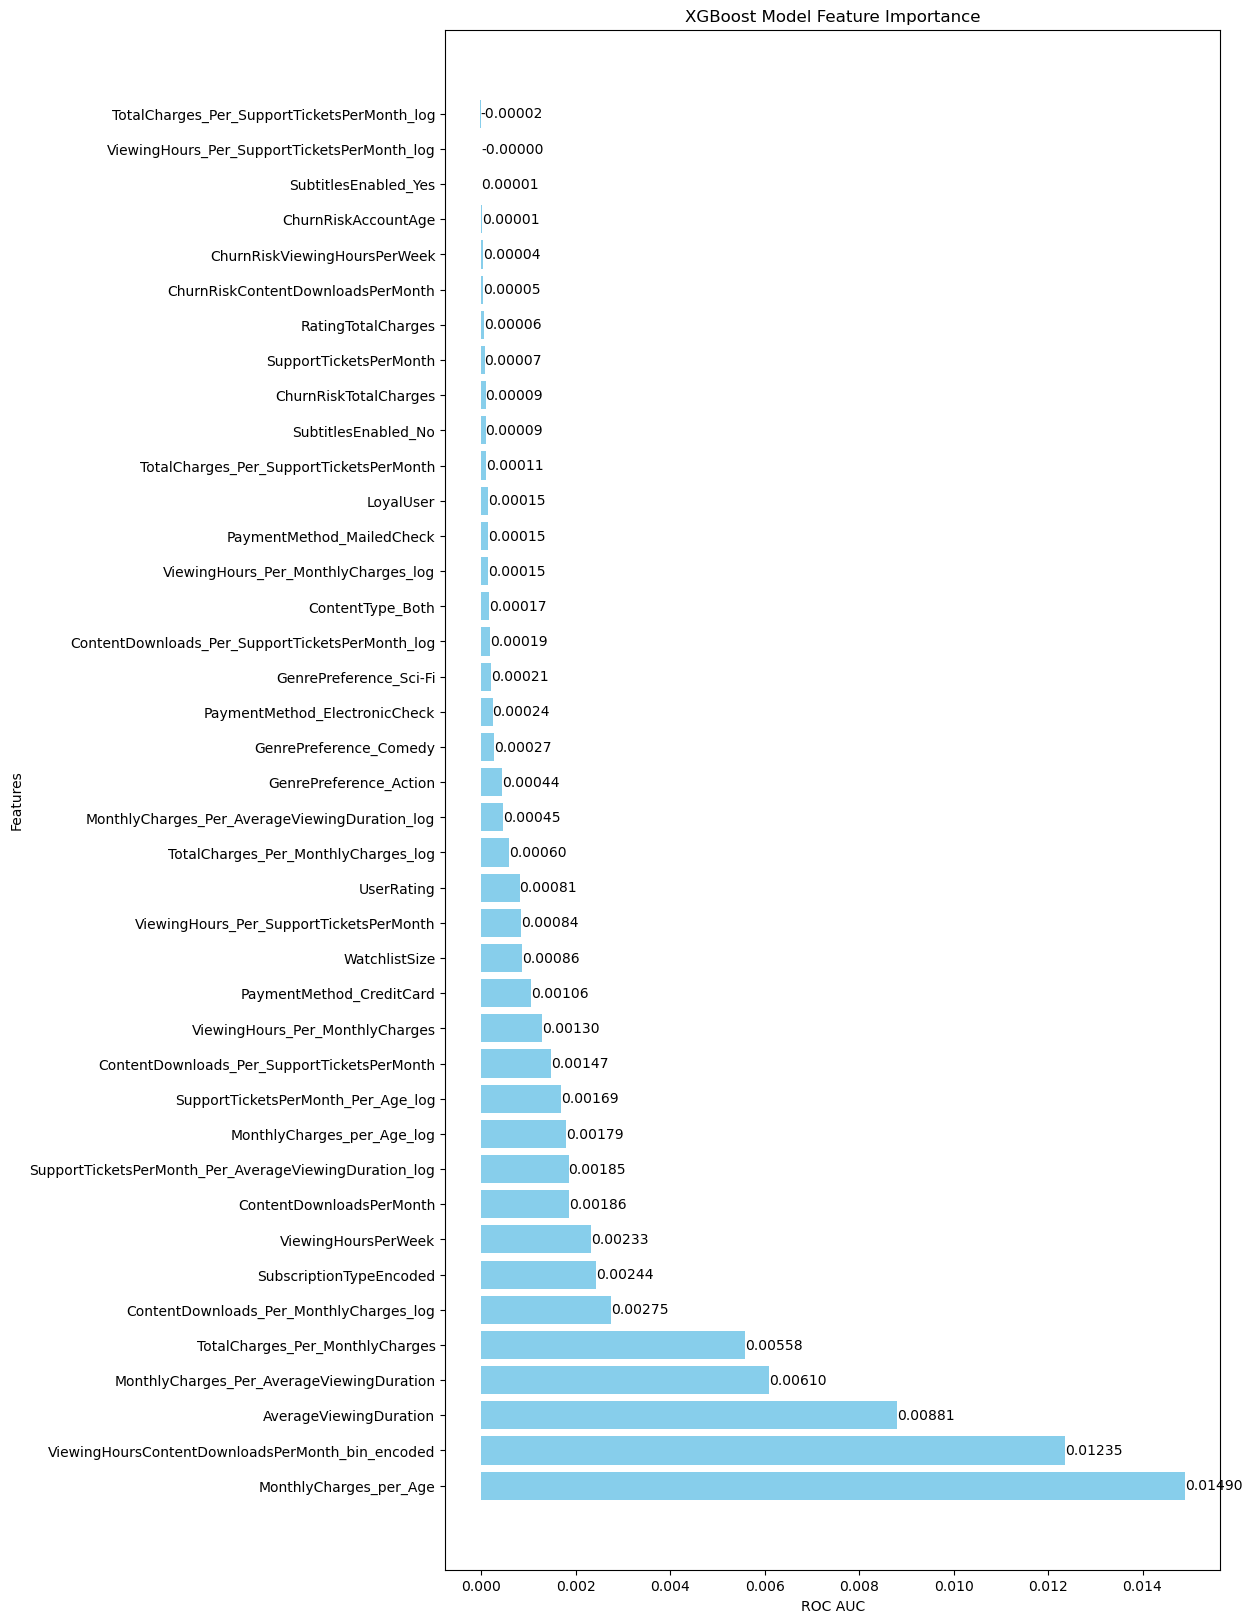

In [1263]:
# Plot the feature importances as a horizontal bar chart
plt.figure(figsize=(10, 20))
for index, value in enumerate(xgb_importances_df['importance_mean']):
    plt.text(value, index, f'{value:.5f}', va='center')  # value is placed at the end of the bar
    
plt.barh(xgb_importances_df['feature'], xgb_importances_df['importance_mean'], color='skyblue')

plt.xlabel('ROC AUC')
plt.ylabel('Features')
plt.title('XGBoost Model Feature Importance')
    
plt.show()

In [1265]:
# Save the result of the XGBoost model in a DataFrame for future comparison
xgb_cv_result = pd.DataFrame({'Model': 'XGB val', 'ROC_AUC Score': roc_auc_score(y_val, y_xgb_pred_proba_val)}, index=[0])


In [1271]:
# Add the result to the results from the other models for comparison
results = pd.concat([dummy_clf_result, xgb_cv_result])
results

Model  ROC_AUC Score
0  DummyClassifier val       0.500101
0              XGB val       0.748355

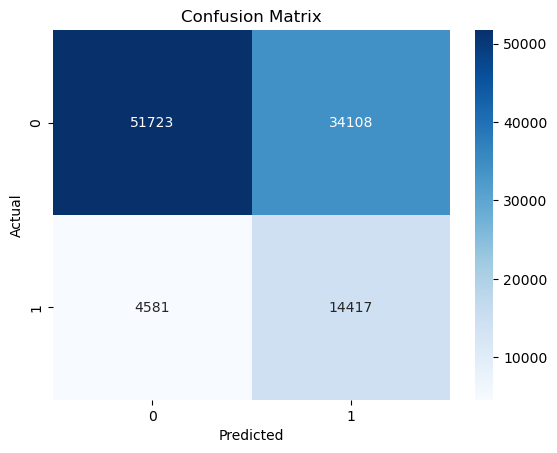

In [1273]:
#Plot Confusion Matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_xgb_pred_val)

# Create a heatmap visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [1275]:
# Use XGBoost model to predict on test data
test_selected = test_df
y_pred = xgb_cv.predict(test_selected.drop(columns=['CustomerID']))  # For classification

y_pred_proba = xgb_cv.predict_proba(test_selected.drop(columns=['CustomerID']))[:, 1]  # For probabilities
#y_pred_proba = xgb_cv.predict_proba(test_selected)[:, 1]  # For probabilities

print(y_pred_proba)

# Combine predictions with label column into a dataframe
xgb_prediction_df = pd.DataFrame({'CustomerID': test_df[['CustomerID']].values[:, 0],
                             'predicted_probability': y_pred_proba})

# Ensure 'prediction_df' contains 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(xgb_prediction_df.shape)
print(xgb_prediction_df.head())

prediction_df = xgb_prediction_df

[0.14550106 0.11418276 0.28353173 ... 0.22587468 0.26038542 0.07550295]
(104480, 2)
   CustomerID  predicted_probability
0  O1W6BHP6RM               0.145501
1  LFR4X92X8H               0.114183
2  QM5GBIYODA               0.283532
3  D9RXTK2K9F               0.148452
4  ENTCCHR1LR               0.230877


In [1277]:
# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
print(prediction_df.head(10))


(104480, 2)
   CustomerID  predicted_probability
0  O1W6BHP6RM               0.145501
1  LFR4X92X8H               0.114183
2  QM5GBIYODA               0.283532
3  D9RXTK2K9F               0.148452
4  ENTCCHR1LR               0.230877
5  7A88BB5IO6               0.427782
6  70OMW9XEWR               0.130230
7  EL1RMFMPYL               0.229922
8  4IA2QPT6ZK               0.200749
9  AEDCWHSJDN               0.203600


## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [1280]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
prediction_df.to_csv("xgb4_prediction_submission.csv", index=False)
submission = pd.read_csv("xgb4_prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [1282]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [1284]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [1286]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [2433]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

**Hist Gradient Boosting**

In [1409]:
# Set sample weights based on class imbalance

# `y_tr` contains the class labels for the training set
sample_weights = compute_sample_weight(class_weight='balanced', y=y_tr)


# Step 1: Train a base model to get permutation importances
base_hgbm = HistGradientBoostingClassifier(random_state=42)

# Create a parameter grid
param_grid = {
    'learning_rate': [0.01],
    'max_features': [0.2],
    'max_leaf_nodes': [15],
    'max_iter': [1200],
    'l2_regularization': [0.5]
}
# Set up StratifiedKFold with 10 splits
stratified_kfold = StratifiedKFold(n_splits=10)

# Initialize GridSearchCV
hgbm_cv = GridSearchCV(base_hgbm, param_grid, cv=stratified_kfold)


In [1413]:
%timeit hgbm_cv.fit(X_tr, y_tr, sample_weight=sample_weights)

2min 13s ± 2.38 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [1415]:
# Access the best model after GridSearchCV
best_model = hgbm_cv.best_estimator_

# You can now access the trained classifier from best_model
print(best_model)

# Step 2: Calculate permutation importance on the validation set
perm_importance = permutation_importance(best_model, X_val, y_val, n_repeats=10, random_state=42)
importances = perm_importance.importances_mean

# Step 3: Set a threshold for selecting important features
threshold = np.percentile(importances, 60)  # Keep features above the 60th percentile

# Step 4: Identify the indices of features that meet the importance threshold
selected_features = np.where(importances >= threshold)[0]


HistGradientBoostingClassifier(l2_regularization=0.5, learning_rate=0.01,
                               max_features=0.2, max_iter=1200,
                               max_leaf_nodes=15, random_state=42)


In [1416]:
print(len(selected_features))


16


In [1467]:
# Select top n features based on importance
top_n = len(selected_features)
feature_indices = importances.argsort()[-top_n:]
X_tr_selected = X_tr.iloc[:, feature_indices]
X_val_selected = X_val.iloc[:, feature_indices]

selected_features = X_tr.columns[feature_indices]
X_test_selected = X_test[selected_features]

print(X_tr_selected.info())
print(X_val_selected.info())
print(X_test_selected.info())


<class 'pandas.core.frame.DataFrame'>
Index: 138958 entries, 13970 to 21414
Data columns (total 16 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   SupportTicketsPerMonth_Per_Age_log                     138958 non-null  float64
 1   MonthlyCharges_per_Age                                 138958 non-null  float64
 2   ViewingHoursPerWeek                                    138958 non-null  float64
 3   ChurnRiskAccountAge                                    138958 non-null  float64
 4   UserRating                                             138958 non-null  float64
 5   SupportTicketsPerMonth                                 138958 non-null  float64
 6   WatchlistSize                                          138958 non-null  float64
 7   MonthlyCharges_per_Age_log                             138958 non-null  float64
 8   ContentDownloadsPerMonth            

In [ ]:
#X_tr_selected = X_tr
#X_val_selected = X_val


In [1461]:
import time
start_time = time.time()
hgbm_cv.fit(X_tr_selected, y_tr, sample_weight=sample_weights)
end_time = time.time()
print(f"Total training time: {end_time - start_time} seconds")

Total training time: 79.72346210479736 seconds


In [1463]:
# Make predictions on the training data
y_pred_proba_tr = hgbm_cv.predict_proba(X_tr_selected)[:, 1]
y_pred_tr = hgbm_cv.predict(X_tr_selected)


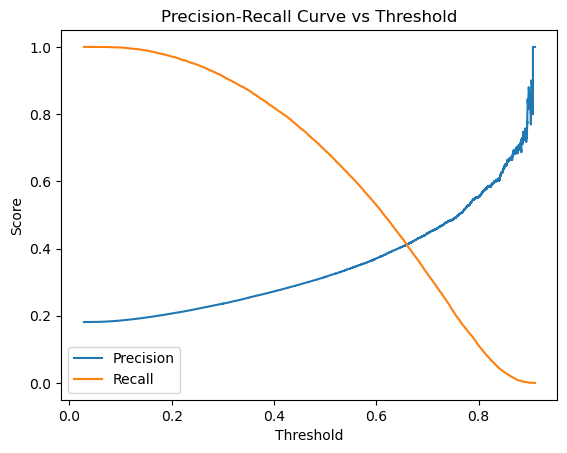

Best threshold: 0.5578953316968612
HistGradient Boosting scores on the training set:
Accuracy Score: 0.6759164639675298
Precision Score: 0.3209453364604005
Recall Score: 0.7064008894536213
F1 Score: 0.44136254248641676
ROC AUC Score: 0.7559109060536627

HistGradient Boosting scores on the validation set:
Accuracy Score: 0.6199334153717005
Precision Score: 0.2912677748848388
Recall Score: 0.7655016317507106
F1 Score: 0.4219765552460539
ROC AUC Score: 0.7444475486130272


In [1464]:
# Predict probabilities on the validation set
y_hgbm_pred_proba_val = hgbm_cv.predict_proba(X_val_selected)[:, 1]  # Predicted probabilities

# Get precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_val, y_hgbm_pred_proba_val)

f1_scores = np.zeros_like(thresholds)
for i in range(len(thresholds)):
    if precisions[i] + recalls[i] > 0:  # Check if precision + recall is greater than 0
        f1_scores[i] = 2 * (precisions[i] * recalls[i]) / (precisions[i] + recalls[i])
    else:
        f1_scores[i] = 0  # Set to 0 if both precision and recall are 0

plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Curve vs Threshold")
plt.legend()
plt.show()

# Find the threshold that gives the highest F1 score
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Best threshold: {best_threshold}")

# Use the previosly calculated best threshold
y_hgbm_pred_val = (y_hgbm_pred_proba_val >= best_threshold*0.8).astype(int)


print('HistGradient Boosting scores on the training set:')
print('Accuracy Score:', accuracy_score(y_tr, y_pred_tr))
print('Precision Score:', precision_score(y_tr, y_pred_tr))
print('Recall Score:', recall_score(y_tr, y_pred_tr))
print('F1 Score:', f1_score(y_tr, y_pred_tr))

print('ROC AUC Score:', roc_auc_score(y_tr, y_pred_proba_tr))
print()

print('HistGradient Boosting scores on the validation set:')
print('Accuracy Score:', accuracy_score(y_val, y_hgbm_pred_val))
print('Precision Score:', precision_score(y_val, y_hgbm_pred_val))
print('Recall Score:', recall_score(y_val, y_hgbm_pred_val))
print('F1 Score:', f1_score(y_val, y_hgbm_pred_val))

print('ROC AUC Score:', roc_auc_score(y_val, y_hgbm_pred_proba_val))


In [1427]:
hgbm_cv.best_params_

{'l2_regularization': 0.5,
 'learning_rate': 0.01,
 'max_features': 0.2,
 'max_iter': 1200,
 'max_leaf_nodes': 15}

In [1429]:
# Store the results in a DataFrame and sort by importance
# HistGradient Boosting Permutation Importances

best_model = hgbm_cv.best_estimator_

# Calculate permutation importance on the validation set
perm_importance = permutation_importance(best_model, X_val_selected, y_val, n_repeats=10, random_state=42)
importances = perm_importance.importances_mean
hgbm_importances_df = pd.DataFrame({'feature': X_val_selected.columns, 'importance_mean': importances}).sort_values(by='importance_mean', ascending=False)

#Display the results in a sorted format
print("\nHistGradient Boosting Permutation Importances (Validation Set):")
print(hgbm_importances_df.head(50))



HistGradient Boosting Permutation Importances (Validation Set):
                                             feature  importance_mean
7                 SupportTicketsPerMonth_Per_Age_log         0.037052
11                            AverageViewingDuration         0.022875
8                ViewingHours_Per_MonthlyCharges_log         0.014691
1                           ContentDownloadsPerMonth         0.002715
13                           SubscriptionTypeEncoded         0.001046
12                          PaymentMethod_CreditCard         0.000777
15                                     WatchlistSize         0.000455
2                                         UserRating         0.000328
10                            GenrePreference_Action         0.000220
5                                   ContentType_Both         0.000193
4                          PaymentMethod_MailedCheck         0.000073
3                             GenrePreference_Sci-Fi        -0.000052
6                  ChurnR

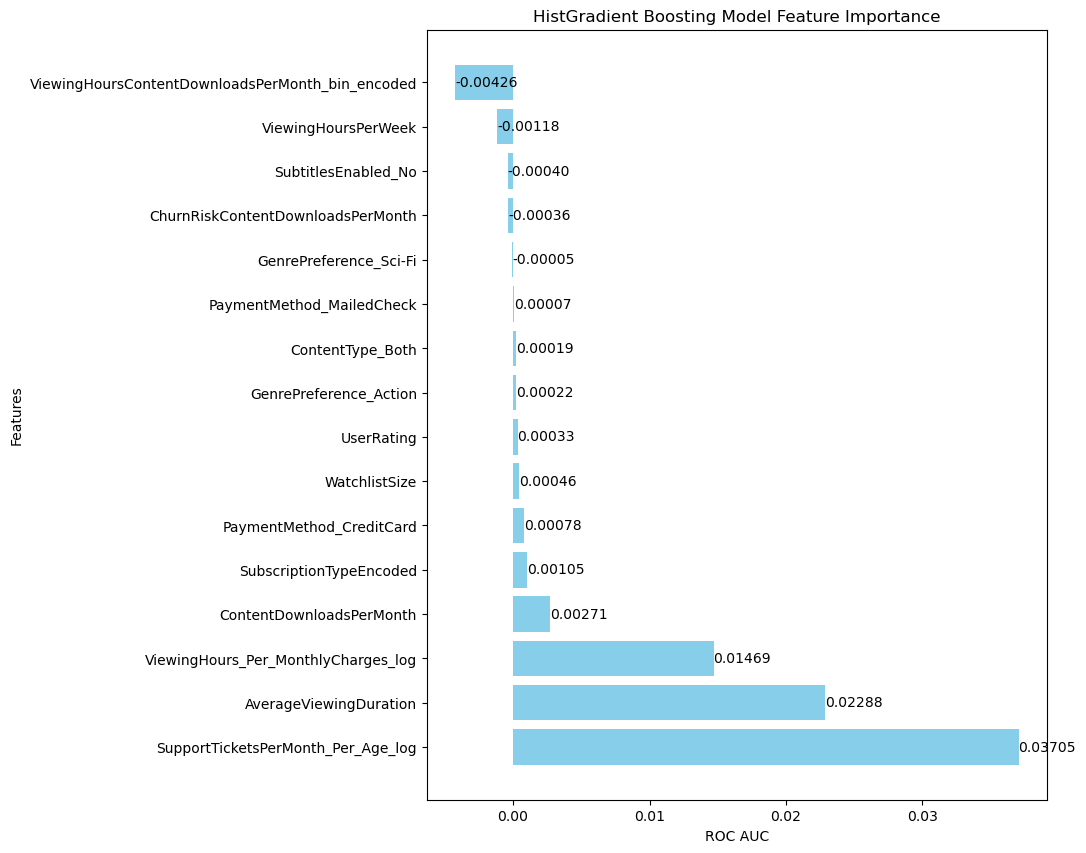

In [1431]:
# Plot the feature importances as a horizontal bar chart
plt.figure(figsize=(8, 10))
for index, value in enumerate(hgbm_importances_df['importance_mean']):
    plt.text(value, index, f'{value:.5f}', va='center')  # value is placed at the end of the bar
    
plt.barh(hgbm_importances_df['feature'], hgbm_importances_df['importance_mean'], color='skyblue')

plt.xlabel('ROC AUC')
plt.ylabel('Features')
plt.title('HistGradient Boosting Model Feature Importance')
    
plt.show()

In [1433]:
# Save the result of the Gradient Boost model in a DataFrame for future comparison
hgbm_cv_result = pd.DataFrame({'Model': 'HGBM val', 'ROC_AUC Score': roc_auc_score(y_val, y_hgbm_pred_proba_val)}, index=[0])


In [1505]:
# Add the result to the results from the previous three models for comparison
results = pd.concat([lgbm_cv_result, xgb_cv_result, catboost_cv_result, hgbm_cv_result])
results

Model  ROC_AUC Score
0  LightGBM val       0.746834
0       XGB val       0.748355
0  CatBoost val       0.747746
0      HGBM val       0.735388

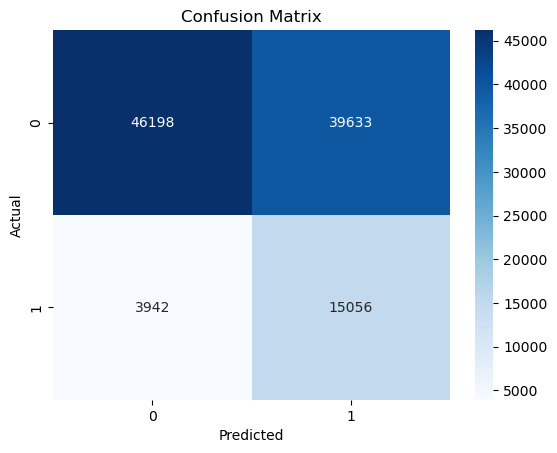

In [1437]:
#Plot Confusion Matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_hgbm_pred_val)

# Create a heatmap visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [1469]:
# Use HistGradient Boosting model to predict on test data
#test_selected = test_df
y_pred = hgbm_cv.predict(X_test_selected)  # For classification

y_pred_proba = hgbm_cv.predict_proba(X_test_selected)[:, 1]  # For probabilities

print(y_pred_proba)

# Combine predictions with label column into a dataframe
hgbm_prediction_df = pd.DataFrame({'CustomerID': test_df[['CustomerID']].values[:, 0],
                             'predicted_probability': y_pred_proba})

# Ensure 'prediction_df' contains 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(hgbm_prediction_df.shape)
print(hgbm_prediction_df.head())

prediction_df = hgbm_prediction_df

[0.34691241 0.15141045 0.76110701 ... 0.29104176 0.64751231 0.08596457]
(104480, 2)
   CustomerID  predicted_probability
0  O1W6BHP6RM               0.346912
1  LFR4X92X8H               0.151410
2  QM5GBIYODA               0.761107
3  D9RXTK2K9F               0.195260
4  ENTCCHR1LR               0.505244


In [1471]:
# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
print(prediction_df.head(10))


(104480, 2)
   CustomerID  predicted_probability
0  O1W6BHP6RM               0.346912
1  LFR4X92X8H               0.151410
2  QM5GBIYODA               0.761107
3  D9RXTK2K9F               0.195260
4  ENTCCHR1LR               0.505244
5  7A88BB5IO6               0.691482
6  70OMW9XEWR               0.321604
7  EL1RMFMPYL               0.605763
8  4IA2QPT6ZK               0.514196
9  AEDCWHSJDN               0.493953


**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [1473]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
prediction_df.to_csv("hgbm23_prediction_submission.csv", index=False)
submission = pd.read_csv("hgbm23_prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [1475]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [1477]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [1479]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

**Soft Voting Ensemble of LightGBM, XGBoost, CatBoost and HistGradient Boosting Models**

In [1481]:
from sklearn.ensemble import VotingClassifier

# Create the ensemble with VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[('lgbm', lgbm_cv), ('xgb', xgb_cv), ('catboost', catboost_cv), ('hgbm', hgbm_cv)],
    voting='soft'  # 'soft' voting averages predicted probabilities
)

In [ ]:
%timeit ensemble_model.fit(X_tr, y_tr)


In [1487]:
# Make predictions on the training data
y_pred_proba_tr = ensemble_model.predict_proba(X_tr)[:, 1]
y_pred_tr = ensemble_model.predict(X_tr)


In [1499]:
# Predict probabilities for validation set and calculate scores
y_val_pred_proba = ensemble_model.predict_proba(X_val)[:, 1]

# Determine the best threshold using precision-recall trade-off
precision, recall, thresholds = precision_recall_curve(y_val, y_val_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[f1_scores.argmax()]

# Use the best threshold to make predictions
y_val_pred = (y_val_pred_proba >= best_threshold*0.8).astype(int)

print('Soft Voting Ensemble scores on the training set:')
print('Accuracy Score:', accuracy_score(y_tr, y_pred_tr))
print('Precision Score:', precision_score(y_tr, y_pred_tr))
print('Recall Score:', recall_score(y_tr, y_pred_tr))
print('F1 Score:', f1_score(y_tr, y_pred_tr))

print('ROC AUC Score:', roc_auc_score(y_tr, y_pred_proba_tr))
print()

print('Soft Voting Ensemble scores on the validation set:')
print('Accuracy Score:', accuracy_score(y_val, y_val_pred))
print('Precision Score:', precision_score(y_val, y_val_pred))
print('Recall Score:', recall_score(y_val, y_val_pred))
print('F1 Score:', f1_score(y_val, y_val_pred))
print('ROC AUC Score:', roc_auc_score(y_val, y_val_pred_proba))

Soft Voting Ensemble scores on the training set:
Accuracy Score: 0.7472185840325853
Precision Score: 0.3723879447553525
Recall Score: 0.5760006353240152
F1 Score: 0.45233714802457203
ROC AUC Score: 0.761149489321761

Soft Voting Ensemble scores on the validation set:
Accuracy Score: 0.6446593976857549
Precision Score: 0.30347990869546493
Recall Score: 0.741814927887146
F1 Score: 0.43074148786600647
ROC AUC Score: 0.7480831569570862


In [1501]:
# Save the result of the Soft Voting Ensemble model in a DataFrame for future comparison
svensemble_cv_result = pd.DataFrame({'Model': 'SVEnsemble val', 'ROC_AUC Score': roc_auc_score(y_val, y_val_pred_proba)}, index=[0])

In [1507]:
# Add the result to the results from the previous four models for comparison
results = pd.concat([lgbm_cv_result, xgb_cv_result, catboost_cv_result, hgbm_cv_result, svensemble_cv_result])
results

Model  ROC_AUC Score
0    LightGBM val       0.746834
0         XGB val       0.748355
0    CatBoost val       0.747746
0        HGBM val       0.735388
0  SVEnsemble val       0.748083

**Stacking Ensemble of LightGBM, XGBoost, CatBoost and Gradient Boosting Models**

In [1511]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define the base models
base_models = [
    ('lgbm', lgbm_cv),
    ('xgb', xgb_cv),
    ('catboost', catboost_cv),
    ('hgbm', hgbm_cv)
]

# Define the meta-model
meta_model = LogisticRegression()

# Create the stacking ensemble
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    stack_method='predict_proba'
)


In [ ]:
import time
start_time = time.time()
stacking_model.fit(X_tr, y_tr)
end_time = time.time()
print(f"Total training time: {end_time - start_time} seconds")


In [1515]:
# Make predictions on the training data
y_pred_proba_tr = stacking_model.predict_proba(X_tr)[:, 1]
y_pred_tr = stacking_model.predict(X_tr)


In [1517]:
# Stacked model probabilities
y_val_pred_proba_stack = stacking_model.predict_proba(X_val)[:, 1]

best_threshold = 0.0
best_f1 = 0.0

# Loop through possible thresholds to find the one that maximizes F1 score
for threshold in np.arange(0.0, 1.0, 0.01):
    y_val_pred_stack = (y_val_pred_proba_stack >= threshold*0.8).astype(int)
    f1 = f1_score(y_val, y_val_pred_stack)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Best threshold: {best_threshold}")
print(f"Best F1 score with optimal threshold: {best_f1}")

y_val_pred_stack = (y_val_pred_proba_stack >= best_threshold*0.8).astype(int)

print('Stacking Ensemble scores on the training set:')
print('Accuracy Score:', accuracy_score(y_tr, y_pred_tr))
print('Precision Score:', precision_score(y_tr, y_pred_tr))
print('Recall Score:', recall_score(y_tr, y_pred_tr))
print('F1 Score:', f1_score(y_tr, y_pred_tr))

print('ROC AUC Score:', roc_auc_score(y_tr, y_pred_proba_tr))
print()

print('Stacking Ensemble scores on the validation set:')
print('Accuracy Score:', accuracy_score(y_val, y_val_pred_stack))
print('Precision Score:', precision_score(y_val, y_val_pred_stack))
print('Recall Score:', recall_score(y_val, y_val_pred_stack))
print('F1 Score:', f1_score(y_val, y_val_pred_stack))
print('ROC AUC Score:', roc_auc_score(y_val, y_val_pred_proba_stack))


Best threshold: 0.28
Best F1 score with optimal threshold: 0.44144038243015554
Stacking Ensemble scores on the training set:
Accuracy Score: 0.8254796413304739
Precision Score: 0.5996156310057655
Recall Score: 0.11149936467598476
F1 Score: 0.1880336156962534
ROC AUC Score: 0.7611470947950739

Stacking Ensemble scores on the validation set:
Accuracy Score: 0.7280332732354596
Precision Score: 0.3515790787666958
Recall Score: 0.5930097905042636
F1 Score: 0.44144038243015554
ROC AUC Score: 0.7481020896639086


In [1519]:
# Save the result of the Stacking Ensemble model in a DataFrame for future comparison
stensemble_cv_result = pd.DataFrame({'Model': 'STEnsemble val', 'ROC_AUC Score': roc_auc_score(y_val, y_val_pred_proba_stack)}, index=[0])

In [1521]:
# Add the result to the results from the previous four models for comparison
results = pd.concat([lgbm_cv_result, xgb_cv_result, catboost_cv_result, hgbm_cv_result, svensemble_cv_result, stensemble_cv_result])
results.to_csv("models_results.csv", index=False)
results

Model  ROC_AUC Score
0    LightGBM val       0.746834
0         XGB val       0.748355
0    CatBoost val       0.747746
0        HGBM val       0.735388
0  SVEnsemble val       0.748083
0  STEnsemble val       0.748102

The champion model on the validation set is XGBoost.

In [1567]:
# Use Stacking Ensemble model to predict on test data
y_pred = stacking_model.predict(test_df.drop(columns=['CustomerID']))  # For classification

y_pred_proba = stacking_model.predict_proba(test_df.drop(columns=['CustomerID']))[:, 1]  # For probabilities

print(y_pred_proba)

# Combine predictions with label column into a dataframe
stacking_model_prediction_df = pd.DataFrame({'CustomerID': test_df[['CustomerID']].values[:, 0],
                             'predicted_probability': y_pred_proba})

# Ensure 'prediction_df' contains 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(stacking_model_prediction_df.shape)
print(stacking_model_prediction_df.head())

prediction_df = stacking_model_prediction_df

[0.04531523 0.04432421 0.09207423 ... 0.06707015 0.08143547 0.0397718 ]
(104480, 2)
   CustomerID  predicted_probability
0  O1W6BHP6RM               0.045315
1  LFR4X92X8H               0.044324
2  QM5GBIYODA               0.092074
3  D9RXTK2K9F               0.050010
4  ENTCCHR1LR               0.075066


In [1569]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
prediction_df.to_csv("stacking_model1_prediction_submission.csv", index=False)
submission = pd.read_csv("stacking_model1_prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [1571]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [1573]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [1575]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [1551]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!